In [ ]:
# Data preparation for Ph.D thesis
# copy from INDICATORS_DATASET_RAW_DATA_FOR_TS-GENERATOR-PARSING.ipynb
# @author: Andres L. Suarez-Cetrulo
%config IPCompleter.greedy=True
%load_ext jupyternotify
%matplotlib inline

In [ ]:
# Imports
import pandas as pd
import numpy as np
import datetime
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Using TALib abstract API to create a dictionary of technical indicators to iterate later.
from talib import abstract

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
def get_fullpath(filename: str):
    return os.sep.join(['C:','Users','suare','data', 'raw', 'quantquote', 'minutes', filename])

file = 'spy_historical.csv'
# filepath = os.sep.join(['C:','Users','suare','data', 'raw', 'quantquote', 'minutes', file])
filepath = get_fullpath(file)

In [5]:
df = pd.read_csv(filepath)
df.drop(columns=['splits', 'earnings', 'dividends'], errors='ignore', inplace=True)
df.head()

date  time     open     high      low    close    volume
0  19980102   931  64.9236  64.9236  64.9236  64.9236  97424.60
1  19980102   932  65.0103  65.0103  64.9236  64.9436  31325.70
2  19980102   933  65.0503  65.0503  64.9436  65.0303  32075.20
3  19980102   934  64.9703  64.9703  64.9703  64.9703   1498.84
4  19980102   935  65.0170  65.0303  64.9703  64.9703  17536.40

# 1. Let's split the set in Mahab, Dev and Train sets.

In [6]:
# Declaring list of files to be parsed afterwards
files = list()

In [ ]:
mahab_years = ['2008', '2009']  # add years as str
mahab_yr_name = pd.Series(mahab_years).apply(lambda x: x[-2:])
mahab_subset_df = df[df.date.astype(str).str[:4].isin(mahab_years)]

mahab_months = dict() # one pos per state
mahab_months['state_1'] = ['200810','200811','200812'] # bear trend Q4 2008
mahab_months['state_2'] = ['200904','200905','200906'] # bull trend Q2 2009 
mahab_months['state_3'] = ['200910','200911','200912'] # lateral trend Q4 2009

mahab_state_dfs = dict() # one df per state
for state, months in mahab_months.items():
    mahab_state_dfs[state] = \
        mahab_subset_df[mahab_subset_df.date.astype(str).str[:6].isin(mahab_months[state])]
    filename = f'spy_mahab_{"-".join(mahab_yr_name)}_{state}.csv'
    mahab_state_dfs[state].to_csv(get_fullpath(filename), index=False)
    files.append(filename)

In [8]:
devset_years = ['2010']  # add years as str
devset_subset_df = df[df.date.astype(str).str[:4].isin(devset_years)]
filename = f'spy_devset_{"-".join(devset_years)}.csv'
devset_subset_df.to_csv(get_fullpath(filename), index=False)
files.append(filename)

In [9]:
from_yr = 2011  # as int
to_yr = 2020    # as int
trainset_years = list(pd.Series(range(from_yr, to_yr + 1, 1)).astype(str))  # add years as str
trainset_subset_df = df[df.date.astype(str).str[:4].isin(trainset_years)]
filename = f'spy_trainset_{from_yr}-{to_yr}.csv'
trainset_subset_df.to_csv(get_fullpath(filename), index=False)
files.append(filename)

In [7]:
dataset = 'spy10yr' # spy2yr  spy19yr

if dataset == 'spy10yr':  # FOR MINUTE LEVEL
    # MAHALANOBIS SETS
    mahab_years = ['2008', '2009']  # add years as str
    mahab_yr_name = pd.Series(mahab_years).apply(lambda x: x[-2:])
    mahab_subset_df = df[df.date.astype(str).str[:4].isin(mahab_years)]

    mahab_months = dict() # one pos per state
    mahab_months['state_1'] = ['200810','200811','200812'] # bear trend Q4 2008
    mahab_months['state_2'] = ['200904','200905','200906'] # bull trend Q2 2009 
    mahab_months['state_3'] = ['200910','200911','200912'] # lateral trend Q4 2009

    mahab_state_dfs = dict() # one df per state
    for state, months in mahab_months.items():
        mahab_state_dfs[state] = \
            mahab_subset_df[mahab_subset_df.date.astype(str).str[:6].isin(mahab_months[state])]
        filename = f'spy_mahab_{"-".join(mahab_yr_name)}_{state}.csv'
        mahab_state_dfs[state].to_csv(get_fullpath(filename), index=False)
        files.append(filename)
    
    # DEVSET
    devset_years = ['2010']  # add years as str
    devset_subset_df = df[df.date.astype(str).str[:4].isin(devset_years)]
    filename = f'spy_devset_{"-".join(devset_years)}.csv'
    devset_subset_df.to_csv(get_fullpath(filename), index=False)
    files.append(filename)
    
    # TRAINSET
    from_yr = 2011  # as int
    to_yr = 2020    # as int
    trainset_years = list(pd.Series(range(from_yr, to_yr + 1, 1)).astype(str))  # add years as str
    trainset_subset_df = df[df.date.astype(str).str[:4].isin(trainset_years)]
    filename = f'spy_trainset_{from_yr}-{to_yr}.csv'
    trainset_subset_df.to_csv(get_fullpath(filename), index=False)
    files.append(filename)
    
elif dataset == 'spy19yr': # for daily level (NA should not be for this)
    
    # MAHALANOBIS SETS
    mahab_years = ['1998', '1999', '2000', '2001']  # add years as str
    mahab_yr_name = pd.Series(mahab_years).apply(lambda x: x[-2:])
    mahab_subset_df = df[df.date.astype(str).str[:4].isin(mahab_years)]

    mahab_months = dict() # one pos per state
    mahab_months['state_1'] = ['200010','200011','200012', 
                               '200101','200102','200103', 
                               '200104','200105','200106'] # bear trend
    mahab_months['state_2'] = ['199810','199811','199812', 
                               '199901','199902','199903', 
                               '199904','199905','199906']   # bull trend
    mahab_months['state_3'] = ['200001','200002','200003', 
                               '200004','200005','200006', 
                               '200007','200008','200009']  # lateral trend
    
    mahab_state_dfs = dict() # one df per state
    for state, months in mahab_months.items():
        mahab_state_dfs[state] = \
            mahab_subset_df[mahab_subset_df.date.astype(str).str[:6].isin(mahab_months[state])]
        filename = f'spy_mahab_{"-".join(mahab_yr_name)}_{state}.csv'
        mahab_state_dfs[state].to_csv(get_fullpath(filename), index=False)
        files.append(filename)
    
    # NO DEVSET. IT'S RIDICULUOUS TO TRY TO OPTIMISE NA FOR THE AMOUNT OF ROWS AT DAILY LEVEL.
    
    # TRAINSET
    from_yr = 2002  # as int
    to_yr = 2020    # as int
    trainset_years = list(pd.Series(range(from_yr, to_yr + 1, 1)).astype(str))  # add years as str
    trainset_subset_df = df[df.date.astype(str).str[:4].isin(trainset_years)]
    filename = f'spy_trainset_{from_yr}-{to_yr}.csv'
    trainset_subset_df.to_csv(get_fullpath(filename), index=False)
    files.append(filename)
    

elif dataset == 'spy2yr':  # for below 1m level (second level)
    print('TODO: end parsing dates')
#     # MAHALANOBIS SETS
#     mahab_years = ['2018']  # add years as str
#     mahab_yr_name = pd.Series(mahab_years).apply(lambda x: x[-2:])
#     mahab_subset_df = df[df.date.astype(str).str[:4].isin(mahab_years)]

#     mahab_months = dict() # one pos per state
#     mahab_months['state_1'] = 22Jan-5Feb 2018   # bear trend
#     mahab_months['state_2'] = 1st-22 Jan 2018   # bull trend
#     mahab_months['state_3'] = 15-Feb-5 Mar 2018  # lateral trend
    
#     # TODO parse these properly
#     # df = df[(df.datetime.astype('str') > '1998-12-31 16:00:00') & (df.datetime.astype('str') <= '1999-12-31 16:00:00')]

#     mahab_state_dfs = dict() # one df per state
#     for state, months in mahab_months.items():
#         mahab_state_dfs[state] = \
#             mahab_subset_df[mahab_subset_df.date.astype(str).str[:6].isin(mahab_months[state])]
#         filename = f'spy_mahab_{"-".join(mahab_yr_name)}_{state}.csv'
#         mahab_state_dfs[state].to_csv(get_fullpath(filename), index=False)
#         files.append(filename)
    
#     # DEVSET
#     devset_months = ['201804','201805','201806', 
#                      '201807','201808','201809', 
#                      '201810','201811','201812']  # add years as str
#     devset_subset_df = df[df.date.astype(str).str[:6].isin(devset_months)]
#     filename = f'spy_devset_{"-".join(pd.Series(devset_months).apply(lambda x: x[-2:]))}.csv'
#     devset_subset_df.to_csv(get_fullpath(filename), index=False)
#     files.append(filename)
    
#     # TRAINSET
#     from_yr = 2019  # as int
#     to_yr = 2020    # as int
#     trainset_years = list(pd.Series(range(from_yr, to_yr + 1, 1)).astype(str))  # add years as str
#     trainset_subset_df = df[df.date.astype(str).str[:4].isin(trainset_years)]
#     filename = f'spy_trainset_{from_yr}-{to_yr}.csv'
#     trainset_subset_df.to_csv(get_fullpath(filename), index=False)
#     files.append(filename)


In [10]:
trainset_subset_df.head()

date  time     open     high      low    close     volume
1245406  20110103   930  105.114  105.138  105.072  105.122  3538420.0
1245407  20110103   931  105.122  105.180  105.097  105.180  1039570.0
1245408  20110103   932  105.180  105.197  105.130  105.147   727576.0
1245409  20110103   933  105.147  105.188  105.130  105.138   554285.0
1245410  20110103   934  105.138  105.155  105.130  105.155   751152.0

In [11]:
files

['spy_mahab_08-09_state_1.csv',
 'spy_mahab_08-09_state_2.csv',
 'spy_mahab_08-09_state_3.csv',
 'spy_devset_2010.csv',
 'spy_trainset_2011-2020.csv']

# 2. Now let's use these datasets and deal with gaps so they're ready for the technical indicators.

In [12]:
sources = ['S&P500']
levels = ['1min-level', '5min-level', '10min-level', '15min-level', '30min-level', '1h-level']

files_for_indicators = list()
for source in sources:
    print(source)
    for file in files: # ['spy_historical']: # files considers devsets and all mahalnobis state specific sets.
        print(f'\n= Processing file {file} =\n')
        for level in levels:
            path = os.sep.join(['C:','Users','suare','data', 'raw', 'quantquote', 'minutes', file])  # new - moving data across
#             df = pd.read_csv(path+'.csv', sep=',')  # csv does not need to be in there
            print(f'{level}')
            path = path.replace('.csv', '')
            df = pd.read_csv(path+'.csv', sep=',')
    #         df.rename(columns={'Date':'datetime'}, inplace=True)
    #         assert False
            grouped_df = df.groupby(df.date).max()
    #         early_close_dates = grouped_df[grouped_df['time'] < 1530].reset_index().date # to filter them out
    #         df = df[~df['date'].isin(early_close_dates)]  # this has minimum impact anyway...
            df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
            df['time'] = (pd.to_datetime(df['time'].astype(str).str.strip(), format='%H%M').dt.strftime('%H:%M'))
            df['datetime'] = df.date.astype(str) + ' ' + df.time.astype(str)
    #         assert False
            trading_dates = df.datetime.str[:10].unique() #  list of market days
            df.index = pd.to_datetime(df.datetime)
            df.drop(columns=['date', 'time', 'datetime', 'splits', 'earnings', 'dividends'], 
                    errors='ignore', inplace=True)    
            df.sort_index(inplace=True, ascending=True)
            print(f' - Original size: {len(df)}')
            ohlc_dict = {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'}
            df = df.resample(level.split('-')[0]).agg(ohlc_dict)
            print(f' - Size after resampling at {level}: {len(df)}')
            df = df.between_time('09:31','15:59')
            print(f' - Size after filtering out non-market hours: {len(df)}')
            df = df[df.index.astype(str).str[:10].isin(trading_dates)]
            # TODO? (low impact..) df = df.between_time('09:31','13:00') for half days (shortened sessions / early closing)
            print(f' - Size after filtering out non-trading days: {len(df)}')
            # Fill gaps
            df['volume'] = df['volume'].fillna(0)
            df['close'] = df['close'].ffill()
            df['open'] = df['open'].fillna(df['close'])
            df['low'] = df['low'].fillna(df['close'])
            df['high'] = df['high'].fillna(df['close'])
            path = os.sep.join(['C:','Users','suare','PycharmProjects','RegimeSwitchingSeriesGenerator','data','efts',level,source])
            Path(path).mkdir(parents=True, exist_ok=True) # create dir if it does not exist
            full_path = path + os.sep + '_'.join([file.replace('.csv', ''), 'filling_gaps', 'market_hours', level, '21.csv'])
            df.to_csv(full_path, sep=';')
    #         os.remove(full_path)
            print(f' - Output path: {full_path} \n========================')
            files_for_indicators.append(full_path)
# files

S&P500

= Processing file spy_mahab_08-09_state_1.csv =

1min-level
 - Original size: 24788
 - Size after resampling at 1min-level: 131430
 - Size after filtering out non-market hours: 35788
 - Size after filtering out non-trading days: 24896
 - Output path: C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\data\efts\1min-level\S&P500\spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21.csv 
5min-level
 - Original size: 24788
 - Size after resampling at 5min-level: 26286
 - Size after filtering out non-market hours: 7084
 - Size after filtering out non-trading days: 4928
 - Output path: C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\data\efts\5min-level\S&P500\spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21.csv 
10min-level
 - Original size: 24788
 - Size after resampling at 10min-level: 13143
 - Size after filtering out non-market hours: 3496
 - Size after filtering out non-trading days: 2432
 - Output path: C:\Users\suare\PycharmP

 - Original size: 98260
 - Size after resampling at 15min-level: 34682
 - Size after filtering out non-market hours: 9050
 - Size after filtering out non-trading days: 6300
 - Output path: C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\data\efts\15min-level\S&P500\spy_devset_2010_filling_gaps_market_hours_15min-level_21.csv 
30min-level
 - Original size: 98260
 - Size after resampling at 30min-level: 17341
 - Size after filtering out non-market hours: 4344
 - Size after filtering out non-trading days: 3024
 - Output path: C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\data\efts\30min-level\S&P500\spy_devset_2010_filling_gaps_market_hours_30min-level_21.csv 
1h-level
 - Original size: 98260
 - Size after resampling at 1h-level: 8671
 - Size after filtering out non-market hours: 2172
 - Size after filtering out non-trading days: 1512
 - Output path: C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\data\efts\1h-level\S&P500\spy_devset_2010_fillin

In [ ]:
files_for_indicators

In [13]:
import subprocess
# Define this to parse the CSVs to ARFF later automatically
def create_arff_file(filename, output=None):
    java_mem = '-Xmx3074m'
    filename = filename.replace('.csv', '')
    if output is None:
        output=filename
    else:
        output = output.replace('.csv', '')
    wekadev_libpath = 'C:\\Users\\suare\\Workspace\\phd_cetrulin\\moa-2017.06-sources\\lib\\weka-dev-3.7.12.jar'
    command = ['java', java_mem, '-classpath', wekadev_libpath,
               'weka.core.converters.CSVLoader', filename + '.csv', '>', output + '.arff']
    f = open(filename + '.arff', "w")
    subprocess.call(command, stdout=f)
    print('If the arff is not generated, run the next in the terminal.')
    print(str(' '.join(command)))

#### Now let's define indicators, paths, and start the transformation process


In [14]:
# Creating a dictionary of technical indicators using TALib abstract API
indicators = ['sma','ema','wma','mom','stoch','macd' ,'rsi' ,'willr',
              'adosc' ,'cci','adx','aroon' ,'bbands','obv' ,'trima',
              'roc' ,'rocr','stochf','medprice','typprice','wclprice',
              'atr','macdfix','mfi' ,'sar' ,'ppo']

def get_indicator(ind: str):
    return abstract.Function(ind)

# Add as many indicators as necessary: see all indicators in https://mrjbq7.github.io/ta-lib/

In [ ]:
pd.Series(files).apply(lambda x: x.replace('.csv', ''))

In [ ]:
files_for_indicators

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2008-10-01 09:31:00  90.8588  90.8746  90.7011  90.7090  1377100.0
1  2008-10-01 09:32:00  90.7090  90.7879  90.6932  90.7405  1230160.0
2  2008-10-01 09:33:00  90.7326  90.7642  90.7090  90.7405   990501.0
3  2008-10-01 09:34:00  90.7405  90.7642  90.5907  90.5985  1202520.0
4  2008-10-01 09:35:00  90.5985  90.6459  90.5670  90.5828  1309760.0
             datetime     open     high      low    close     volume  \
0 2008-10-01 10:05:00  90.2278  90.3225  90.1174  90.1884  1676150.0   
1 2008-10-01 10:06:00  90.1884  90.2199  90.0070  90.0937  1886200.0   
2 2008-10-01 10:07:00  90.1016  90.2121  90.0780  90.1963  1176430.0   
3 2008-10-01 10:08:00  90.1963  90.2909  90.1884  90.2042   720000.0   
4 2008-10-01 10:09:00  90.2042  90.2121  90.1016  90.1332   851841.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

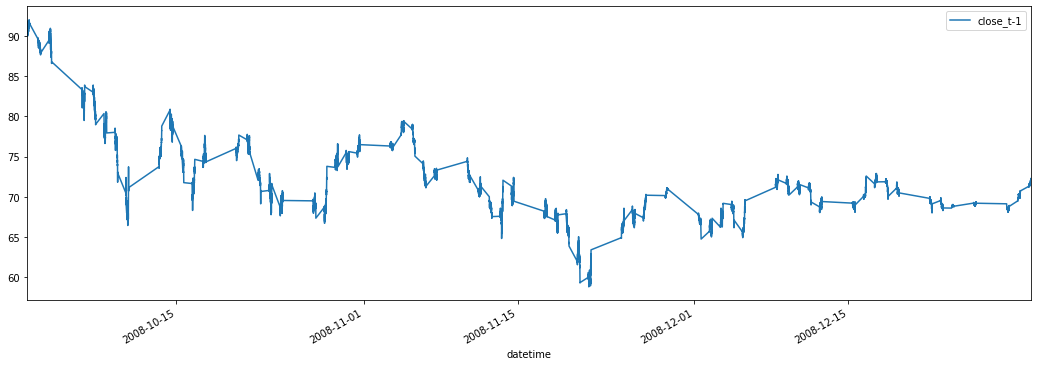

Number of instances: 22656
Class distribution: 
0 in 0.5310734463276836%
1 in 0.4689265536723164%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2008-10-01 09:35:00  90.5985  90.6459  90.3225  90.3461  6066000.0
1  2008-10-01 09:40:00  90.3461  90.8825  90.3382  90.8431  6758813.0
2  2008-10-01 09:45:00  90.8352  91.0403  90.8036  90.8746  8608398.0
3  2008-10-01 09:50:00  90.8746  90.8746  90.6459  90.7247  3484576.0
4  2008-10-01 09:55:00  90.7169  90.9772  90.6774  90.9219  3086975.0
             datetime     open     high      low    close     volume  \
0 2008-10-01 12:20:00  91.0008  91.1270  90.8746  91.1034  3380195.0   
1 2008-10-01 12:25:00  91.1034  91.1665  90.9535  91.0797  3272679.0   
2 2008-10-01 12:30:00  91.0797  91.5687  91.0324  91.5214  8320666.0   
3 2008-10-01 12:35:00  91.5214  91.6713  91.4583  91.4899  4683005.0   
4 2008-10-01 12:40:00  91.4899  91.6871  91.4268  91.4346  5525828.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

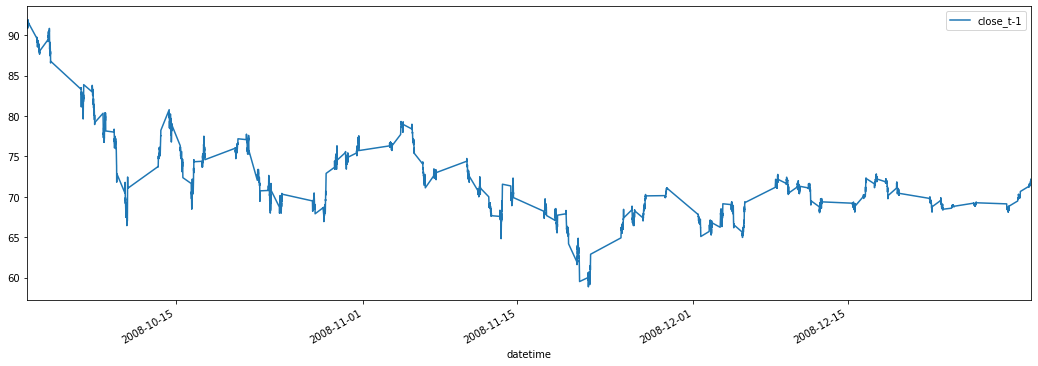

Number of instances: 4516
Class distribution: 
0 in 0.5221434898139947%
1 in 0.47785651018600533%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 09:40:00  90.3461  91.0403  90.3382  90.8746  15367211.0
1  2008-10-01 09:50:00  90.8746  90.9772  90.6459  90.9219   6571551.0
2  2008-10-01 10:00:00  90.9141  90.9298  90.0070  90.1332  15399333.0
3  2008-10-01 10:10:00  90.1332  90.4487  89.9675  90.4329  10157998.0
4  2008-10-01 10:20:00  90.4329  90.5433  90.3225  90.4723   8124848.0
             datetime     open     high      low    close      volume  \
0 2008-10-01 15:10:00  91.5372  91.7975  91.1744  91.3637   7904104.0   
1 2008-10-01 15:20:00  91.3637  91.5530  91.2611  91.4110   4608017.0   
2 2008-10-01 15:30:00  91.4189  91.6555  91.2848  91.3715   6783699.0   
3 2008-10-01 15:40:00  91.3715  91.6318  91.2927  91.3558   7525016.0   
4 2008-10-01 15:50:00  91.3558  91.6713  91.3163  91.4899  12618125.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

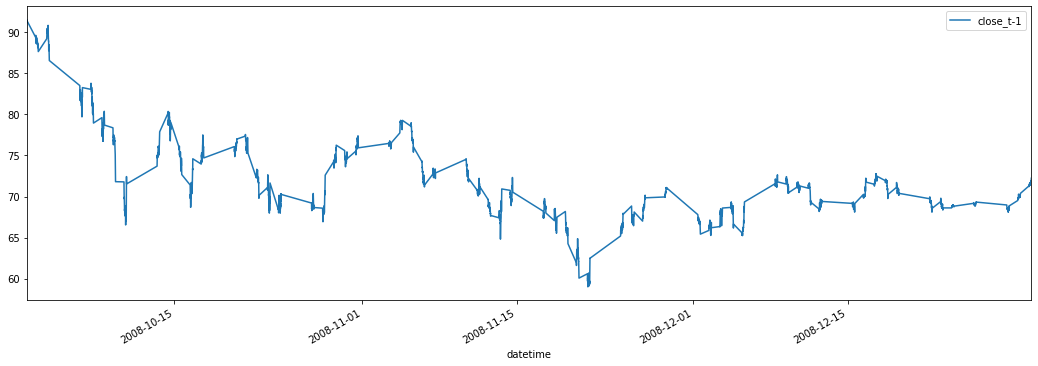

Number of instances: 2209
Class distribution: 
0 in 0.5196921684019918%
1 in 0.48030783159800816%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 09:45:00  90.8352  91.0403  90.6459  90.9219  15179949.0
1  2008-10-01 10:00:00  90.9141  90.9298  89.9675  90.2988  20928953.0
2  2008-10-01 10:15:00  90.3067  90.5433  90.0701  90.4723  12753226.0
3  2008-10-01 10:30:00  90.4802  90.5039  90.0701  90.1568  10846906.0
4  2008-10-01 10:45:00  90.1568  90.2830  89.9281  90.1963   9947990.0
             datetime     open     high      low    close     volume  \
0 2008-10-02 11:45:00  89.1630  89.3286  89.0289  89.2734  8448076.0   
1 2008-10-02 12:00:00  89.2655  89.5022  89.0999  89.1945  8992629.0   
2 2008-10-02 12:15:00  89.2024  89.4154  88.9342  88.9894  7203747.0   
3 2008-10-02 12:30:00  88.9894  89.0841  88.8554  88.8790  7591208.0   
4 2008-10-02 12:45:00  88.8869  89.1788  88.8080  89.0447  7307782.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    p

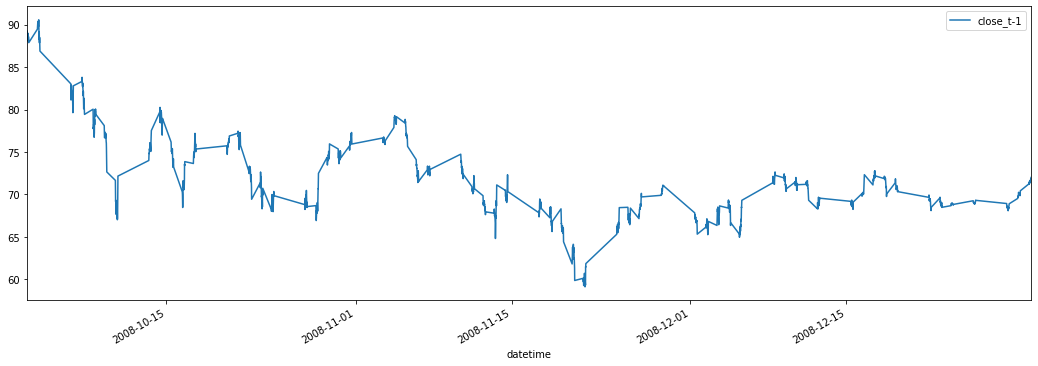

Number of instances: 1442
Class distribution: 
0 in 0.5180305131761442%
1 in 0.48196948682385576%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 10:00:00  90.9141  90.9298  89.9675  90.4723  33682179.0
1  2008-10-01 10:30:00  90.4802  90.5039  89.9281  90.1963  20794896.0
2  2008-10-01 11:00:00  90.1884  90.6222  89.8808  90.5433  18969400.2
3  2008-10-01 11:30:00  90.5433  90.8115  90.4092  90.6538  17973853.0
4  2008-10-01 12:00:00  90.6538  91.2138  90.4881  91.0797  21949996.0
             datetime     open     high      low    close      volume  \
0 2008-10-03 14:30:00  87.8536  88.5951  87.2147  88.5004  58044535.0   
1 2008-10-03 15:00:00  88.5004  88.7449  87.3961  87.6485  32088523.0   
2 2008-10-03 15:30:00  87.6485  88.1455  86.5127  86.7414  54772387.0   
3 2008-10-06 10:30:00  82.6240  82.6635  80.8730  82.3006  64711260.0   
4 2008-10-06 11:00:00  82.3085  83.3103  82.1192  82.8607  56128950.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

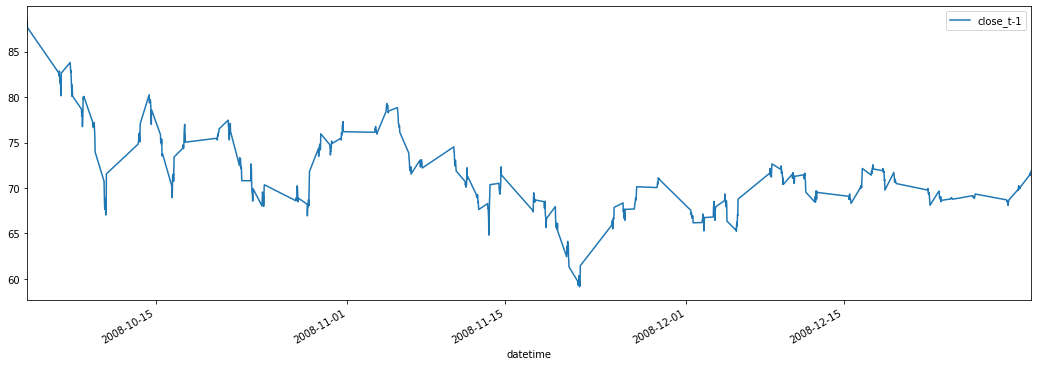

Number of instances: 673
Class distribution: 
0 in 0.5230312035661219%
1 in 0.4769687964338782%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 10:00:00  90.9141  90.9298  89.9281  90.1963  54477075.0
1  2008-10-01 11:00:00  90.1884  90.8115  89.8808  90.6538  36943253.2
2  2008-10-01 12:00:00  90.6538  92.0026  90.4881  91.6634  59127956.0
3  2008-10-01 13:00:00  91.6634  91.7975  90.5039  91.1744  82107301.0
4  2008-10-01 14:00:00  91.1665  92.0420  90.8352  91.4977  58405650.0
             datetime     open     high      low    close       volume  \
0 2008-10-08 13:00:00  77.2762  80.1710  77.2525  79.9974  110568322.0   
1 2008-10-08 14:00:00  79.9974  80.5969  79.0982  79.8318   90382667.0   
2 2008-10-08 15:00:00  79.8239  80.5890  77.4181  77.6153  135614800.0   
3 2008-10-09 11:00:00  76.6767  77.9308  75.6671  76.8739   92044317.0   
4 2008-10-09 12:00:00  76.8660  77.4655  76.2665  76.6294   34606429.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sa

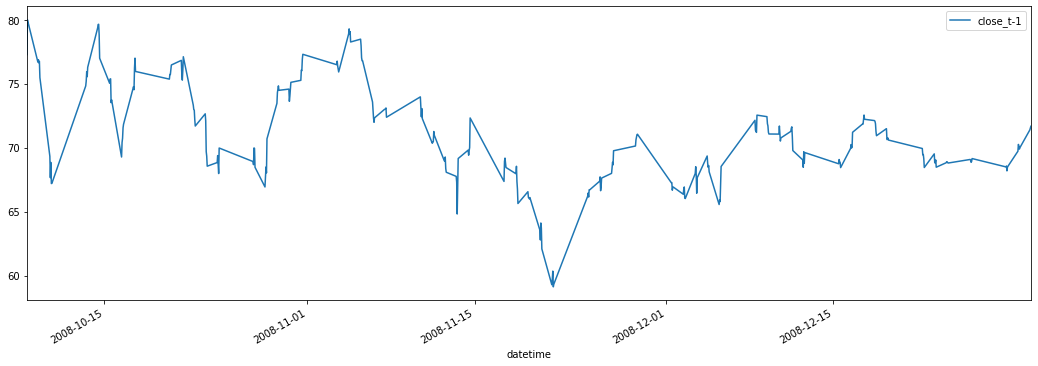

Number of instances: 292
Class distribution: 
0 in 0.5136986301369864%
1 in 0.4863013698630137%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-04-01 09:31:00  62.9242  62.9643  62.8041  62.8121  1703640.0
1  2009-04-01 09:32:00  62.8121  62.8521  62.7720  62.8361  1328410.0
2  2009-04-01 09:33:00  62.8361  62.8922  62.7961  62.8281  1351580.0
3  2009-04-01 09:34:00  62.8281  62.8441  62.7400  62.7480  1830900.0
4  2009-04-01 09:35:00  62.7400  62.9002  62.7320  62.8842  1378030.0
             datetime     open     high      low    close     volume  \
0 2009-04-01 10:05:00  63.4608  63.5008  63.3567  63.5008  1834260.0   
1 2009-04-01 10:06:00  63.5089  63.5169  63.3647  63.3807  1077720.0   
2 2009-04-01 10:07:00  63.3807  63.5329  63.3487  63.4768  1193020.0   
3 2009-04-01 10:08:00  63.4848  63.5569  63.4768  63.4928  1558590.0   
4 2009-04-01 10:09:00  63.4928  63.5169  63.4528  63.5008  1045390.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

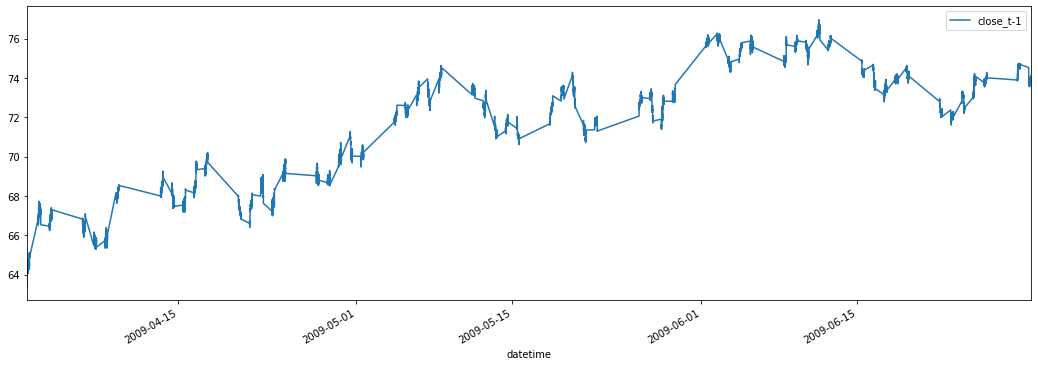

Number of instances: 22302
Class distribution: 
0 in 0.5413864227423549%
1 in 0.45861357725764507%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:35:00  62.7400  63.0123  62.7320  62.9482  10291160.0
1  2009-04-01 09:40:00  62.9482  63.0524  62.8922  62.9322   5940562.0
2  2009-04-01 09:45:00  62.9322  63.0443  62.8441  62.8601   4156901.0
3  2009-04-01 09:50:00  62.8601  62.9482  62.8441  62.9162   3976654.0
4  2009-04-01 09:55:00  62.9162  63.1885  62.8842  63.1885   5225154.0
             datetime     open     high      low    close     volume  \
0 2009-04-01 12:20:00  64.6621  64.6861  64.5820  64.6701  3775163.0   
1 2009-04-01 12:25:00  64.6621  64.6701  64.5340  64.5980  2092137.0   
2 2009-04-01 12:30:00  64.5980  64.6861  64.5740  64.5900  2357284.0   
3 2009-04-01 12:35:00  64.5820  64.5900  64.4379  64.5099  2528856.0   
4 2009-04-01 12:40:00  64.5019  64.5500  64.4699  64.4859  1021232.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    pp

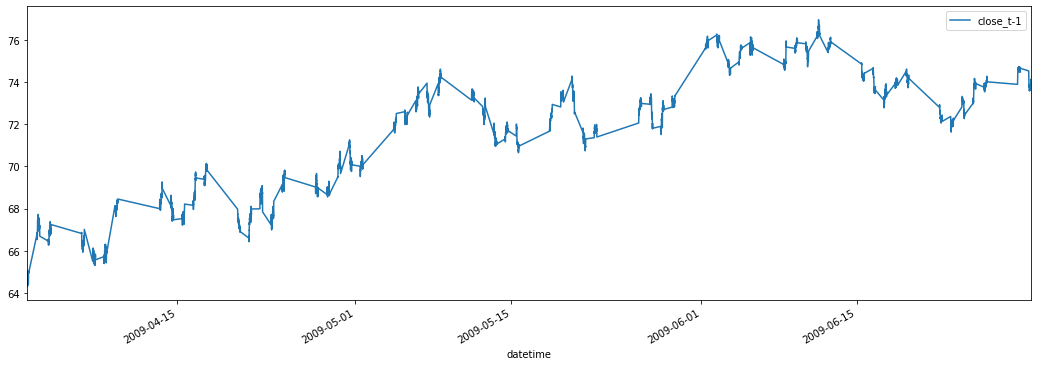

Number of instances: 4445
Class distribution: 
0 in 0.5111361079865017%
1 in 0.48886389201349834%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:40:00  62.9482  63.0524  62.8441  62.8601  10097463.0
1  2009-04-01 09:50:00  62.8601  63.1885  62.8441  63.1885   9201808.0
2  2009-04-01 10:00:00  63.1805  63.5569  63.1805  63.5008  18302730.0
3  2009-04-01 10:10:00  63.5089  63.9013  63.4928  63.8853  18080494.0
4  2009-04-01 10:20:00  63.8853  64.0935  63.8132  63.9013  18363720.0
             datetime     open     high      low    close      volume  \
0 2009-04-01 15:10:00  64.5179  64.5660  64.2136  64.4779  16329436.0   
1 2009-04-01 15:20:00  64.4939  64.6701  64.3898  64.5900   9487192.0   
2 2009-04-01 15:30:00  64.5980  65.0946  64.4298  65.0305  15594819.0   
3 2009-04-01 15:40:00  65.0305  65.1666  64.9985  65.0385  15257300.0   
4 2009-04-01 15:50:00  65.0305  65.2067  64.8143  64.8943  23581310.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

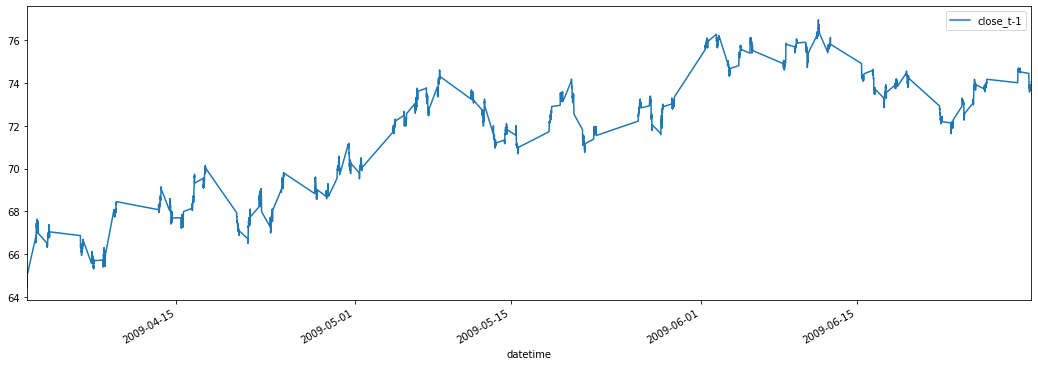

Number of instances: 2174
Class distribution: 
0 in 0.5022999080036799%
1 in 0.49770009199632015%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:45:00  62.9322  63.1885  62.8441  63.1885  13358709.0
1  2009-04-01 10:00:00  63.1805  63.6690  63.1805  63.6530  27023954.0
2  2009-04-01 10:15:00  63.6610  64.0935  63.5729  63.9013  27722990.0
3  2009-04-01 10:30:00  63.9013  64.3418  63.7491  64.2216  22349578.0
4  2009-04-01 10:45:00  64.2216  64.3978  64.1335  64.1816  25935541.0
             datetime     open     high      low    close      volume  \
0 2009-04-02 11:45:00  67.1848  67.3370  67.1368  67.2970  11640337.0   
1 2009-04-02 12:00:00  67.2970  67.3931  67.1688  67.3610   8691697.0   
2 2009-04-02 12:15:00  67.3690  67.7374  67.3690  67.6333  21319565.0   
3 2009-04-02 12:30:00  67.6333  67.7615  67.5853  67.6654  10603529.0   
4 2009-04-02 12:45:00  67.6573  67.6974  67.4091  67.4091  14465048.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

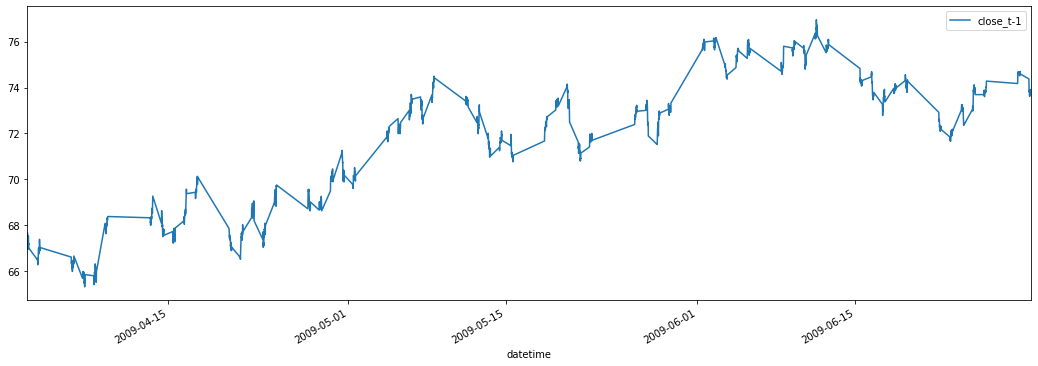

Number of instances: 1419
Class distribution: 
0 in 0.49119097956307256%
1 in 0.5088090204369274%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 10:00:00  63.1805  64.0935  63.1805  63.9013  54746944.0
1  2009-04-01 10:30:00  63.9013  64.3978  63.7491  64.1816  48285119.0
2  2009-04-01 11:00:00  64.1736  64.3498  63.9814  64.3017  28103720.0
3  2009-04-01 11:30:00  64.3017  64.5500  64.2296  64.4779  20026871.0
4  2009-04-01 12:00:00  64.4779  64.8063  64.4699  64.5980  23045517.0
             datetime     open     high      low    close      volume  \
0 2009-04-03 14:30:00  67.3770  67.4331  67.0887  67.2729  21140263.0   
1 2009-04-03 15:00:00  67.2649  67.2970  66.8325  66.8885  25640741.0   
2 2009-04-03 15:30:00  66.8965  67.4972  66.7283  67.4731  47516478.0   
3 2009-04-06 10:30:00  66.3359  66.5521  66.2718  66.4480  18305067.0   
4 2009-04-06 11:00:00  66.4480  66.4560  66.1517  66.3680  16053655.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

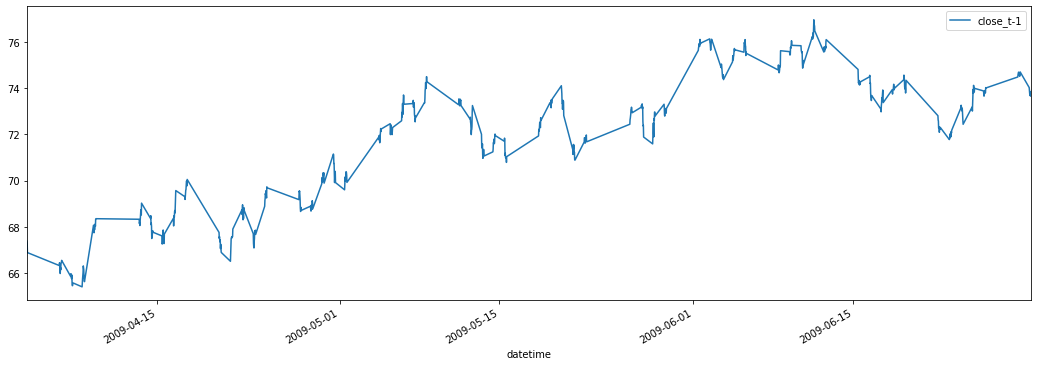

Number of instances: 662
Class distribution: 
0 in 0.4954682779456193%
1 in 0.5045317220543807%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close       volume
0  2009-04-01 10:00:00  63.1805  64.3978  63.1805  64.1816  103032063.0
1  2009-04-01 11:00:00  64.1736  64.5500  63.9814  64.4779   48130591.0
2  2009-04-01 12:00:00  64.4779  64.8063  64.3017  64.3658   35726423.0
3  2009-04-01 13:00:00  64.3658  64.8783  64.2136  64.8383   37909071.0
4  2009-04-01 14:00:00  64.8383  65.1026  64.7262  64.8863   46676520.0
             datetime     open     high      low    close      volume  \
0 2009-04-08 13:00:00  66.3199  66.3359  66.0796  66.1517  21076834.4   
1 2009-04-08 14:00:00  66.1517  66.1757  65.5431  65.6792  41711849.0   
2 2009-04-08 15:00:00  65.6712  66.1597  65.3508  66.1037  49713721.0   
3 2009-04-09 11:00:00  67.9136  68.0257  67.6173  67.8496  31722344.5   
4 2009-04-09 12:00:00  67.8496  67.9937  67.7054  67.8896  28668111.1   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sa

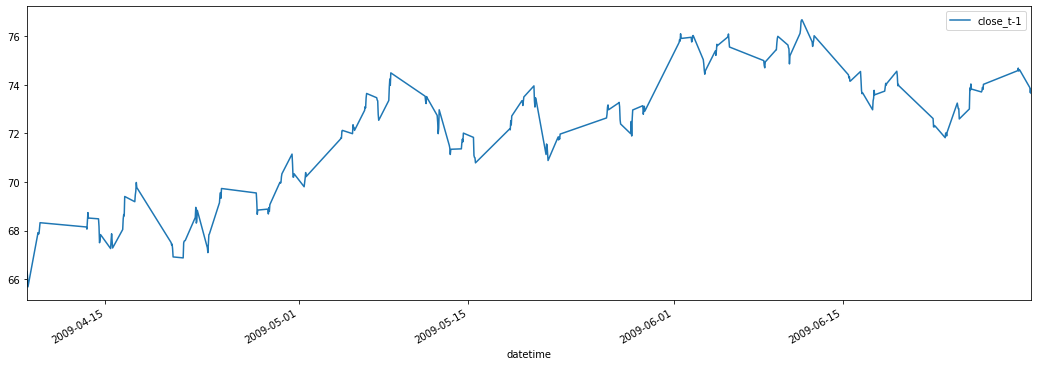

Number of instances: 287
Class distribution: 
0 in 0.4529616724738676%
1 in 0.5470383275261324%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-10-01 09:31:00  85.1632  85.2037  85.0904  85.0985  1099090.0
1  2009-10-01 09:32:00  85.0985  85.1470  85.0338  85.0661  1324020.0
2  2009-10-01 09:33:00  85.0661  85.0985  85.0338  85.0580   639264.0
3  2009-10-01 09:34:00  85.0661  85.1228  85.0257  85.0580  1541750.0
4  2009-10-01 09:35:00  85.0580  85.0661  84.7424  84.7748  3616010.0
             datetime     open     high      low    close     volume  \
0 2009-10-01 10:05:00  84.5725  84.6372  84.4026  84.4268  2207180.0   
1 2009-10-01 10:06:00  84.4187  84.4592  84.3216  84.4026  3072900.0   
2 2009-10-01 10:07:00  84.4026  84.4430  84.2812  84.3702  1644280.0   
3 2009-10-01 10:08:00  84.3702  84.4754  84.2812  84.4511  2309230.0   
4 2009-10-01 10:09:00  84.4592  84.4592  84.3378  84.3459  2092700.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

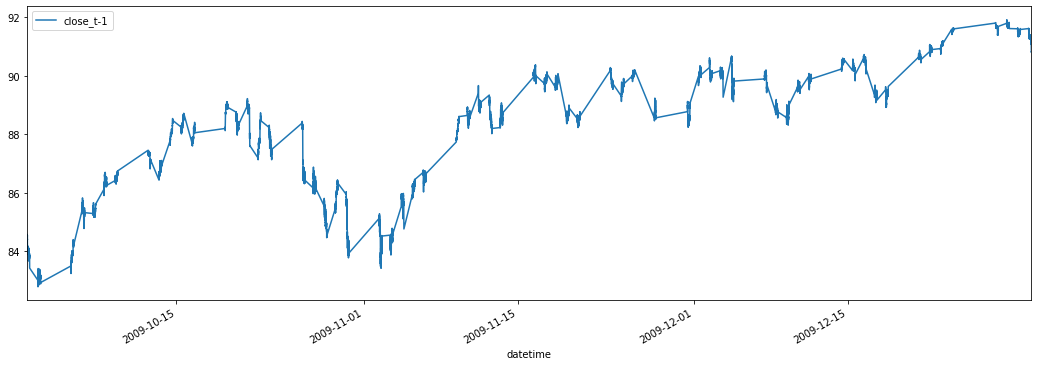

Number of instances: 22656
Class distribution: 
0 in 0.5801995056497176%
1 in 0.4198004943502825%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-10-01 09:35:00  85.0580  85.0661  84.7424  84.9124  7311712.0
1  2009-10-01 09:40:00  84.9124  84.9690  84.8315  84.9366  4910944.0
2  2009-10-01 09:45:00  84.9286  85.0499  84.8638  85.0338  4898785.0
3  2009-10-01 09:50:00  85.0418  85.0418  84.8072  84.8638  5507797.0
4  2009-10-01 09:55:00  84.8638  84.9609  84.8072  84.9528  4017781.0
             datetime     open     high      low    close     volume  \
0 2009-10-01 12:20:00  84.0708  84.1841  84.0627  84.1517  1671058.0   
1 2009-10-01 12:25:00  84.1517  84.1598  84.0870  84.1355  1562317.8   
2 2009-10-01 12:30:00  84.1274  84.1922  84.1193  84.1679  1219541.0   
3 2009-10-01 12:35:00  84.1598  84.1841  84.0789  84.0789   865999.1   
4 2009-10-01 12:40:00  84.0870  84.1112  84.0222  84.0384   867590.8   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

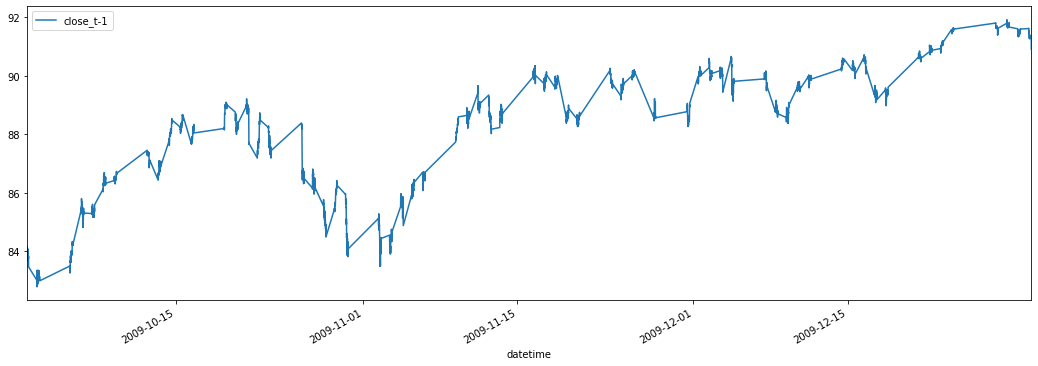

Number of instances: 4516
Class distribution: 
0 in 0.5338795394154119%
1 in 0.4661204605845881%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 09:40:00  84.9124  85.0499  84.8315  85.0338   9809729.0
1  2009-10-01 09:50:00  85.0418  85.0418  84.8072  84.9528   9525578.0
2  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.3459  31893620.0
3  2009-10-01 10:10:00  84.3459  84.4997  84.2812  84.4430  10193724.0
4  2009-10-01 10:20:00  84.4430  84.5482  84.3621  84.4026   6427022.0
             datetime     open     high      low    close      volume  \
0 2009-10-01 15:10:00  83.7633  83.8927  83.7309  83.8604   3815998.0   
1 2009-10-01 15:20:00  83.8604  83.8766  83.6985  83.7471   8477351.0   
2 2009-10-01 15:30:00  83.7390  83.9008  83.7228  83.8280   6694142.0   
3 2009-10-01 15:40:00  83.8199  83.9656  83.7471  83.8037   6930544.0   
4 2009-10-01 15:50:00  83.8037  83.8118  83.3101  83.3425  26594250.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

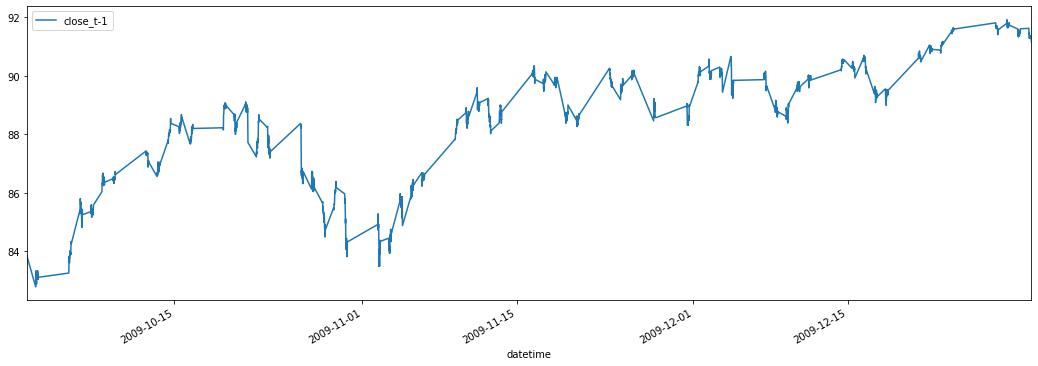

Number of instances: 2209
Class distribution: 
0 in 0.5151652331371661%
1 in 0.4848347668628339%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 09:45:00  84.9286  85.0499  84.8072  84.9528  14424363.0
1  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4511  37215495.0
2  2009-10-01 10:15:00  84.4430  84.5482  84.2974  84.4026  11298871.0
3  2009-10-01 10:30:00  84.4026  84.6130  84.3055  84.5320   7983153.0
4  2009-10-01 10:45:00  84.5320  84.5644  84.3540  84.4268   7035694.7
             datetime     open     high      low    close     volume  \
0 2009-10-02 11:45:00  82.9055  83.0269  82.8326  82.8893  5507598.0   
1 2009-10-02 12:00:00  82.8812  83.1563  82.8731  83.0107  5243705.0   
2 2009-10-02 12:15:00  83.0107  83.2130  83.0107  83.1806  3983801.0   
3 2009-10-02 12:30:00  83.1887  83.2858  83.0673  83.0997  5722013.8   
4 2009-10-02 12:45:00  83.0916  83.2130  83.0107  83.1725  4219989.5   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    p

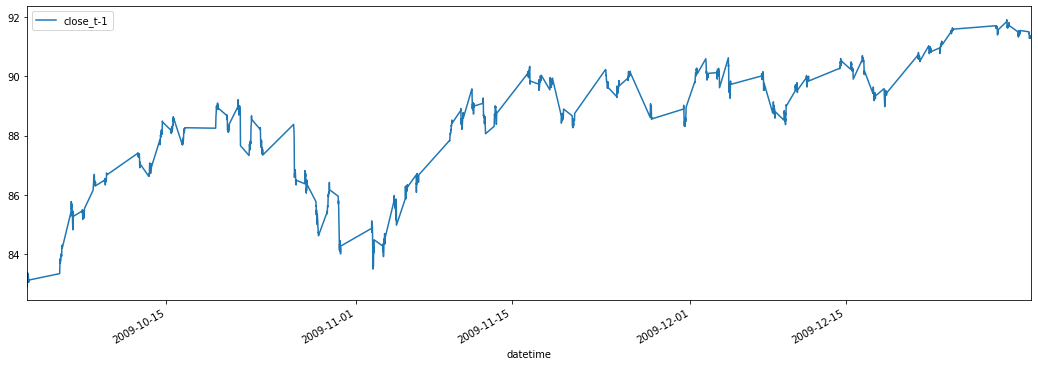

Number of instances: 1442
Class distribution: 
0 in 0.507628294036061%
1 in 0.492371705963939%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4026  48514366.0
1  2009-10-01 10:30:00  84.4026  84.6130  84.3055  84.4268  15018847.7
2  2009-10-01 11:00:00  84.4349  84.4430  83.8685  83.9413  26616278.0
3  2009-10-01 11:30:00  83.9413  84.0627  83.8604  84.0141  14046438.0
4  2009-10-01 12:00:00  84.0222  84.1841  83.8766  84.1355   9900379.8
             datetime     open     high      low    close      volume  \
0 2009-10-05 14:30:00  83.9494  84.4187  83.9494  84.2893  16012790.2   
1 2009-10-05 15:00:00  84.2893  84.3702  84.2326  84.2893  11291548.0   
2 2009-10-05 15:30:00  84.2893  84.3216  84.1274  84.1841  20860529.0   
3 2009-10-06 10:30:00  85.2846  85.5759  85.2684  85.5355  12296154.5   
4 2009-10-06 11:00:00  85.5274  85.8673  85.4869  85.6973  16922767.6   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

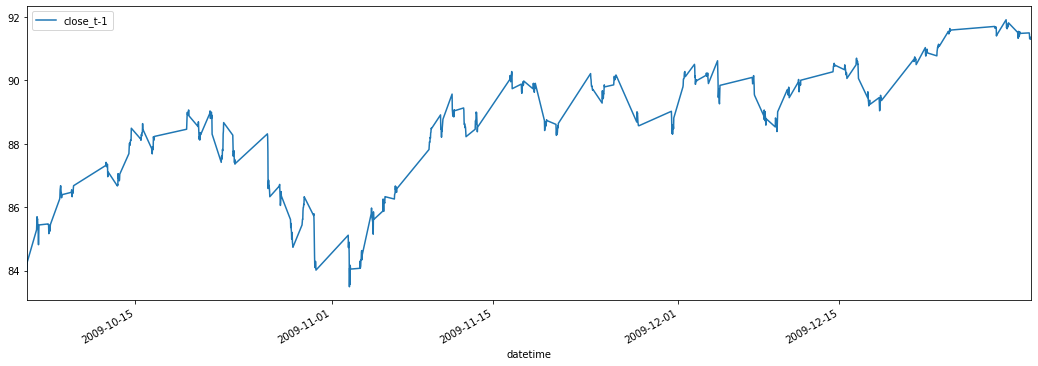

Number of instances: 673
Class distribution: 
0 in 0.5185735512630015%
1 in 0.4814264487369985%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4268  63533213.7
1  2009-10-01 11:00:00  84.4349  84.4430  83.8604  84.0141  40662716.0
2  2009-10-01 12:00:00  84.0222  84.1922  83.8766  84.0384  16832334.2
3  2009-10-01 13:00:00  84.0384  84.0546  83.6419  83.8927  30415849.6
4  2009-10-01 14:00:00  83.8847  84.1193  83.7794  83.8927  24283978.2
             datetime     open     high      low    close      volume  \
0 2009-10-08 13:00:00  86.6360  86.6441  86.2314  86.4580  23587932.6   
1 2009-10-08 14:00:00  86.4661  86.4823  86.1829  86.3609  17968975.4   
2 2009-10-08 15:00:00  86.3609  86.5713  86.1910  86.2719  42062571.0   
3 2009-10-09 11:00:00  86.4985  86.6117  86.4094  86.4337  22190212.3   
4 2009-10-09 12:00:00  86.4337  86.5066  86.2881  86.4580  13108695.8   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10  

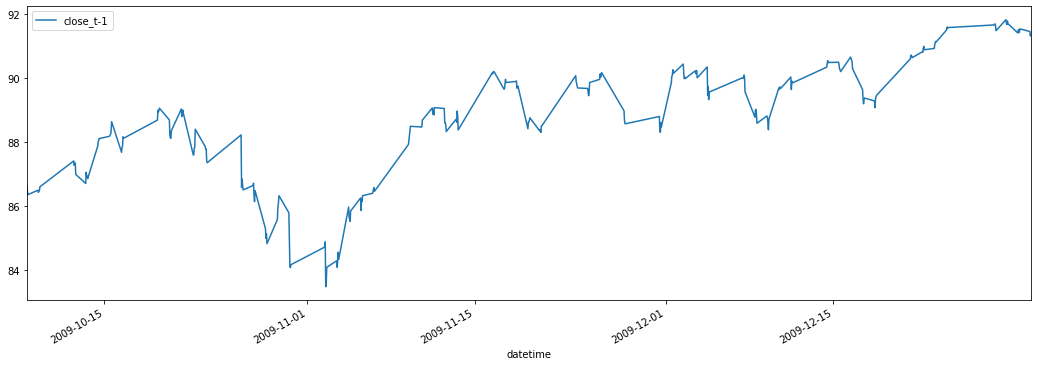

Number of instances: 292
Class distribution: 
0 in 0.4691780821917808%
1 in 0.5308219178082192%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:31:00  91.4633  91.5202  91.4470  91.4877  1575630.0
1  2010-01-04 09:32:00  91.4877  91.4958  91.4552  91.4877   910577.0
2  2010-01-04 09:33:00  91.4958  91.4958  91.4552  91.4552  1227660.0
3  2010-01-04 09:34:00  91.4552  91.4714  91.4470  91.4714   609509.0
4  2010-01-04 09:35:00  91.4633  91.6016  91.4633  91.5935  1925110.0
             datetime     open     high      low    close    volume  \
0 2010-01-04 10:05:00  91.7318  91.8294  91.7236  91.8213  858800.0   
1 2010-01-04 10:06:00  91.8294  91.8538  91.8131  91.8538  370892.0   
2 2010-01-04 10:07:00  91.8457  91.8782  91.8294  91.8294  385176.0   
3 2010-01-04 10:08:00  91.8294  91.8701  91.8131  91.8131  387669.0   
4 2010-01-04 10:09:00  91.8213  91.8782  91.8213  91.8782  284207.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    91.7318

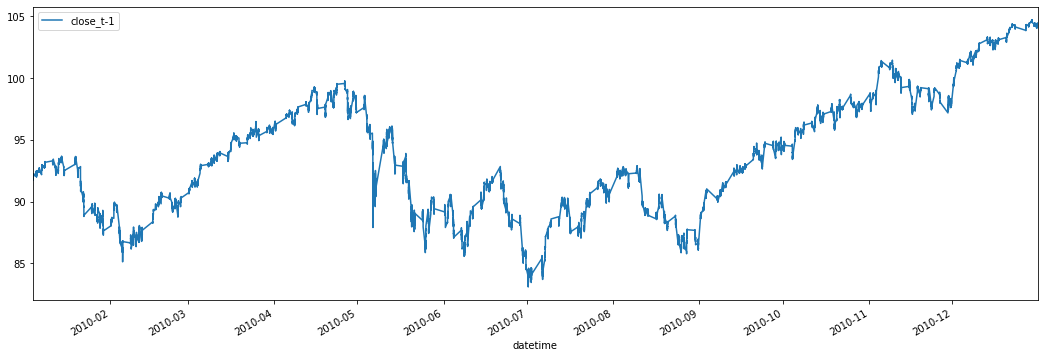

Number of instances: 89208
Class distribution: 
0 in 0.5606223657071114%
1 in 0.4393776342928885%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:35:00  91.4633  91.6830  91.4633  91.6423  5384792.0
1  2010-01-04 09:40:00  91.6504  91.7318  91.6423  91.7155  3536730.0
2  2010-01-04 09:45:00  91.7155  91.8864  91.6830  91.8864  5355208.0
3  2010-01-04 09:50:00  91.8782  91.8864  91.7480  91.7887  3617526.0
4  2010-01-04 09:55:00  91.7887  91.8213  91.7318  91.7969  2321085.0
             datetime     open     high      low    close     volume  \
0 2010-01-04 12:20:00  92.1467  92.1792  92.1386  92.1630   779264.6   
1 2010-01-04 12:25:00  92.1711  92.1874  92.1548  92.1792   604726.5   
2 2010-01-04 12:30:00  92.1792  92.1874  92.1711  92.1874   309085.8   
3 2010-01-04 12:35:00  92.1874  92.2199  92.1711  92.1792  1012131.0   
4 2010-01-04 12:40:00  92.1874  92.2118  92.1548  92.1955   643233.1   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    9

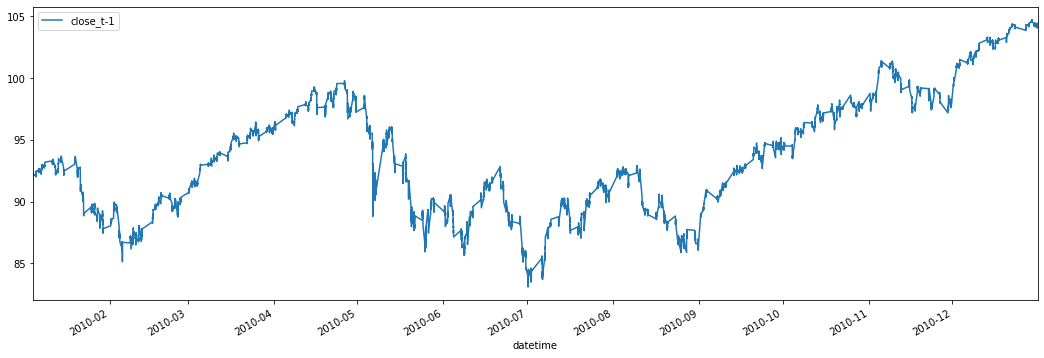

Number of instances: 17864
Class distribution: 
0 in 0.5184729064039408%
1 in 0.4815270935960591%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:40:00  91.6504  91.8864  91.6423  91.8864  8891938.0
1  2010-01-04 09:50:00  91.8782  91.8864  91.7318  91.7969  5938611.0
2  2010-01-04 10:00:00  91.8050  91.9026  91.7155  91.8782  7878538.0
3  2010-01-04 10:10:00  91.8701  91.8782  91.7887  91.8213  3096548.0
4  2010-01-04 10:20:00  91.8213  92.0165  91.8050  92.0084  4446739.0
             datetime     open     high      low    close     volume  \
0 2010-01-04 15:10:00  92.2199  92.2281  92.1630  92.1792  1775145.9   
1 2010-01-04 15:20:00  92.1792  92.1874  92.1304  92.1467  1719545.3   
2 2010-01-04 15:30:00  92.1386  92.1711  92.0897  92.0897  3238517.9   
3 2010-01-04 15:40:00  92.0979  92.1955  92.0816  92.1955  4617691.0   
4 2010-01-04 15:50:00  92.1955  92.1955  92.1142  92.1955  9876571.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    

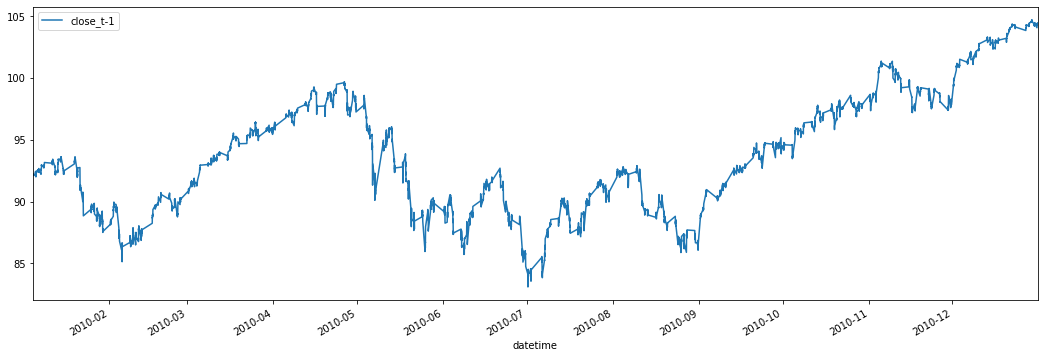

Number of instances: 8789
Class distribution: 
0 in 0.5046080327682331%
1 in 0.495391967231767%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 09:45:00  91.7155  91.8864  91.6830  91.7969  11293819.0
1  2010-01-04 10:00:00  91.8050  91.9026  91.7155  91.8538   9559761.0
2  2010-01-04 10:15:00  91.8619  92.0165  91.8050  92.0084   5862064.0
3  2010-01-04 10:30:00  92.0003  92.0816  91.9840  92.0816   6069863.7
4  2010-01-04 10:45:00  92.0816  92.1304  92.0084  92.0165   4322844.4
             datetime     open     high      low    close     volume  \
0 2010-01-05 11:45:00  92.1955  92.2362  92.1955  92.2199  3501877.5   
1 2010-01-05 12:00:00  92.2281  92.3420  92.2199  92.3420  2534880.7   
2 2010-01-05 12:15:00  92.3338  92.3420  92.2606  92.2606  2698641.4   
3 2010-01-05 12:30:00  92.2687  92.2769  92.2362  92.2525  2026552.7   
4 2010-01-05 12:45:00  92.2525  92.2606  92.1548  92.2199  2051990.5   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \

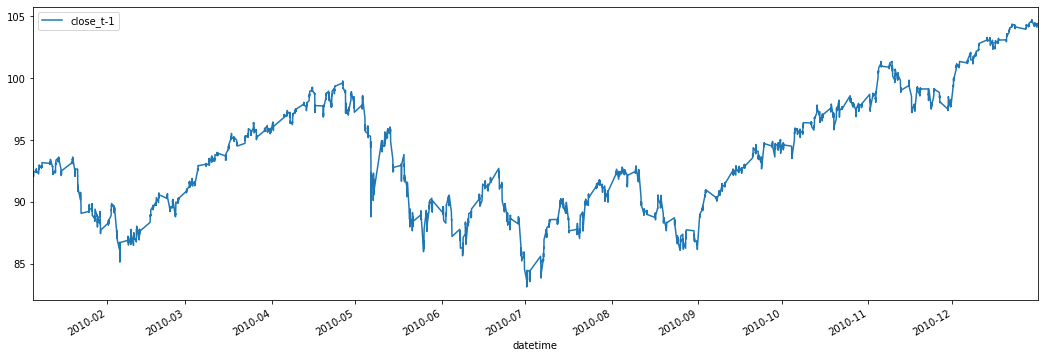

Number of instances: 5766
Class distribution: 
0 in 0.49791883454734653%
1 in 0.5020811654526535%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 10:00:00  91.8050  92.0165  91.7155  92.0084  15421825.0
1  2010-01-04 10:30:00  92.0003  92.1304  91.9840  92.0165  10392708.1
2  2010-01-04 11:00:00  92.0165  92.1711  92.0165  92.1223   6983607.0
3  2010-01-04 11:30:00  92.1142  92.2525  92.0979  92.1630   7472627.2
4  2010-01-04 12:00:00  92.1630  92.1874  92.1386  92.1792   4423029.0
             datetime     open     high      low    close      volume  \
0 2010-01-06 14:30:00  92.5860  92.7406  92.5779  92.6674   8677951.7   
1 2010-01-06 15:00:00  92.6674  92.6918  92.5291  92.6023   7703751.8   
2 2010-01-06 15:30:00  92.5942  92.6593  92.4314  92.5372  16328217.1   
3 2010-01-07 10:30:00  92.3176  92.6837  92.2769  92.5942  16685491.7   
4 2010-01-07 11:00:00  92.5942  92.6430  92.5616  92.5616   5953549.9   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo

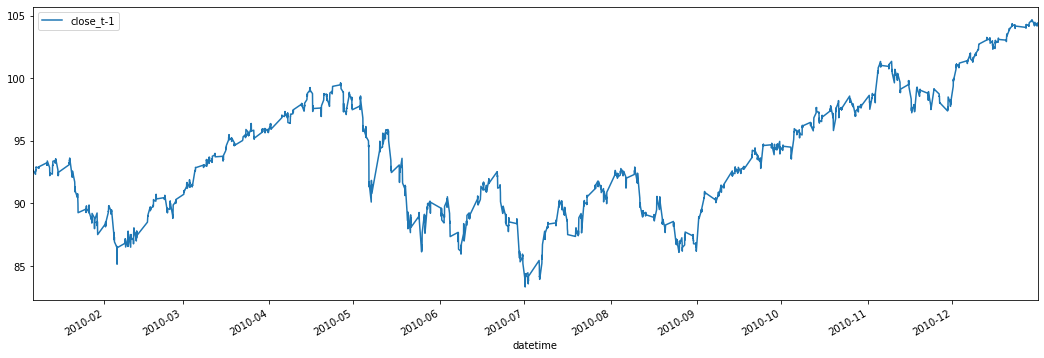

Number of instances: 2741
Class distribution: 
0 in 0.4848595403137541%
1 in 0.5151404596862459%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 10:00:00  91.8050  92.1304  91.7155  92.0165  25814533.1
1  2010-01-04 11:00:00  92.0165  92.2525  92.0165  92.1630  14456234.2
2  2010-01-04 12:00:00  92.1630  92.2281  92.1386  92.1792   8212385.3
3  2010-01-04 13:00:00  92.2037  92.2443  92.0735  92.0897   8767227.0
4  2010-01-04 14:00:00  92.0979  92.2443  92.0735  92.1630   8978854.5
             datetime     open     high      low    close      volume  \
0 2010-01-11 13:00:00  93.0416  93.1881  92.9928  93.1637   8874288.2   
1 2010-01-11 14:00:00  93.1637  93.2288  93.0823  93.1881  10974788.0   
2 2010-01-11 15:00:00  93.1718  93.4484  93.1718  93.3427  26081180.0   
3 2010-01-12 11:00:00  92.8464  92.8871  92.6430  92.6674  18842589.7   
4 2010-01-12 12:00:00  92.6593  92.6674  92.1711  92.2118  29525661.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10

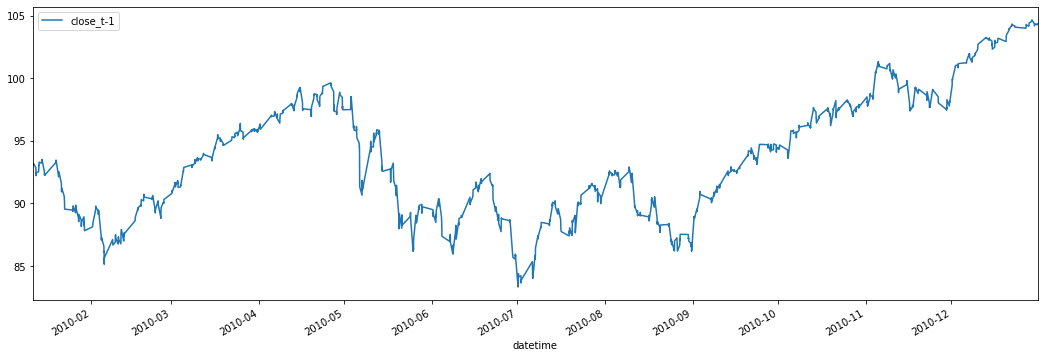

Number of instances: 1232
Class distribution: 
0 in 0.45616883116883117%
1 in 0.5438311688311688%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:31:00  105.122  105.180  105.097  105.180  1039570.0
1  2011-01-03 09:32:00  105.180  105.197  105.130  105.147   727576.0
2  2011-01-03 09:33:00  105.147  105.188  105.130  105.138   554285.0
3  2011-01-03 09:34:00  105.138  105.155  105.130  105.155   751152.0
4  2011-01-03 09:35:00  105.147  105.172  105.138  105.147   674601.0
             datetime     open     high      low    close    volume  \
0 2011-01-03 10:05:00  105.387  105.412  105.387  105.396  390012.0   
1 2011-01-03 10:06:00  105.396  105.412  105.379  105.387  366656.0   
2 2011-01-03 10:07:00  105.387  105.429  105.371  105.396  691340.0   
3 2011-01-03 10:08:00  105.387  105.396  105.371  105.371  274239.0   
4 2011-01-03 10:09:00  105.379  105.412  105.379  105.412  198760.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    ppo_10  \
0   

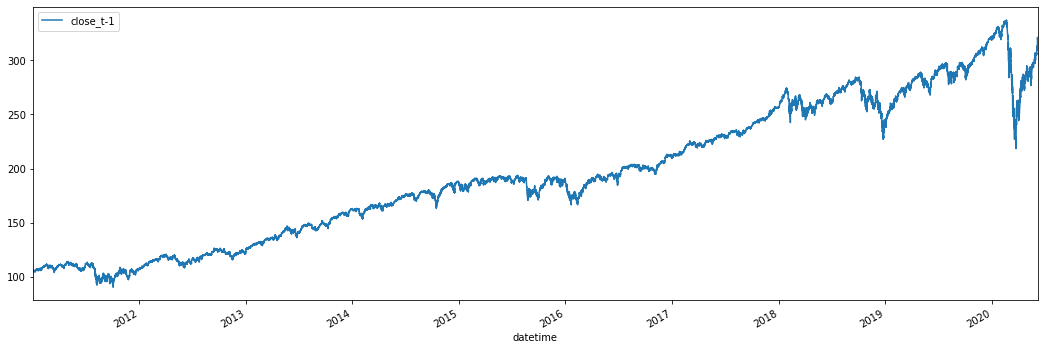

Number of instances: 839688
Class distribution: 
0 in 0.535205933632492%
1 in 0.4647940663675079%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:35:00  105.147  105.197  105.089  105.163  2843639.0
1  2011-01-03 09:40:00  105.172  105.338  105.147  105.313  4564929.0
2  2011-01-03 09:45:00  105.313  105.437  105.296  105.412  4152903.0
3  2011-01-03 09:50:00  105.412  105.421  105.271  105.404  2593241.0
4  2011-01-03 09:55:00  105.404  105.479  105.387  105.462  1841539.0
             datetime     open     high      low    close     volume  \
0 2011-01-03 12:20:00  105.794  105.810  105.785  105.810   638693.1   
1 2011-01-03 12:25:00  105.810  105.810  105.744  105.752  1092241.2   
2 2011-01-03 12:30:00  105.752  105.777  105.711  105.769   561775.8   
3 2011-01-03 12:35:00  105.761  105.769  105.744  105.744   551875.6   
4 2011-01-03 12:40:00  105.752  105.769  105.744  105.769   473521.9   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    ppo_10  

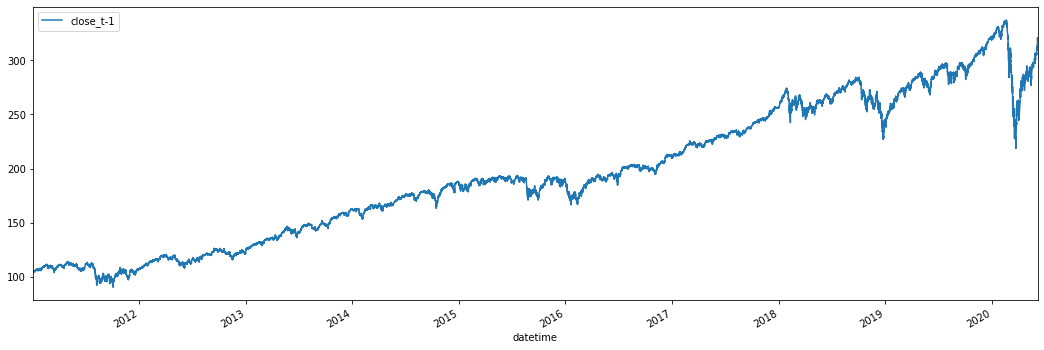

Number of instances: 168384
Class distribution: 
0 in 0.5063129513492969%
1 in 0.4936870486507032%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:40:00  105.172  105.437  105.147  105.412  8717832.0
1  2011-01-03 09:50:00  105.412  105.479  105.271  105.462  4434780.0
2  2011-01-03 10:00:00  105.470  105.487  105.329  105.412  5506092.0
3  2011-01-03 10:10:00  105.404  105.578  105.404  105.578  5355568.0
4  2011-01-03 10:20:00  105.578  105.595  105.504  105.520  2735913.6
             datetime     open     high      low    close      volume  \
0 2011-01-03 15:10:00  105.495  105.520  105.387  105.445   5947212.0   
1 2011-01-03 15:20:00  105.445  105.445  105.371  105.412   4161013.0   
2 2011-01-03 15:30:00  105.412  105.528  105.404  105.445   3818067.1   
3 2011-01-03 15:40:00  105.445  105.528  105.404  105.512   6668558.0   
4 2011-01-03 15:50:00  105.512  105.603  105.387  105.396  15872377.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    p

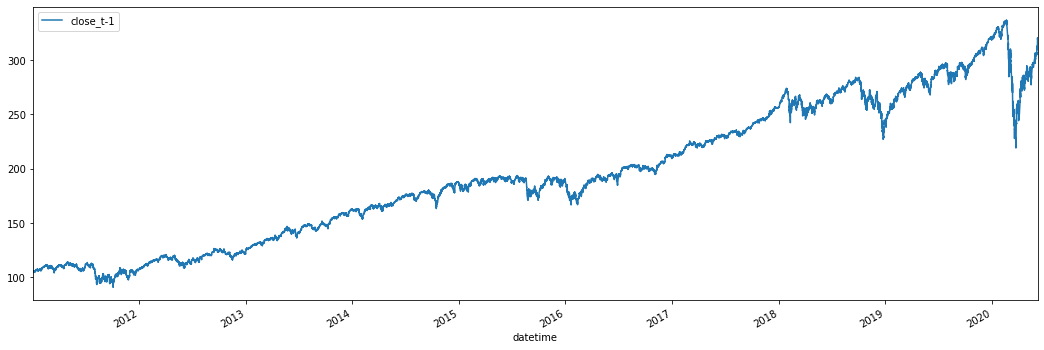

Number of instances: 82989
Class distribution: 
0 in 0.4956560508019135%
1 in 0.5043439491980864%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:45:00  105.313  105.479  105.271  105.462  8587683.0
1  2011-01-03 10:00:00  105.470  105.487  105.329  105.437  7018108.0
2  2011-01-03 10:15:00  105.437  105.595  105.437  105.520  6579465.6
3  2011-01-03 10:30:00  105.520  105.595  105.470  105.570  4145338.0
4  2011-01-03 10:45:00  105.562  105.711  105.396  105.686  4506502.0
             datetime     open     high      low    close     volume  \
0 2011-01-04 11:45:00  105.155  105.172  104.997  104.997  3346220.4   
1 2011-01-04 12:00:00  105.006  105.039  104.890  104.964  5050975.6   
2 2011-01-04 12:15:00  104.964  104.973  104.749  104.798  4654192.6   
3 2011-01-04 12:30:00  104.790  104.815  104.690  104.707  4104832.0   
4 2011-01-04 12:45:00  104.707  104.790  104.682  104.790  3818314.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

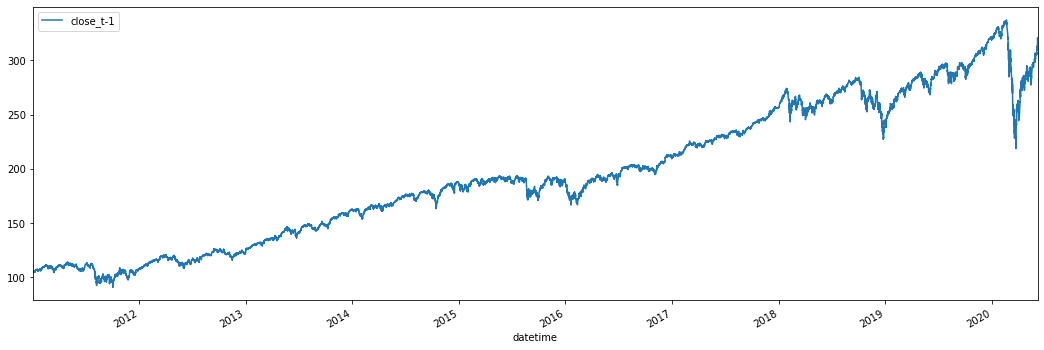

Number of instances: 54526
Class distribution: 
0 in 0.4904449253567106%
1 in 0.5095550746432894%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2011-01-03 10:00:00  105.470  105.595  105.329  105.520  13597573.6
1  2011-01-03 10:30:00  105.520  105.711  105.396  105.686   8651840.0
2  2011-01-03 11:00:00  105.686  105.736  105.620  105.719   8542335.3
3  2011-01-03 11:30:00  105.711  105.852  105.661  105.752   8024646.6
4  2011-01-03 12:00:00  105.744  105.810  105.736  105.752   4823074.8
             datetime     open     high      low    close      volume  \
0 2011-01-05 14:30:00  105.769  105.835  105.702  105.835   6109368.0   
1 2011-01-05 15:00:00  105.835  105.960  105.769  105.827   8988097.9   
2 2011-01-05 15:30:00  105.827  105.910  105.769  105.877  14091098.0   
3 2011-01-06 10:30:00  105.926  106.043  105.702  105.769  12779084.0   
4 2011-01-06 11:00:00  105.769  105.785  105.362  105.603  14766294.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_1

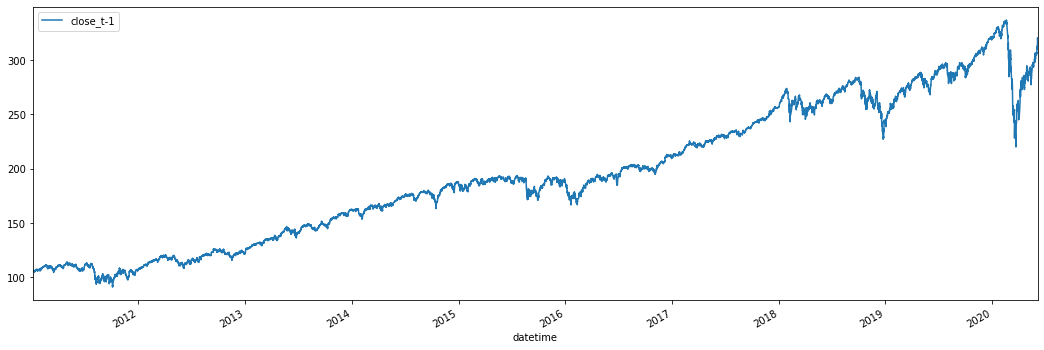

Number of instances: 26061
Class distribution: 
0 in 0.4793369402555543%
1 in 0.5206630597444457%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2011-01-03 10:00:00  105.470  105.711  105.329  105.686  22249413.6
1  2011-01-03 11:00:00  105.686  105.852  105.620  105.752  16566981.9
2  2011-01-03 12:00:00  105.744  105.810  105.645  105.702  10762185.3
3  2011-01-03 13:00:00  105.702  105.736  105.645  105.727   9742360.1
4  2011-01-03 14:00:00  105.727  105.752  105.520  105.595  14863480.4
             datetime     open     high      low    close      volume  \
0 2011-01-10 13:00:00  105.180  105.354  105.172  105.280  10718294.4   
1 2011-01-10 14:00:00  105.280  105.396  105.130  105.371  11840359.7   
2 2011-01-10 15:00:00  105.371  105.487  105.288  105.338  20932347.9   
3 2011-01-11 11:00:00  105.802  105.968  105.785  105.860  16947118.9   
4 2011-01-11 12:00:00  105.860  105.943  105.794  105.926   7329844.2   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10  

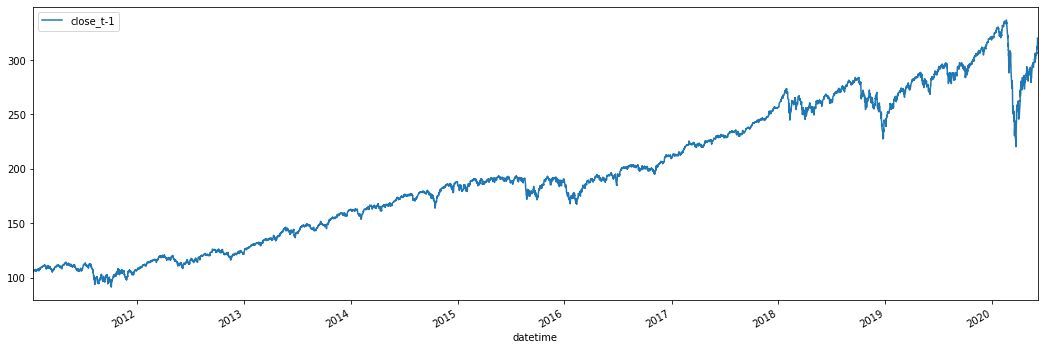

Number of instances: 11832
Class distribution: 
0 in 0.47439148073022314%
1 in 0.5256085192697769%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2008-10-01 09:31:00  90.8588  90.8746  90.7011  90.7090  1377100.0
1  2008-10-01 09:32:00  90.7090  90.7879  90.6932  90.7405  1230160.0
2  2008-10-01 09:33:00  90.7326  90.7642  90.7090  90.7405   990501.0
3  2008-10-01 09:34:00  90.7405  90.7642  90.5907  90.5985  1202520.0
4  2008-10-01 09:35:00  90.5985  90.6459  90.5670  90.5828  1309760.0
             datetime     open     high      low    close     volume  \
0 2008-10-01 10:05:00  90.2278  90.3225  90.1174  90.1884  1676150.0   
1 2008-10-01 10:06:00  90.1884  90.2199  90.0070  90.0937  1886200.0   
2 2008-10-01 10:07:00  90.1016  90.2121  90.0780  90.1963  1176430.0   
3 2008-10-01 10:08:00  90.1963  90.2909  90.1884  90.2042   720000.0   
4 2008-10-01 10:09:00  90.2042  90.2121  90.1016  90.1332   851841.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

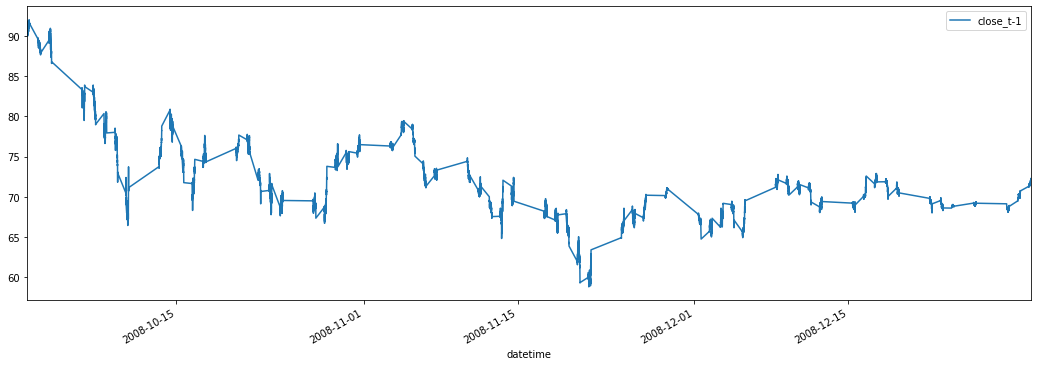

Number of instances: 22656
Class distribution: 
0 in 0.5310734463276836%
1 in 0.4689265536723164%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2008-10-01 09:35:00  90.5985  90.6459  90.3225  90.3461  6066000.0
1  2008-10-01 09:40:00  90.3461  90.8825  90.3382  90.8431  6758813.0
2  2008-10-01 09:45:00  90.8352  91.0403  90.8036  90.8746  8608398.0
3  2008-10-01 09:50:00  90.8746  90.8746  90.6459  90.7247  3484576.0
4  2008-10-01 09:55:00  90.7169  90.9772  90.6774  90.9219  3086975.0
             datetime     open     high      low    close     volume  \
0 2008-10-01 12:20:00  91.0008  91.1270  90.8746  91.1034  3380195.0   
1 2008-10-01 12:25:00  91.1034  91.1665  90.9535  91.0797  3272679.0   
2 2008-10-01 12:30:00  91.0797  91.5687  91.0324  91.5214  8320666.0   
3 2008-10-01 12:35:00  91.5214  91.6713  91.4583  91.4899  4683005.0   
4 2008-10-01 12:40:00  91.4899  91.6871  91.4268  91.4346  5525828.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

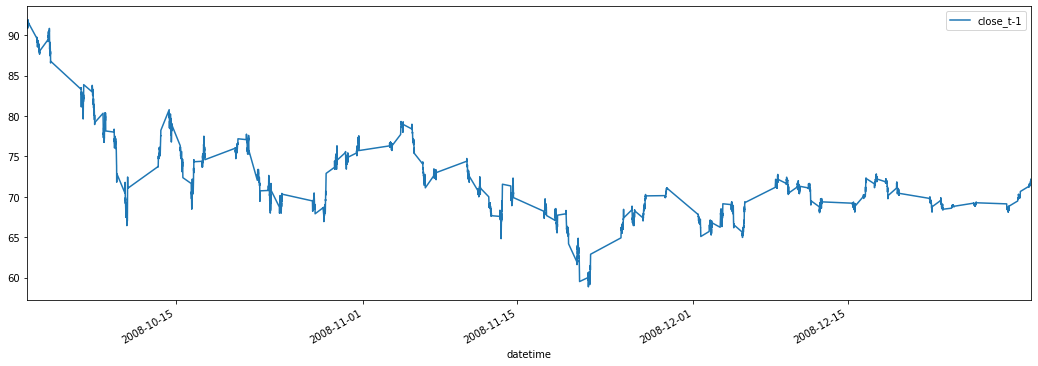

Number of instances: 4516
Class distribution: 
0 in 0.5221434898139947%
1 in 0.47785651018600533%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 09:40:00  90.3461  91.0403  90.3382  90.8746  15367211.0
1  2008-10-01 09:50:00  90.8746  90.9772  90.6459  90.9219   6571551.0
2  2008-10-01 10:00:00  90.9141  90.9298  90.0070  90.1332  15399333.0
3  2008-10-01 10:10:00  90.1332  90.4487  89.9675  90.4329  10157998.0
4  2008-10-01 10:20:00  90.4329  90.5433  90.3225  90.4723   8124848.0
             datetime     open     high      low    close      volume  \
0 2008-10-01 15:10:00  91.5372  91.7975  91.1744  91.3637   7904104.0   
1 2008-10-01 15:20:00  91.3637  91.5530  91.2611  91.4110   4608017.0   
2 2008-10-01 15:30:00  91.4189  91.6555  91.2848  91.3715   6783699.0   
3 2008-10-01 15:40:00  91.3715  91.6318  91.2927  91.3558   7525016.0   
4 2008-10-01 15:50:00  91.3558  91.6713  91.3163  91.4899  12618125.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

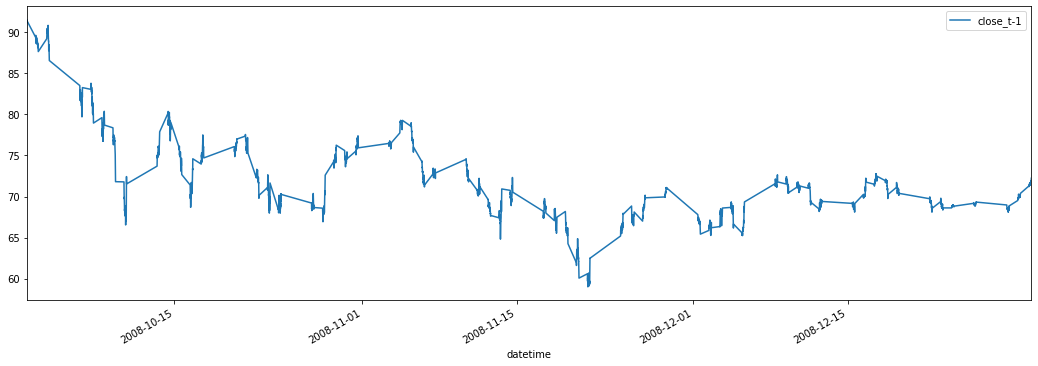

Number of instances: 2209
Class distribution: 
0 in 0.5196921684019918%
1 in 0.48030783159800816%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 09:45:00  90.8352  91.0403  90.6459  90.9219  15179949.0
1  2008-10-01 10:00:00  90.9141  90.9298  89.9675  90.2988  20928953.0
2  2008-10-01 10:15:00  90.3067  90.5433  90.0701  90.4723  12753226.0
3  2008-10-01 10:30:00  90.4802  90.5039  90.0701  90.1568  10846906.0
4  2008-10-01 10:45:00  90.1568  90.2830  89.9281  90.1963   9947990.0
             datetime     open     high      low    close     volume  \
0 2008-10-02 11:45:00  89.1630  89.3286  89.0289  89.2734  8448076.0   
1 2008-10-02 12:00:00  89.2655  89.5022  89.0999  89.1945  8992629.0   
2 2008-10-02 12:15:00  89.2024  89.4154  88.9342  88.9894  7203747.0   
3 2008-10-02 12:30:00  88.9894  89.0841  88.8554  88.8790  7591208.0   
4 2008-10-02 12:45:00  88.8869  89.1788  88.8080  89.0447  7307782.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    p

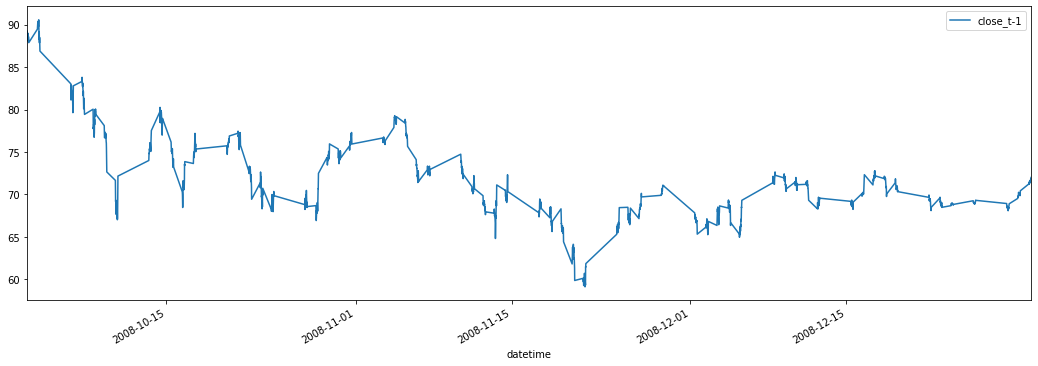

Number of instances: 1442
Class distribution: 
0 in 0.5180305131761442%
1 in 0.48196948682385576%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 10:00:00  90.9141  90.9298  89.9675  90.4723  33682179.0
1  2008-10-01 10:30:00  90.4802  90.5039  89.9281  90.1963  20794896.0
2  2008-10-01 11:00:00  90.1884  90.6222  89.8808  90.5433  18969400.2
3  2008-10-01 11:30:00  90.5433  90.8115  90.4092  90.6538  17973853.0
4  2008-10-01 12:00:00  90.6538  91.2138  90.4881  91.0797  21949996.0
             datetime     open     high      low    close      volume  \
0 2008-10-03 14:30:00  87.8536  88.5951  87.2147  88.5004  58044535.0   
1 2008-10-03 15:00:00  88.5004  88.7449  87.3961  87.6485  32088523.0   
2 2008-10-03 15:30:00  87.6485  88.1455  86.5127  86.7414  54772387.0   
3 2008-10-06 10:30:00  82.6240  82.6635  80.8730  82.3006  64711260.0   
4 2008-10-06 11:00:00  82.3085  83.3103  82.1192  82.8607  56128950.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

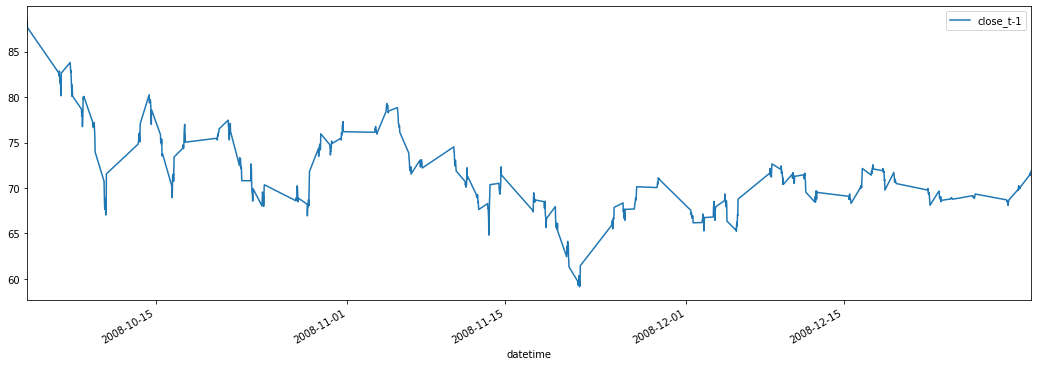

Number of instances: 673
Class distribution: 
0 in 0.5230312035661219%
1 in 0.4769687964338782%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 10:00:00  90.9141  90.9298  89.9281  90.1963  54477075.0
1  2008-10-01 11:00:00  90.1884  90.8115  89.8808  90.6538  36943253.2
2  2008-10-01 12:00:00  90.6538  92.0026  90.4881  91.6634  59127956.0
3  2008-10-01 13:00:00  91.6634  91.7975  90.5039  91.1744  82107301.0
4  2008-10-01 14:00:00  91.1665  92.0420  90.8352  91.4977  58405650.0
             datetime     open     high      low    close       volume  \
0 2008-10-08 13:00:00  77.2762  80.1710  77.2525  79.9974  110568322.0   
1 2008-10-08 14:00:00  79.9974  80.5969  79.0982  79.8318   90382667.0   
2 2008-10-08 15:00:00  79.8239  80.5890  77.4181  77.6153  135614800.0   
3 2008-10-09 11:00:00  76.6767  77.9308  75.6671  76.8739   92044317.0   
4 2008-10-09 12:00:00  76.8660  77.4655  76.2665  76.6294   34606429.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sa

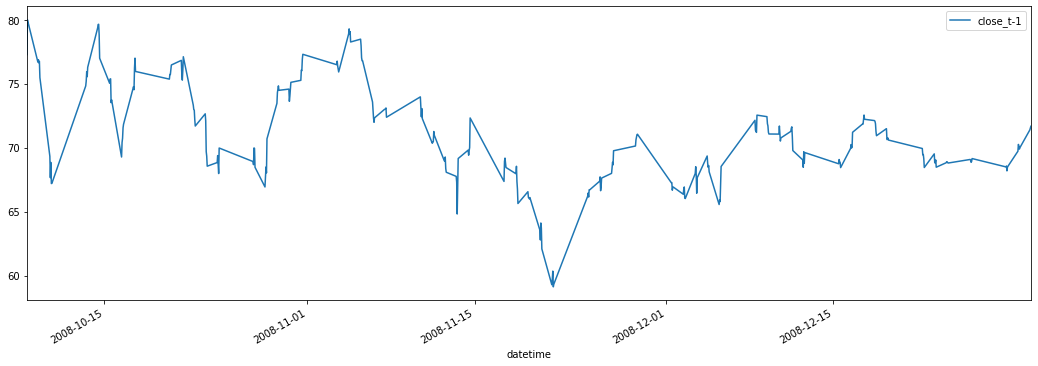

Number of instances: 292
Class distribution: 
0 in 0.5136986301369864%
1 in 0.4863013698630137%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-04-01 09:31:00  62.9242  62.9643  62.8041  62.8121  1703640.0
1  2009-04-01 09:32:00  62.8121  62.8521  62.7720  62.8361  1328410.0
2  2009-04-01 09:33:00  62.8361  62.8922  62.7961  62.8281  1351580.0
3  2009-04-01 09:34:00  62.8281  62.8441  62.7400  62.7480  1830900.0
4  2009-04-01 09:35:00  62.7400  62.9002  62.7320  62.8842  1378030.0
             datetime     open     high      low    close     volume  \
0 2009-04-01 10:05:00  63.4608  63.5008  63.3567  63.5008  1834260.0   
1 2009-04-01 10:06:00  63.5089  63.5169  63.3647  63.3807  1077720.0   
2 2009-04-01 10:07:00  63.3807  63.5329  63.3487  63.4768  1193020.0   
3 2009-04-01 10:08:00  63.4848  63.5569  63.4768  63.4928  1558590.0   
4 2009-04-01 10:09:00  63.4928  63.5169  63.4528  63.5008  1045390.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

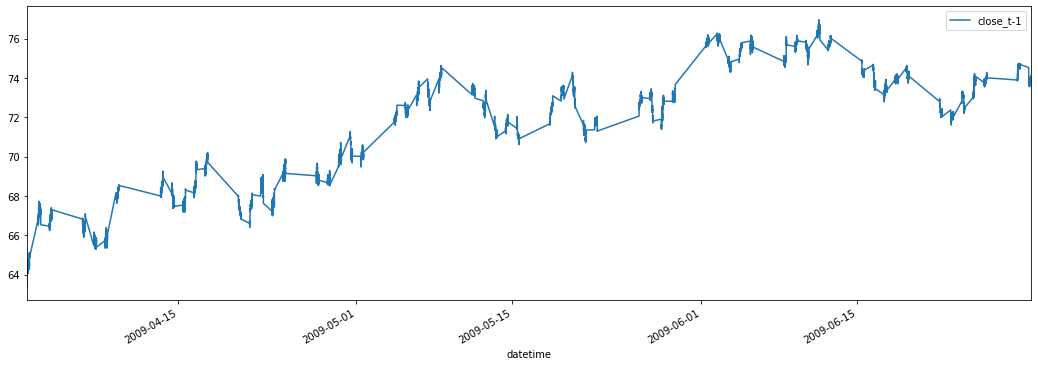

Number of instances: 22302
Class distribution: 
0 in 0.5413864227423549%
1 in 0.45861357725764507%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:35:00  62.7400  63.0123  62.7320  62.9482  10291160.0
1  2009-04-01 09:40:00  62.9482  63.0524  62.8922  62.9322   5940562.0
2  2009-04-01 09:45:00  62.9322  63.0443  62.8441  62.8601   4156901.0
3  2009-04-01 09:50:00  62.8601  62.9482  62.8441  62.9162   3976654.0
4  2009-04-01 09:55:00  62.9162  63.1885  62.8842  63.1885   5225154.0
             datetime     open     high      low    close     volume  \
0 2009-04-01 12:20:00  64.6621  64.6861  64.5820  64.6701  3775163.0   
1 2009-04-01 12:25:00  64.6621  64.6701  64.5340  64.5980  2092137.0   
2 2009-04-01 12:30:00  64.5980  64.6861  64.5740  64.5900  2357284.0   
3 2009-04-01 12:35:00  64.5820  64.5900  64.4379  64.5099  2528856.0   
4 2009-04-01 12:40:00  64.5019  64.5500  64.4699  64.4859  1021232.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    pp

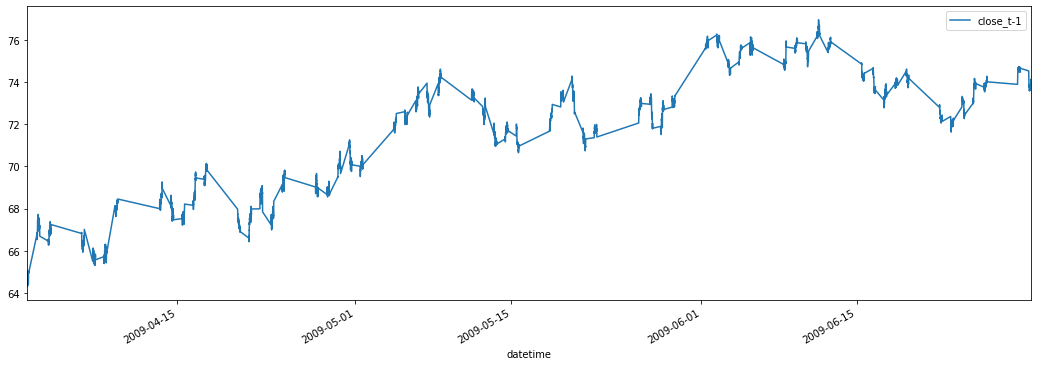

Number of instances: 4445
Class distribution: 
0 in 0.5111361079865017%
1 in 0.48886389201349834%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:40:00  62.9482  63.0524  62.8441  62.8601  10097463.0
1  2009-04-01 09:50:00  62.8601  63.1885  62.8441  63.1885   9201808.0
2  2009-04-01 10:00:00  63.1805  63.5569  63.1805  63.5008  18302730.0
3  2009-04-01 10:10:00  63.5089  63.9013  63.4928  63.8853  18080494.0
4  2009-04-01 10:20:00  63.8853  64.0935  63.8132  63.9013  18363720.0
             datetime     open     high      low    close      volume  \
0 2009-04-01 15:10:00  64.5179  64.5660  64.2136  64.4779  16329436.0   
1 2009-04-01 15:20:00  64.4939  64.6701  64.3898  64.5900   9487192.0   
2 2009-04-01 15:30:00  64.5980  65.0946  64.4298  65.0305  15594819.0   
3 2009-04-01 15:40:00  65.0305  65.1666  64.9985  65.0385  15257300.0   
4 2009-04-01 15:50:00  65.0305  65.2067  64.8143  64.8943  23581310.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

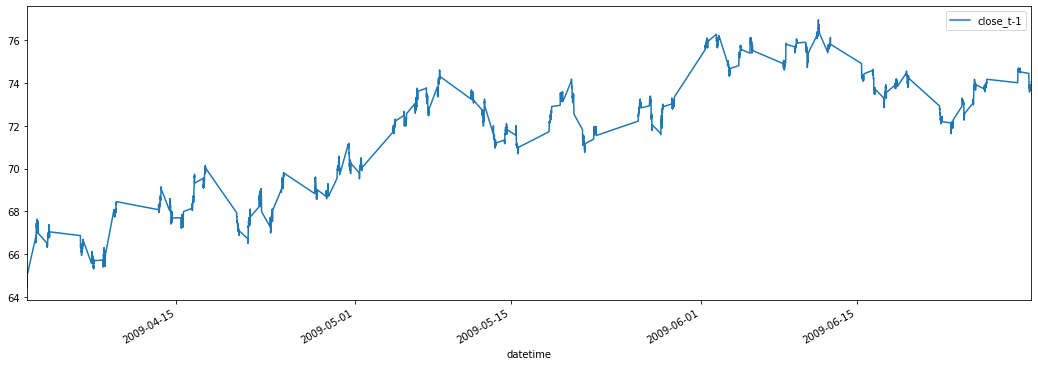

Number of instances: 2174
Class distribution: 
0 in 0.5022999080036799%
1 in 0.49770009199632015%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:45:00  62.9322  63.1885  62.8441  63.1885  13358709.0
1  2009-04-01 10:00:00  63.1805  63.6690  63.1805  63.6530  27023954.0
2  2009-04-01 10:15:00  63.6610  64.0935  63.5729  63.9013  27722990.0
3  2009-04-01 10:30:00  63.9013  64.3418  63.7491  64.2216  22349578.0
4  2009-04-01 10:45:00  64.2216  64.3978  64.1335  64.1816  25935541.0
             datetime     open     high      low    close      volume  \
0 2009-04-02 11:45:00  67.1848  67.3370  67.1368  67.2970  11640337.0   
1 2009-04-02 12:00:00  67.2970  67.3931  67.1688  67.3610   8691697.0   
2 2009-04-02 12:15:00  67.3690  67.7374  67.3690  67.6333  21319565.0   
3 2009-04-02 12:30:00  67.6333  67.7615  67.5853  67.6654  10603529.0   
4 2009-04-02 12:45:00  67.6573  67.6974  67.4091  67.4091  14465048.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

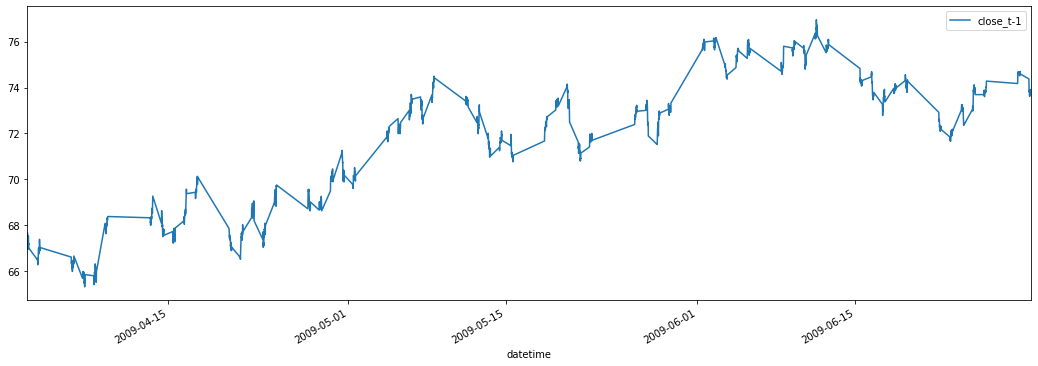

Number of instances: 1419
Class distribution: 
0 in 0.49119097956307256%
1 in 0.5088090204369274%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 10:00:00  63.1805  64.0935  63.1805  63.9013  54746944.0
1  2009-04-01 10:30:00  63.9013  64.3978  63.7491  64.1816  48285119.0
2  2009-04-01 11:00:00  64.1736  64.3498  63.9814  64.3017  28103720.0
3  2009-04-01 11:30:00  64.3017  64.5500  64.2296  64.4779  20026871.0
4  2009-04-01 12:00:00  64.4779  64.8063  64.4699  64.5980  23045517.0
             datetime     open     high      low    close      volume  \
0 2009-04-03 14:30:00  67.3770  67.4331  67.0887  67.2729  21140263.0   
1 2009-04-03 15:00:00  67.2649  67.2970  66.8325  66.8885  25640741.0   
2 2009-04-03 15:30:00  66.8965  67.4972  66.7283  67.4731  47516478.0   
3 2009-04-06 10:30:00  66.3359  66.5521  66.2718  66.4480  18305067.0   
4 2009-04-06 11:00:00  66.4480  66.4560  66.1517  66.3680  16053655.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

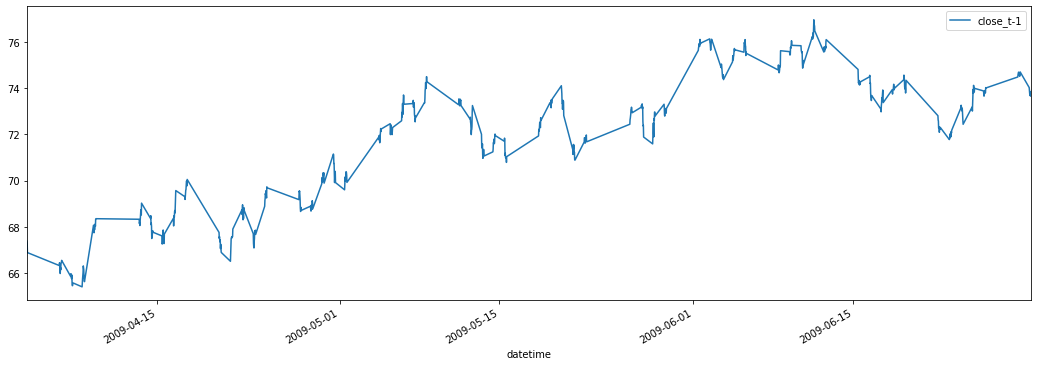

Number of instances: 662
Class distribution: 
0 in 0.4954682779456193%
1 in 0.5045317220543807%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close       volume
0  2009-04-01 10:00:00  63.1805  64.3978  63.1805  64.1816  103032063.0
1  2009-04-01 11:00:00  64.1736  64.5500  63.9814  64.4779   48130591.0
2  2009-04-01 12:00:00  64.4779  64.8063  64.3017  64.3658   35726423.0
3  2009-04-01 13:00:00  64.3658  64.8783  64.2136  64.8383   37909071.0
4  2009-04-01 14:00:00  64.8383  65.1026  64.7262  64.8863   46676520.0
             datetime     open     high      low    close      volume  \
0 2009-04-08 13:00:00  66.3199  66.3359  66.0796  66.1517  21076834.4   
1 2009-04-08 14:00:00  66.1517  66.1757  65.5431  65.6792  41711849.0   
2 2009-04-08 15:00:00  65.6712  66.1597  65.3508  66.1037  49713721.0   
3 2009-04-09 11:00:00  67.9136  68.0257  67.6173  67.8496  31722344.5   
4 2009-04-09 12:00:00  67.8496  67.9937  67.7054  67.8896  28668111.1   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sa

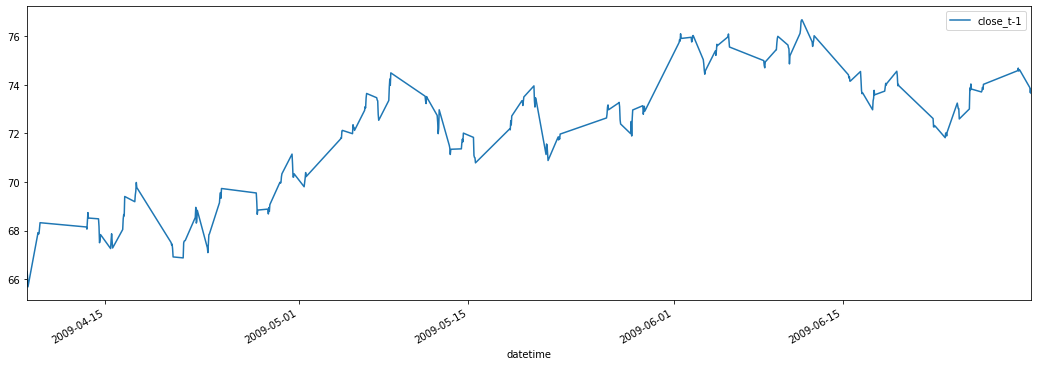

Number of instances: 287
Class distribution: 
0 in 0.4529616724738676%
1 in 0.5470383275261324%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-10-01 09:31:00  85.1632  85.2037  85.0904  85.0985  1099090.0
1  2009-10-01 09:32:00  85.0985  85.1470  85.0338  85.0661  1324020.0
2  2009-10-01 09:33:00  85.0661  85.0985  85.0338  85.0580   639264.0
3  2009-10-01 09:34:00  85.0661  85.1228  85.0257  85.0580  1541750.0
4  2009-10-01 09:35:00  85.0580  85.0661  84.7424  84.7748  3616010.0
             datetime     open     high      low    close     volume  \
0 2009-10-01 10:05:00  84.5725  84.6372  84.4026  84.4268  2207180.0   
1 2009-10-01 10:06:00  84.4187  84.4592  84.3216  84.4026  3072900.0   
2 2009-10-01 10:07:00  84.4026  84.4430  84.2812  84.3702  1644280.0   
3 2009-10-01 10:08:00  84.3702  84.4754  84.2812  84.4511  2309230.0   
4 2009-10-01 10:09:00  84.4592  84.4592  84.3378  84.3459  2092700.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

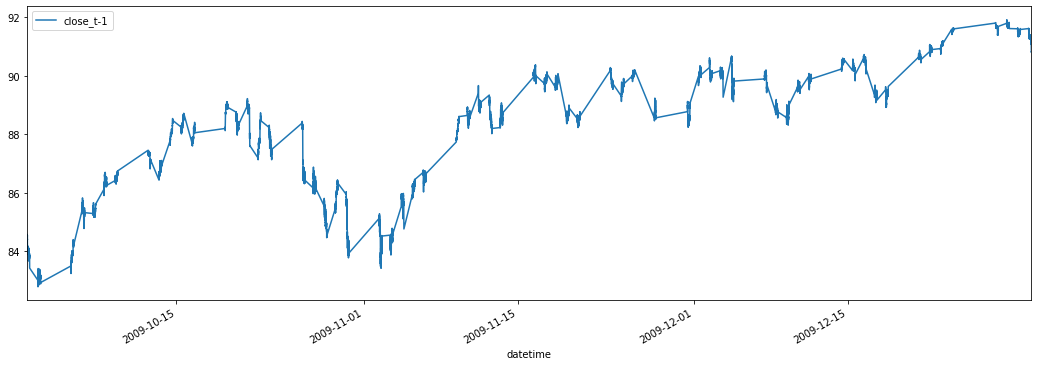

Number of instances: 22656
Class distribution: 
0 in 0.5801995056497176%
1 in 0.4198004943502825%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-10-01 09:35:00  85.0580  85.0661  84.7424  84.9124  7311712.0
1  2009-10-01 09:40:00  84.9124  84.9690  84.8315  84.9366  4910944.0
2  2009-10-01 09:45:00  84.9286  85.0499  84.8638  85.0338  4898785.0
3  2009-10-01 09:50:00  85.0418  85.0418  84.8072  84.8638  5507797.0
4  2009-10-01 09:55:00  84.8638  84.9609  84.8072  84.9528  4017781.0
             datetime     open     high      low    close     volume  \
0 2009-10-01 12:20:00  84.0708  84.1841  84.0627  84.1517  1671058.0   
1 2009-10-01 12:25:00  84.1517  84.1598  84.0870  84.1355  1562317.8   
2 2009-10-01 12:30:00  84.1274  84.1922  84.1193  84.1679  1219541.0   
3 2009-10-01 12:35:00  84.1598  84.1841  84.0789  84.0789   865999.1   
4 2009-10-01 12:40:00  84.0870  84.1112  84.0222  84.0384   867590.8   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

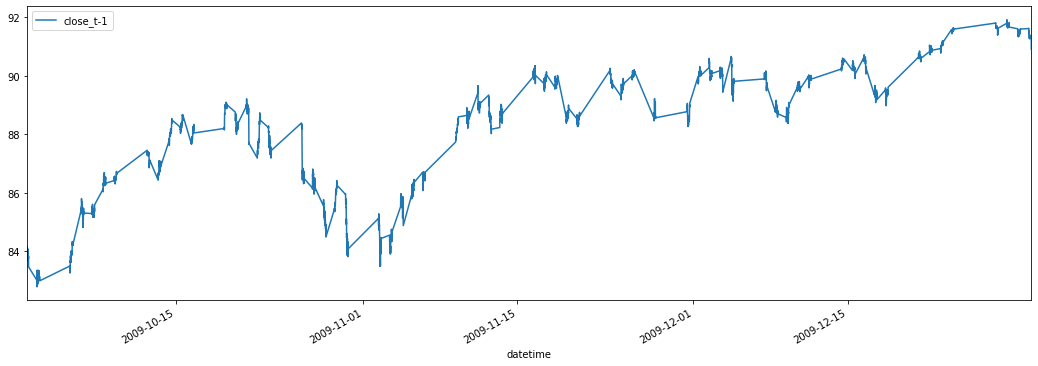

Number of instances: 4516
Class distribution: 
0 in 0.5338795394154119%
1 in 0.4661204605845881%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 09:40:00  84.9124  85.0499  84.8315  85.0338   9809729.0
1  2009-10-01 09:50:00  85.0418  85.0418  84.8072  84.9528   9525578.0
2  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.3459  31893620.0
3  2009-10-01 10:10:00  84.3459  84.4997  84.2812  84.4430  10193724.0
4  2009-10-01 10:20:00  84.4430  84.5482  84.3621  84.4026   6427022.0
             datetime     open     high      low    close      volume  \
0 2009-10-01 15:10:00  83.7633  83.8927  83.7309  83.8604   3815998.0   
1 2009-10-01 15:20:00  83.8604  83.8766  83.6985  83.7471   8477351.0   
2 2009-10-01 15:30:00  83.7390  83.9008  83.7228  83.8280   6694142.0   
3 2009-10-01 15:40:00  83.8199  83.9656  83.7471  83.8037   6930544.0   
4 2009-10-01 15:50:00  83.8037  83.8118  83.3101  83.3425  26594250.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

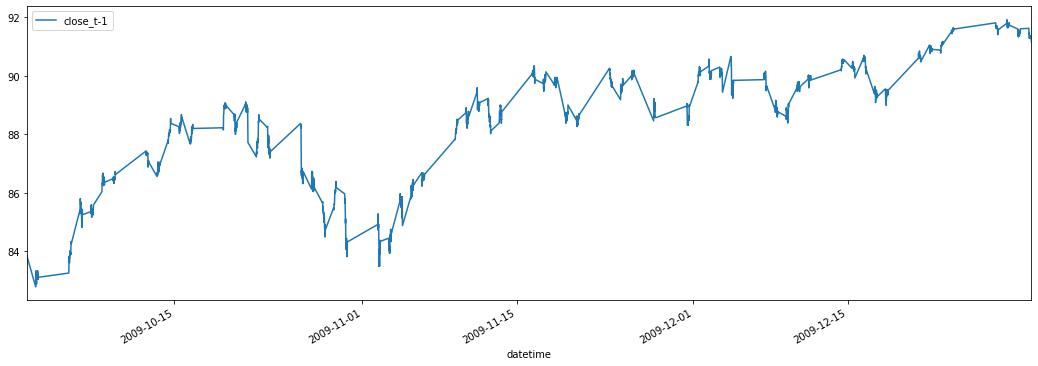

Number of instances: 2209
Class distribution: 
0 in 0.5151652331371661%
1 in 0.4848347668628339%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 09:45:00  84.9286  85.0499  84.8072  84.9528  14424363.0
1  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4511  37215495.0
2  2009-10-01 10:15:00  84.4430  84.5482  84.2974  84.4026  11298871.0
3  2009-10-01 10:30:00  84.4026  84.6130  84.3055  84.5320   7983153.0
4  2009-10-01 10:45:00  84.5320  84.5644  84.3540  84.4268   7035694.7
             datetime     open     high      low    close     volume  \
0 2009-10-02 11:45:00  82.9055  83.0269  82.8326  82.8893  5507598.0   
1 2009-10-02 12:00:00  82.8812  83.1563  82.8731  83.0107  5243705.0   
2 2009-10-02 12:15:00  83.0107  83.2130  83.0107  83.1806  3983801.0   
3 2009-10-02 12:30:00  83.1887  83.2858  83.0673  83.0997  5722013.8   
4 2009-10-02 12:45:00  83.0916  83.2130  83.0107  83.1725  4219989.5   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    p

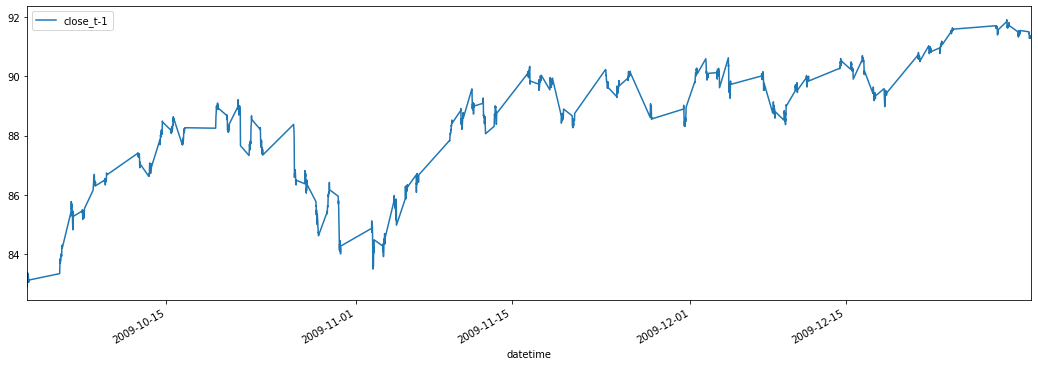

Number of instances: 1442
Class distribution: 
0 in 0.507628294036061%
1 in 0.492371705963939%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4026  48514366.0
1  2009-10-01 10:30:00  84.4026  84.6130  84.3055  84.4268  15018847.7
2  2009-10-01 11:00:00  84.4349  84.4430  83.8685  83.9413  26616278.0
3  2009-10-01 11:30:00  83.9413  84.0627  83.8604  84.0141  14046438.0
4  2009-10-01 12:00:00  84.0222  84.1841  83.8766  84.1355   9900379.8
             datetime     open     high      low    close      volume  \
0 2009-10-05 14:30:00  83.9494  84.4187  83.9494  84.2893  16012790.2   
1 2009-10-05 15:00:00  84.2893  84.3702  84.2326  84.2893  11291548.0   
2 2009-10-05 15:30:00  84.2893  84.3216  84.1274  84.1841  20860529.0   
3 2009-10-06 10:30:00  85.2846  85.5759  85.2684  85.5355  12296154.5   
4 2009-10-06 11:00:00  85.5274  85.8673  85.4869  85.6973  16922767.6   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

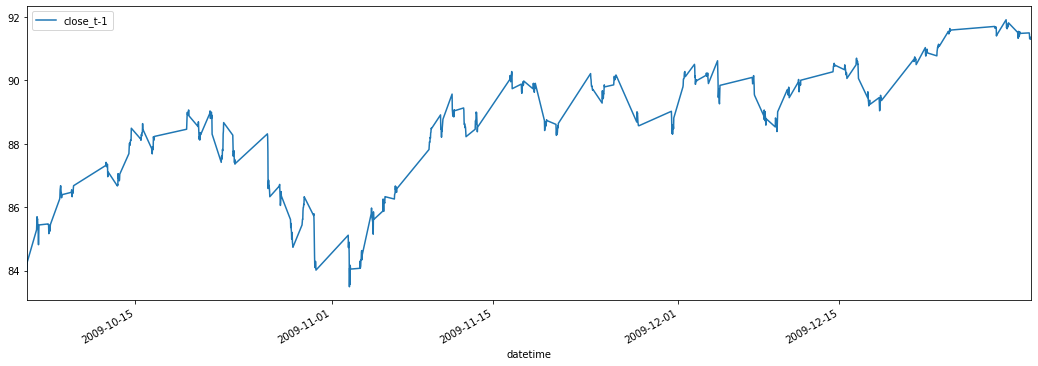

Number of instances: 673
Class distribution: 
0 in 0.5185735512630015%
1 in 0.4814264487369985%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4268  63533213.7
1  2009-10-01 11:00:00  84.4349  84.4430  83.8604  84.0141  40662716.0
2  2009-10-01 12:00:00  84.0222  84.1922  83.8766  84.0384  16832334.2
3  2009-10-01 13:00:00  84.0384  84.0546  83.6419  83.8927  30415849.6
4  2009-10-01 14:00:00  83.8847  84.1193  83.7794  83.8927  24283978.2
             datetime     open     high      low    close      volume  \
0 2009-10-08 13:00:00  86.6360  86.6441  86.2314  86.4580  23587932.6   
1 2009-10-08 14:00:00  86.4661  86.4823  86.1829  86.3609  17968975.4   
2 2009-10-08 15:00:00  86.3609  86.5713  86.1910  86.2719  42062571.0   
3 2009-10-09 11:00:00  86.4985  86.6117  86.4094  86.4337  22190212.3   
4 2009-10-09 12:00:00  86.4337  86.5066  86.2881  86.4580  13108695.8   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10  

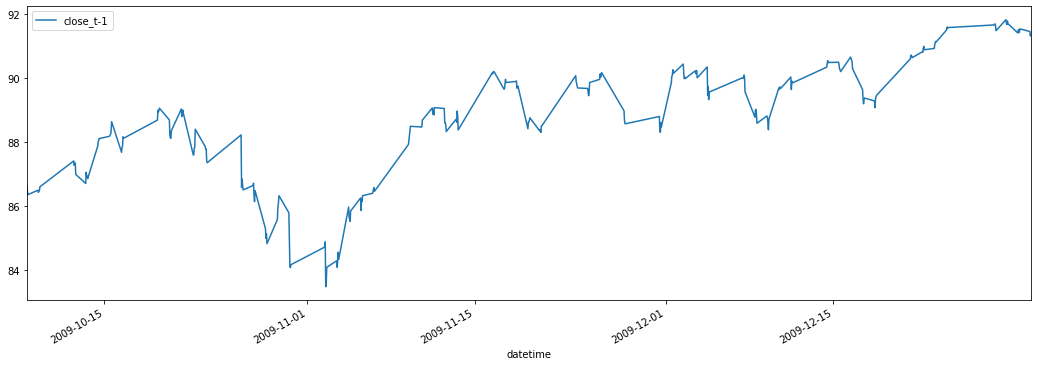

Number of instances: 292
Class distribution: 
0 in 0.4691780821917808%
1 in 0.5308219178082192%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:31:00  91.4633  91.5202  91.4470  91.4877  1575630.0
1  2010-01-04 09:32:00  91.4877  91.4958  91.4552  91.4877   910577.0
2  2010-01-04 09:33:00  91.4958  91.4958  91.4552  91.4552  1227660.0
3  2010-01-04 09:34:00  91.4552  91.4714  91.4470  91.4714   609509.0
4  2010-01-04 09:35:00  91.4633  91.6016  91.4633  91.5935  1925110.0
             datetime     open     high      low    close    volume  \
0 2010-01-04 10:05:00  91.7318  91.8294  91.7236  91.8213  858800.0   
1 2010-01-04 10:06:00  91.8294  91.8538  91.8131  91.8538  370892.0   
2 2010-01-04 10:07:00  91.8457  91.8782  91.8294  91.8294  385176.0   
3 2010-01-04 10:08:00  91.8294  91.8701  91.8131  91.8131  387669.0   
4 2010-01-04 10:09:00  91.8213  91.8782  91.8213  91.8782  284207.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    91.7318

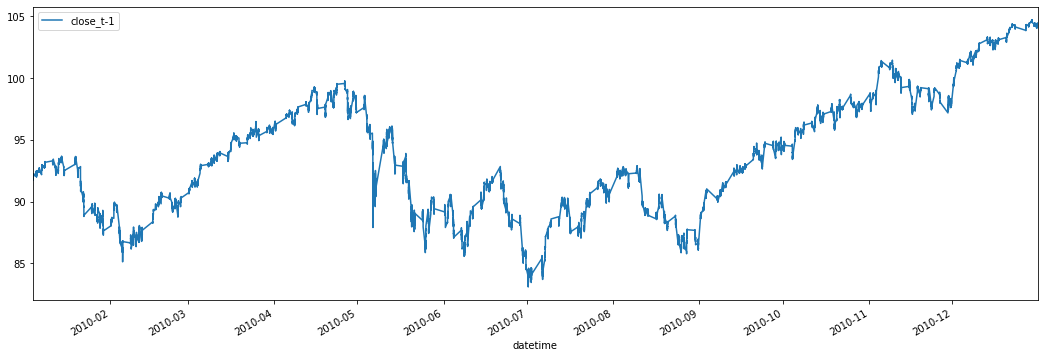

Number of instances: 89208
Class distribution: 
0 in 0.5606223657071114%
1 in 0.4393776342928885%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:35:00  91.4633  91.6830  91.4633  91.6423  5384792.0
1  2010-01-04 09:40:00  91.6504  91.7318  91.6423  91.7155  3536730.0
2  2010-01-04 09:45:00  91.7155  91.8864  91.6830  91.8864  5355208.0
3  2010-01-04 09:50:00  91.8782  91.8864  91.7480  91.7887  3617526.0
4  2010-01-04 09:55:00  91.7887  91.8213  91.7318  91.7969  2321085.0
             datetime     open     high      low    close     volume  \
0 2010-01-04 12:20:00  92.1467  92.1792  92.1386  92.1630   779264.6   
1 2010-01-04 12:25:00  92.1711  92.1874  92.1548  92.1792   604726.5   
2 2010-01-04 12:30:00  92.1792  92.1874  92.1711  92.1874   309085.8   
3 2010-01-04 12:35:00  92.1874  92.2199  92.1711  92.1792  1012131.0   
4 2010-01-04 12:40:00  92.1874  92.2118  92.1548  92.1955   643233.1   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    9

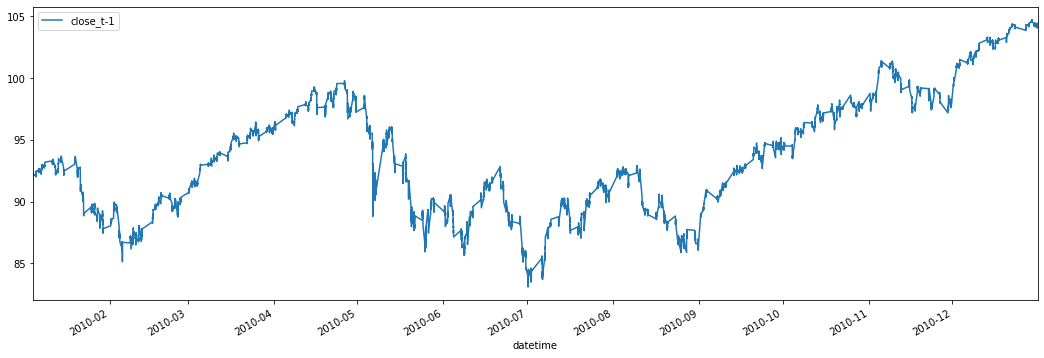

Number of instances: 17864
Class distribution: 
0 in 0.5184729064039408%
1 in 0.4815270935960591%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:40:00  91.6504  91.8864  91.6423  91.8864  8891938.0
1  2010-01-04 09:50:00  91.8782  91.8864  91.7318  91.7969  5938611.0
2  2010-01-04 10:00:00  91.8050  91.9026  91.7155  91.8782  7878538.0
3  2010-01-04 10:10:00  91.8701  91.8782  91.7887  91.8213  3096548.0
4  2010-01-04 10:20:00  91.8213  92.0165  91.8050  92.0084  4446739.0
             datetime     open     high      low    close     volume  \
0 2010-01-04 15:10:00  92.2199  92.2281  92.1630  92.1792  1775145.9   
1 2010-01-04 15:20:00  92.1792  92.1874  92.1304  92.1467  1719545.3   
2 2010-01-04 15:30:00  92.1386  92.1711  92.0897  92.0897  3238517.9   
3 2010-01-04 15:40:00  92.0979  92.1955  92.0816  92.1955  4617691.0   
4 2010-01-04 15:50:00  92.1955  92.1955  92.1142  92.1955  9876571.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    

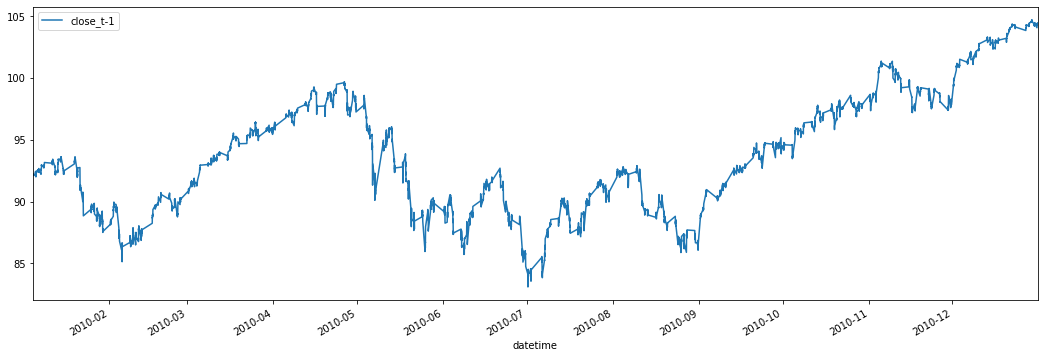

Number of instances: 8789
Class distribution: 
0 in 0.5046080327682331%
1 in 0.495391967231767%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 09:45:00  91.7155  91.8864  91.6830  91.7969  11293819.0
1  2010-01-04 10:00:00  91.8050  91.9026  91.7155  91.8538   9559761.0
2  2010-01-04 10:15:00  91.8619  92.0165  91.8050  92.0084   5862064.0
3  2010-01-04 10:30:00  92.0003  92.0816  91.9840  92.0816   6069863.7
4  2010-01-04 10:45:00  92.0816  92.1304  92.0084  92.0165   4322844.4
             datetime     open     high      low    close     volume  \
0 2010-01-05 11:45:00  92.1955  92.2362  92.1955  92.2199  3501877.5   
1 2010-01-05 12:00:00  92.2281  92.3420  92.2199  92.3420  2534880.7   
2 2010-01-05 12:15:00  92.3338  92.3420  92.2606  92.2606  2698641.4   
3 2010-01-05 12:30:00  92.2687  92.2769  92.2362  92.2525  2026552.7   
4 2010-01-05 12:45:00  92.2525  92.2606  92.1548  92.2199  2051990.5   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \

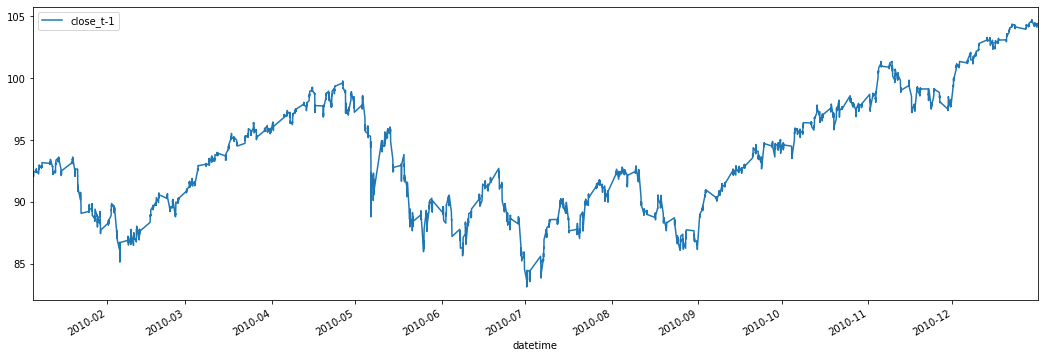

Number of instances: 5766
Class distribution: 
0 in 0.49791883454734653%
1 in 0.5020811654526535%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 10:00:00  91.8050  92.0165  91.7155  92.0084  15421825.0
1  2010-01-04 10:30:00  92.0003  92.1304  91.9840  92.0165  10392708.1
2  2010-01-04 11:00:00  92.0165  92.1711  92.0165  92.1223   6983607.0
3  2010-01-04 11:30:00  92.1142  92.2525  92.0979  92.1630   7472627.2
4  2010-01-04 12:00:00  92.1630  92.1874  92.1386  92.1792   4423029.0
             datetime     open     high      low    close      volume  \
0 2010-01-06 14:30:00  92.5860  92.7406  92.5779  92.6674   8677951.7   
1 2010-01-06 15:00:00  92.6674  92.6918  92.5291  92.6023   7703751.8   
2 2010-01-06 15:30:00  92.5942  92.6593  92.4314  92.5372  16328217.1   
3 2010-01-07 10:30:00  92.3176  92.6837  92.2769  92.5942  16685491.7   
4 2010-01-07 11:00:00  92.5942  92.6430  92.5616  92.5616   5953549.9   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo

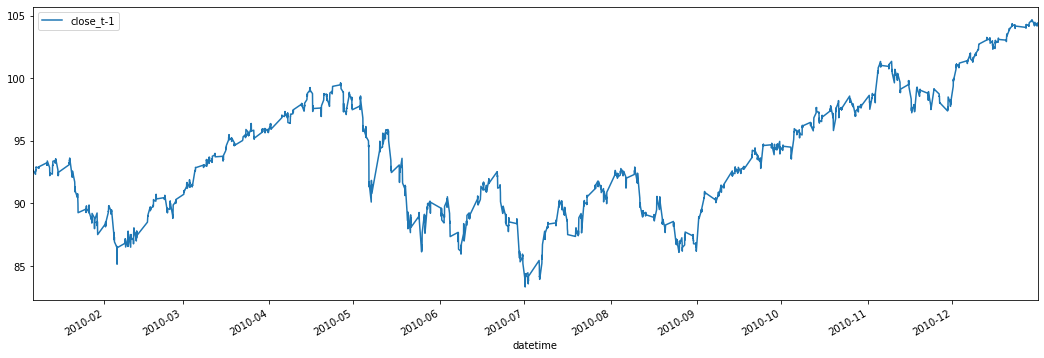

Number of instances: 2741
Class distribution: 
0 in 0.4848595403137541%
1 in 0.5151404596862459%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 10:00:00  91.8050  92.1304  91.7155  92.0165  25814533.1
1  2010-01-04 11:00:00  92.0165  92.2525  92.0165  92.1630  14456234.2
2  2010-01-04 12:00:00  92.1630  92.2281  92.1386  92.1792   8212385.3
3  2010-01-04 13:00:00  92.2037  92.2443  92.0735  92.0897   8767227.0
4  2010-01-04 14:00:00  92.0979  92.2443  92.0735  92.1630   8978854.5
             datetime     open     high      low    close      volume  \
0 2010-01-11 13:00:00  93.0416  93.1881  92.9928  93.1637   8874288.2   
1 2010-01-11 14:00:00  93.1637  93.2288  93.0823  93.1881  10974788.0   
2 2010-01-11 15:00:00  93.1718  93.4484  93.1718  93.3427  26081180.0   
3 2010-01-12 11:00:00  92.8464  92.8871  92.6430  92.6674  18842589.7   
4 2010-01-12 12:00:00  92.6593  92.6674  92.1711  92.2118  29525661.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10

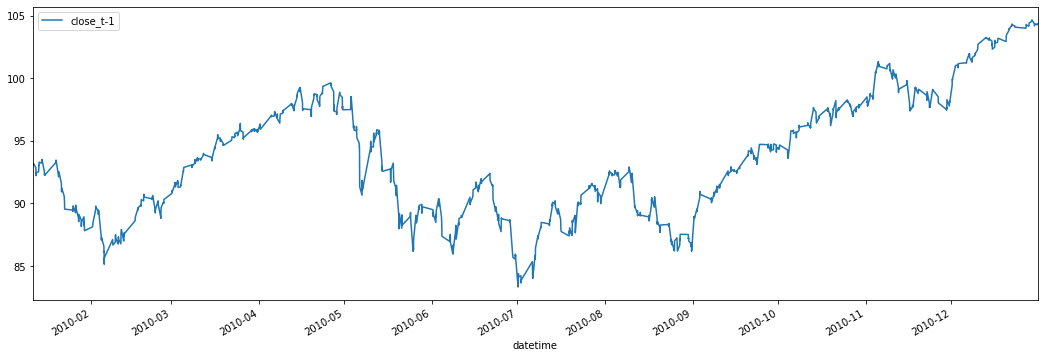

Number of instances: 1232
Class distribution: 
0 in 0.45616883116883117%
1 in 0.5438311688311688%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:31:00  105.122  105.180  105.097  105.180  1039570.0
1  2011-01-03 09:32:00  105.180  105.197  105.130  105.147   727576.0
2  2011-01-03 09:33:00  105.147  105.188  105.130  105.138   554285.0
3  2011-01-03 09:34:00  105.138  105.155  105.130  105.155   751152.0
4  2011-01-03 09:35:00  105.147  105.172  105.138  105.147   674601.0
             datetime     open     high      low    close    volume  \
0 2011-01-03 10:05:00  105.387  105.412  105.387  105.396  390012.0   
1 2011-01-03 10:06:00  105.396  105.412  105.379  105.387  366656.0   
2 2011-01-03 10:07:00  105.387  105.429  105.371  105.396  691340.0   
3 2011-01-03 10:08:00  105.387  105.396  105.371  105.371  274239.0   
4 2011-01-03 10:09:00  105.379  105.412  105.379  105.412  198760.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    ppo_10  \
0   

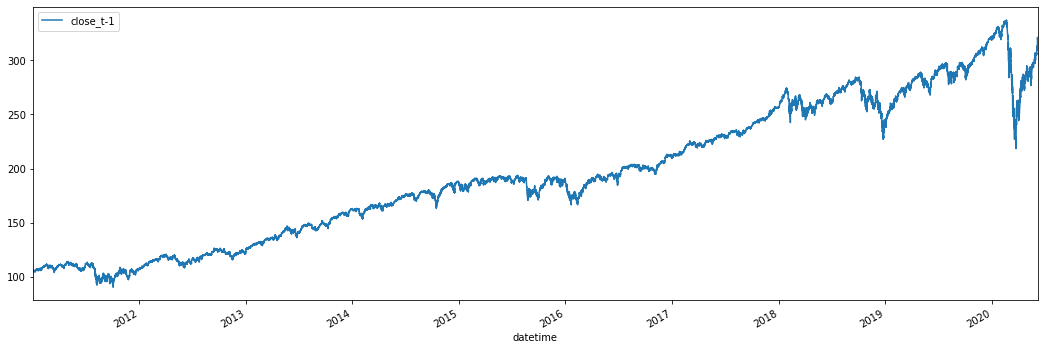

Number of instances: 839688
Class distribution: 
0 in 0.535205933632492%
1 in 0.4647940663675079%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:35:00  105.147  105.197  105.089  105.163  2843639.0
1  2011-01-03 09:40:00  105.172  105.338  105.147  105.313  4564929.0
2  2011-01-03 09:45:00  105.313  105.437  105.296  105.412  4152903.0
3  2011-01-03 09:50:00  105.412  105.421  105.271  105.404  2593241.0
4  2011-01-03 09:55:00  105.404  105.479  105.387  105.462  1841539.0
             datetime     open     high      low    close     volume  \
0 2011-01-03 12:20:00  105.794  105.810  105.785  105.810   638693.1   
1 2011-01-03 12:25:00  105.810  105.810  105.744  105.752  1092241.2   
2 2011-01-03 12:30:00  105.752  105.777  105.711  105.769   561775.8   
3 2011-01-03 12:35:00  105.761  105.769  105.744  105.744   551875.6   
4 2011-01-03 12:40:00  105.752  105.769  105.744  105.769   473521.9   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    ppo_10  

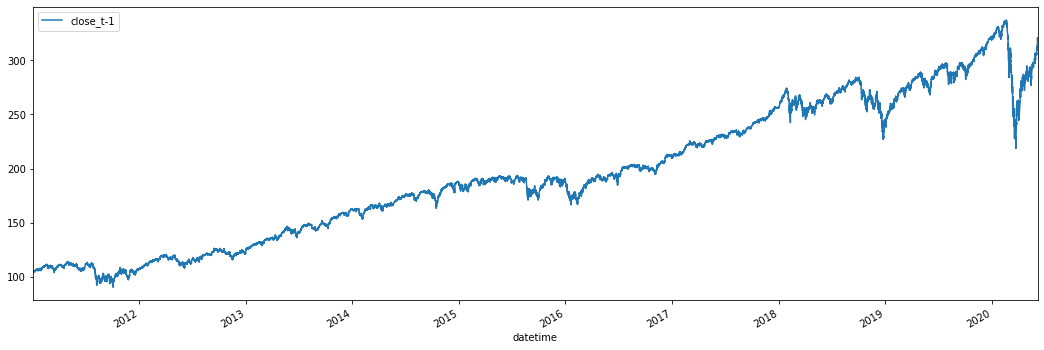

Number of instances: 168384
Class distribution: 
0 in 0.5063129513492969%
1 in 0.4936870486507032%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:40:00  105.172  105.437  105.147  105.412  8717832.0
1  2011-01-03 09:50:00  105.412  105.479  105.271  105.462  4434780.0
2  2011-01-03 10:00:00  105.470  105.487  105.329  105.412  5506092.0
3  2011-01-03 10:10:00  105.404  105.578  105.404  105.578  5355568.0
4  2011-01-03 10:20:00  105.578  105.595  105.504  105.520  2735913.6
             datetime     open     high      low    close      volume  \
0 2011-01-03 15:10:00  105.495  105.520  105.387  105.445   5947212.0   
1 2011-01-03 15:20:00  105.445  105.445  105.371  105.412   4161013.0   
2 2011-01-03 15:30:00  105.412  105.528  105.404  105.445   3818067.1   
3 2011-01-03 15:40:00  105.445  105.528  105.404  105.512   6668558.0   
4 2011-01-03 15:50:00  105.512  105.603  105.387  105.396  15872377.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    p

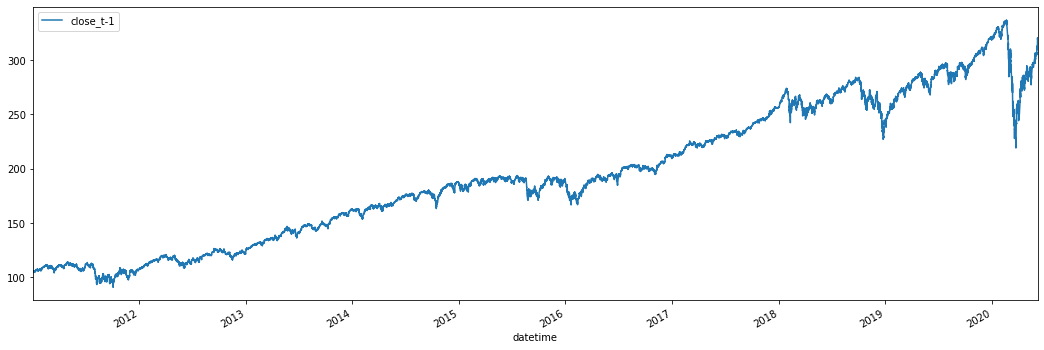

Number of instances: 82989
Class distribution: 
0 in 0.4956560508019135%
1 in 0.5043439491980864%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:45:00  105.313  105.479  105.271  105.462  8587683.0
1  2011-01-03 10:00:00  105.470  105.487  105.329  105.437  7018108.0
2  2011-01-03 10:15:00  105.437  105.595  105.437  105.520  6579465.6
3  2011-01-03 10:30:00  105.520  105.595  105.470  105.570  4145338.0
4  2011-01-03 10:45:00  105.562  105.711  105.396  105.686  4506502.0
             datetime     open     high      low    close     volume  \
0 2011-01-04 11:45:00  105.155  105.172  104.997  104.997  3346220.4   
1 2011-01-04 12:00:00  105.006  105.039  104.890  104.964  5050975.6   
2 2011-01-04 12:15:00  104.964  104.973  104.749  104.798  4654192.6   
3 2011-01-04 12:30:00  104.790  104.815  104.690  104.707  4104832.0   
4 2011-01-04 12:45:00  104.707  104.790  104.682  104.790  3818314.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

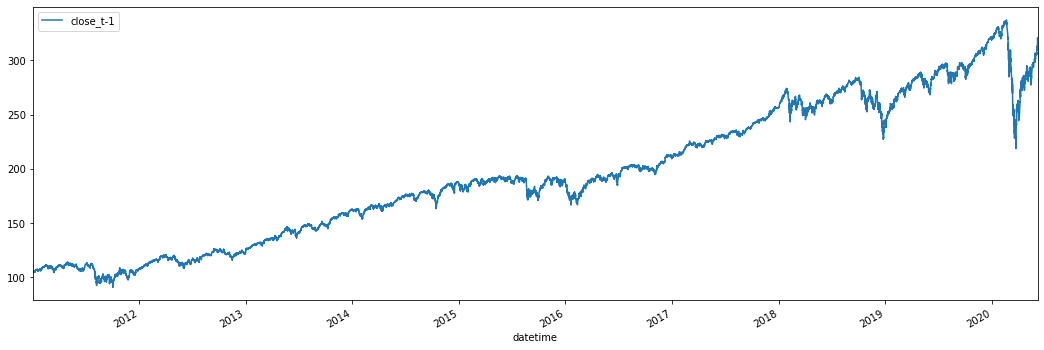

Number of instances: 54526
Class distribution: 
0 in 0.4904449253567106%
1 in 0.5095550746432894%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2011-01-03 10:00:00  105.470  105.595  105.329  105.520  13597573.6
1  2011-01-03 10:30:00  105.520  105.711  105.396  105.686   8651840.0
2  2011-01-03 11:00:00  105.686  105.736  105.620  105.719   8542335.3
3  2011-01-03 11:30:00  105.711  105.852  105.661  105.752   8024646.6
4  2011-01-03 12:00:00  105.744  105.810  105.736  105.752   4823074.8
             datetime     open     high      low    close      volume  \
0 2011-01-05 14:30:00  105.769  105.835  105.702  105.835   6109368.0   
1 2011-01-05 15:00:00  105.835  105.960  105.769  105.827   8988097.9   
2 2011-01-05 15:30:00  105.827  105.910  105.769  105.877  14091098.0   
3 2011-01-06 10:30:00  105.926  106.043  105.702  105.769  12779084.0   
4 2011-01-06 11:00:00  105.769  105.785  105.362  105.603  14766294.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_1

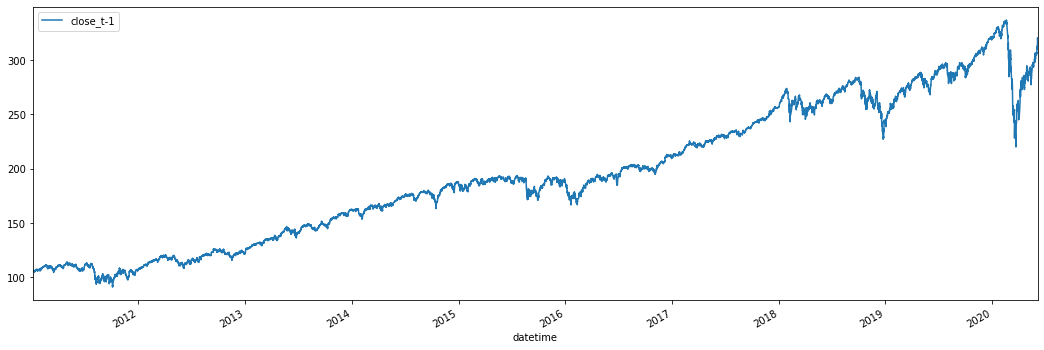

Number of instances: 26061
Class distribution: 
0 in 0.4793369402555543%
1 in 0.5206630597444457%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2011-01-03 10:00:00  105.470  105.711  105.329  105.686  22249413.6
1  2011-01-03 11:00:00  105.686  105.852  105.620  105.752  16566981.9
2  2011-01-03 12:00:00  105.744  105.810  105.645  105.702  10762185.3
3  2011-01-03 13:00:00  105.702  105.736  105.645  105.727   9742360.1
4  2011-01-03 14:00:00  105.727  105.752  105.520  105.595  14863480.4
             datetime     open     high      low    close      volume  \
0 2011-01-10 13:00:00  105.180  105.354  105.172  105.280  10718294.4   
1 2011-01-10 14:00:00  105.280  105.396  105.130  105.371  11840359.7   
2 2011-01-10 15:00:00  105.371  105.487  105.288  105.338  20932347.9   
3 2011-01-11 11:00:00  105.802  105.968  105.785  105.860  16947118.9   
4 2011-01-11 12:00:00  105.860  105.943  105.794  105.926   7329844.2   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10  

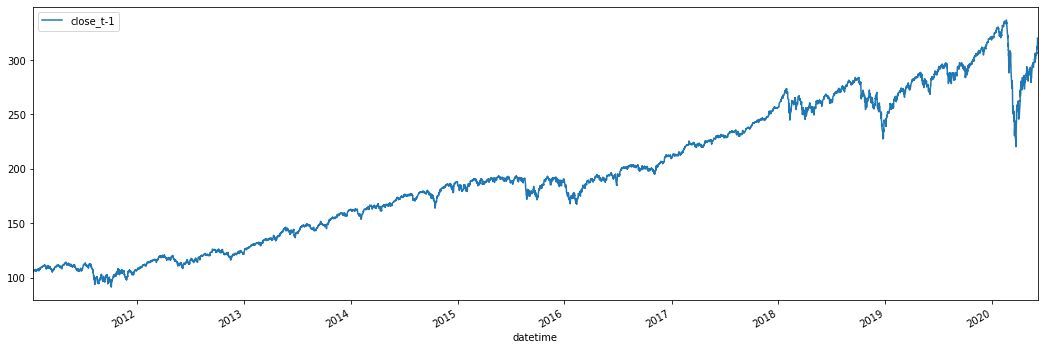

Number of instances: 11832
Class distribution: 
0 in 0.47439148073022314%
1 in 0.5256085192697769%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2008-10-01 09:31:00  90.8588  90.8746  90.7011  90.7090  1377100.0
1  2008-10-01 09:32:00  90.7090  90.7879  90.6932  90.7405  1230160.0
2  2008-10-01 09:33:00  90.7326  90.7642  90.7090  90.7405   990501.0
3  2008-10-01 09:34:00  90.7405  90.7642  90.5907  90.5985  1202520.0
4  2008-10-01 09:35:00  90.5985  90.6459  90.5670  90.5828  1309760.0
             datetime     open     high      low    close     volume  \
0 2008-10-01 10:05:00  90.2278  90.3225  90.1174  90.1884  1676150.0   
1 2008-10-01 10:06:00  90.1884  90.2199  90.0070  90.0937  1886200.0   
2 2008-10-01 10:07:00  90.1016  90.2121  90.0780  90.1963  1176430.0   
3 2008-10-01 10:08:00  90.1963  90.2909  90.1884  90.2042   720000.0   
4 2008-10-01 10:09:00  90.2042  90.2121  90.1016  90.1332   851841.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

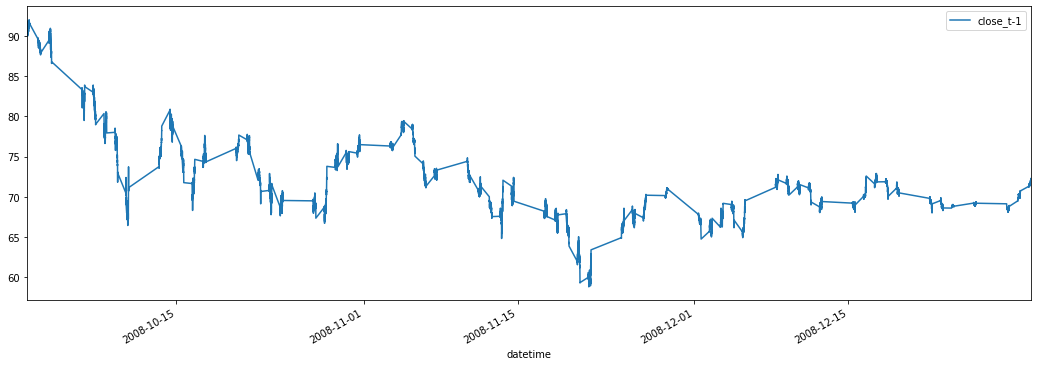

Number of instances: 22656
Class distribution: 
0 in 0.5310734463276836%
1 in 0.4689265536723164%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2008-10-01 09:35:00  90.5985  90.6459  90.3225  90.3461  6066000.0
1  2008-10-01 09:40:00  90.3461  90.8825  90.3382  90.8431  6758813.0
2  2008-10-01 09:45:00  90.8352  91.0403  90.8036  90.8746  8608398.0
3  2008-10-01 09:50:00  90.8746  90.8746  90.6459  90.7247  3484576.0
4  2008-10-01 09:55:00  90.7169  90.9772  90.6774  90.9219  3086975.0
             datetime     open     high      low    close     volume  \
0 2008-10-01 12:20:00  91.0008  91.1270  90.8746  91.1034  3380195.0   
1 2008-10-01 12:25:00  91.1034  91.1665  90.9535  91.0797  3272679.0   
2 2008-10-01 12:30:00  91.0797  91.5687  91.0324  91.5214  8320666.0   
3 2008-10-01 12:35:00  91.5214  91.6713  91.4583  91.4899  4683005.0   
4 2008-10-01 12:40:00  91.4899  91.6871  91.4268  91.4346  5525828.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

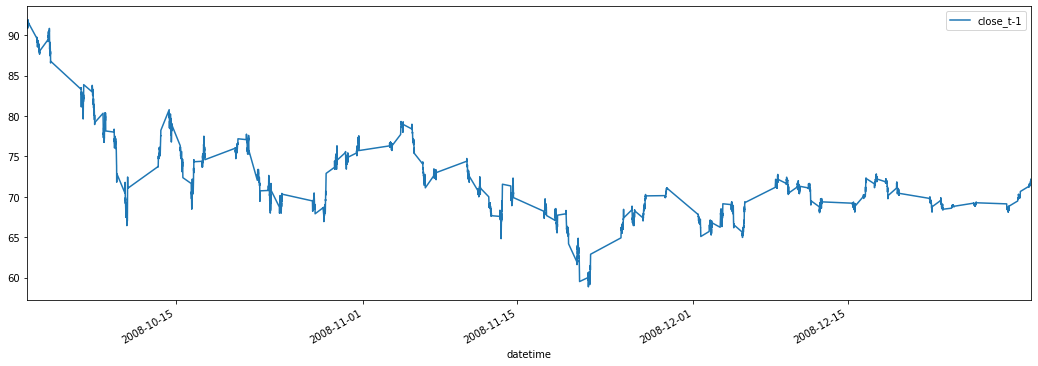

Number of instances: 4516
Class distribution: 
0 in 0.5221434898139947%
1 in 0.47785651018600533%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 09:40:00  90.3461  91.0403  90.3382  90.8746  15367211.0
1  2008-10-01 09:50:00  90.8746  90.9772  90.6459  90.9219   6571551.0
2  2008-10-01 10:00:00  90.9141  90.9298  90.0070  90.1332  15399333.0
3  2008-10-01 10:10:00  90.1332  90.4487  89.9675  90.4329  10157998.0
4  2008-10-01 10:20:00  90.4329  90.5433  90.3225  90.4723   8124848.0
             datetime     open     high      low    close      volume  \
0 2008-10-01 15:10:00  91.5372  91.7975  91.1744  91.3637   7904104.0   
1 2008-10-01 15:20:00  91.3637  91.5530  91.2611  91.4110   4608017.0   
2 2008-10-01 15:30:00  91.4189  91.6555  91.2848  91.3715   6783699.0   
3 2008-10-01 15:40:00  91.3715  91.6318  91.2927  91.3558   7525016.0   
4 2008-10-01 15:50:00  91.3558  91.6713  91.3163  91.4899  12618125.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

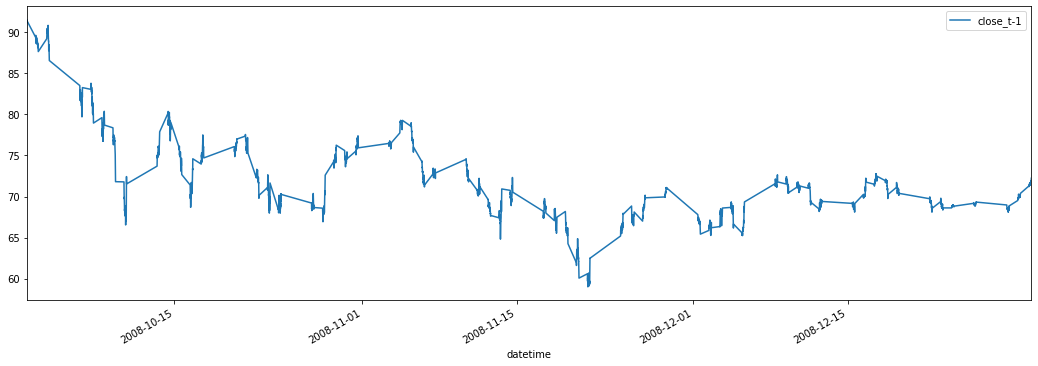

Number of instances: 2209
Class distribution: 
0 in 0.5196921684019918%
1 in 0.48030783159800816%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 09:45:00  90.8352  91.0403  90.6459  90.9219  15179949.0
1  2008-10-01 10:00:00  90.9141  90.9298  89.9675  90.2988  20928953.0
2  2008-10-01 10:15:00  90.3067  90.5433  90.0701  90.4723  12753226.0
3  2008-10-01 10:30:00  90.4802  90.5039  90.0701  90.1568  10846906.0
4  2008-10-01 10:45:00  90.1568  90.2830  89.9281  90.1963   9947990.0
             datetime     open     high      low    close     volume  \
0 2008-10-02 11:45:00  89.1630  89.3286  89.0289  89.2734  8448076.0   
1 2008-10-02 12:00:00  89.2655  89.5022  89.0999  89.1945  8992629.0   
2 2008-10-02 12:15:00  89.2024  89.4154  88.9342  88.9894  7203747.0   
3 2008-10-02 12:30:00  88.9894  89.0841  88.8554  88.8790  7591208.0   
4 2008-10-02 12:45:00  88.8869  89.1788  88.8080  89.0447  7307782.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    p

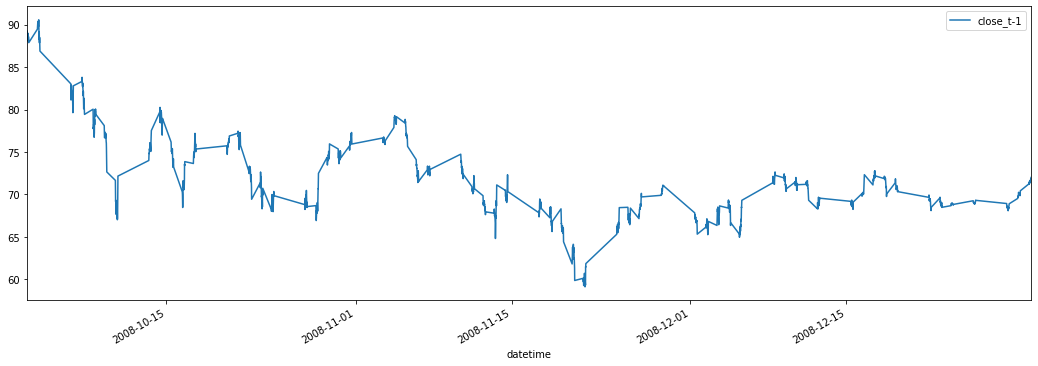

Number of instances: 1442
Class distribution: 
0 in 0.5180305131761442%
1 in 0.48196948682385576%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 10:00:00  90.9141  90.9298  89.9675  90.4723  33682179.0
1  2008-10-01 10:30:00  90.4802  90.5039  89.9281  90.1963  20794896.0
2  2008-10-01 11:00:00  90.1884  90.6222  89.8808  90.5433  18969400.2
3  2008-10-01 11:30:00  90.5433  90.8115  90.4092  90.6538  17973853.0
4  2008-10-01 12:00:00  90.6538  91.2138  90.4881  91.0797  21949996.0
             datetime     open     high      low    close      volume  \
0 2008-10-03 14:30:00  87.8536  88.5951  87.2147  88.5004  58044535.0   
1 2008-10-03 15:00:00  88.5004  88.7449  87.3961  87.6485  32088523.0   
2 2008-10-03 15:30:00  87.6485  88.1455  86.5127  86.7414  54772387.0   
3 2008-10-06 10:30:00  82.6240  82.6635  80.8730  82.3006  64711260.0   
4 2008-10-06 11:00:00  82.3085  83.3103  82.1192  82.8607  56128950.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

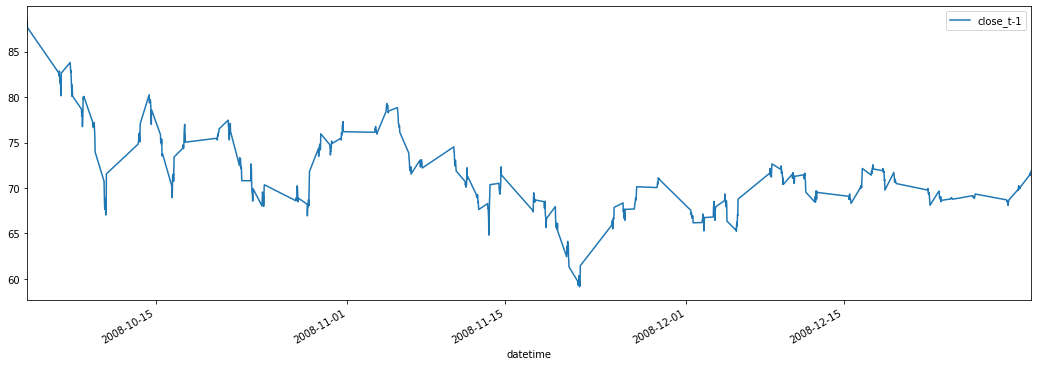

Number of instances: 673
Class distribution: 
0 in 0.5230312035661219%
1 in 0.4769687964338782%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2008-10-01 10:00:00  90.9141  90.9298  89.9281  90.1963  54477075.0
1  2008-10-01 11:00:00  90.1884  90.8115  89.8808  90.6538  36943253.2
2  2008-10-01 12:00:00  90.6538  92.0026  90.4881  91.6634  59127956.0
3  2008-10-01 13:00:00  91.6634  91.7975  90.5039  91.1744  82107301.0
4  2008-10-01 14:00:00  91.1665  92.0420  90.8352  91.4977  58405650.0
             datetime     open     high      low    close       volume  \
0 2008-10-08 13:00:00  77.2762  80.1710  77.2525  79.9974  110568322.0   
1 2008-10-08 14:00:00  79.9974  80.5969  79.0982  79.8318   90382667.0   
2 2008-10-08 15:00:00  79.8239  80.5890  77.4181  77.6153  135614800.0   
3 2008-10-09 11:00:00  76.6767  77.9308  75.6671  76.8739   92044317.0   
4 2008-10-09 12:00:00  76.8660  77.4655  76.2665  76.6294   34606429.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sa

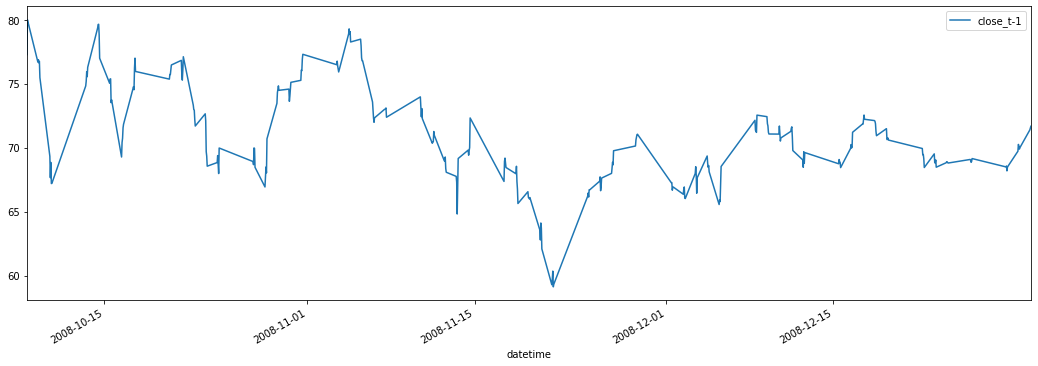

Number of instances: 292
Class distribution: 
0 in 0.5136986301369864%
1 in 0.4863013698630137%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-04-01 09:31:00  62.9242  62.9643  62.8041  62.8121  1703640.0
1  2009-04-01 09:32:00  62.8121  62.8521  62.7720  62.8361  1328410.0
2  2009-04-01 09:33:00  62.8361  62.8922  62.7961  62.8281  1351580.0
3  2009-04-01 09:34:00  62.8281  62.8441  62.7400  62.7480  1830900.0
4  2009-04-01 09:35:00  62.7400  62.9002  62.7320  62.8842  1378030.0
             datetime     open     high      low    close     volume  \
0 2009-04-01 10:05:00  63.4608  63.5008  63.3567  63.5008  1834260.0   
1 2009-04-01 10:06:00  63.5089  63.5169  63.3647  63.3807  1077720.0   
2 2009-04-01 10:07:00  63.3807  63.5329  63.3487  63.4768  1193020.0   
3 2009-04-01 10:08:00  63.4848  63.5569  63.4768  63.4928  1558590.0   
4 2009-04-01 10:09:00  63.4928  63.5169  63.4528  63.5008  1045390.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

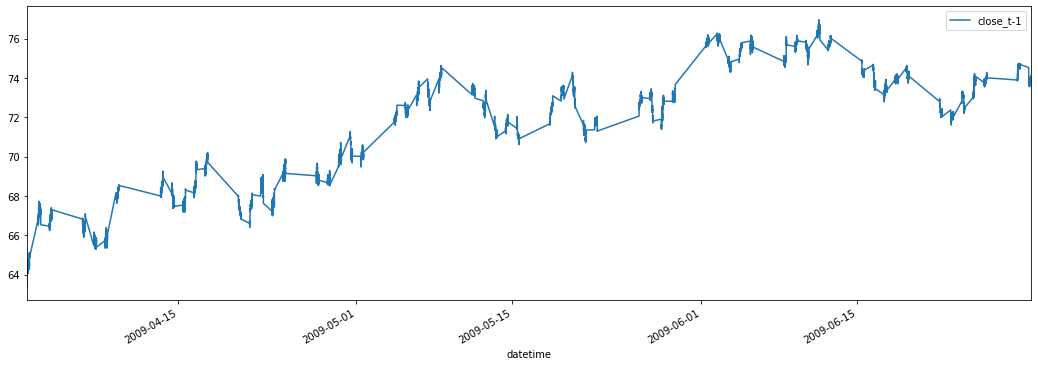

Number of instances: 22302
Class distribution: 
0 in 0.5413864227423549%
1 in 0.45861357725764507%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:35:00  62.7400  63.0123  62.7320  62.9482  10291160.0
1  2009-04-01 09:40:00  62.9482  63.0524  62.8922  62.9322   5940562.0
2  2009-04-01 09:45:00  62.9322  63.0443  62.8441  62.8601   4156901.0
3  2009-04-01 09:50:00  62.8601  62.9482  62.8441  62.9162   3976654.0
4  2009-04-01 09:55:00  62.9162  63.1885  62.8842  63.1885   5225154.0
             datetime     open     high      low    close     volume  \
0 2009-04-01 12:20:00  64.6621  64.6861  64.5820  64.6701  3775163.0   
1 2009-04-01 12:25:00  64.6621  64.6701  64.5340  64.5980  2092137.0   
2 2009-04-01 12:30:00  64.5980  64.6861  64.5740  64.5900  2357284.0   
3 2009-04-01 12:35:00  64.5820  64.5900  64.4379  64.5099  2528856.0   
4 2009-04-01 12:40:00  64.5019  64.5500  64.4699  64.4859  1021232.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    pp

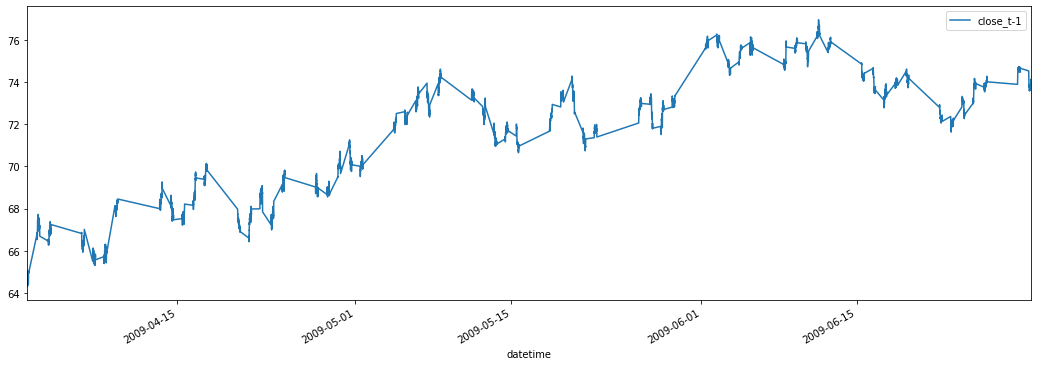

Number of instances: 4445
Class distribution: 
0 in 0.5111361079865017%
1 in 0.48886389201349834%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:40:00  62.9482  63.0524  62.8441  62.8601  10097463.0
1  2009-04-01 09:50:00  62.8601  63.1885  62.8441  63.1885   9201808.0
2  2009-04-01 10:00:00  63.1805  63.5569  63.1805  63.5008  18302730.0
3  2009-04-01 10:10:00  63.5089  63.9013  63.4928  63.8853  18080494.0
4  2009-04-01 10:20:00  63.8853  64.0935  63.8132  63.9013  18363720.0
             datetime     open     high      low    close      volume  \
0 2009-04-01 15:10:00  64.5179  64.5660  64.2136  64.4779  16329436.0   
1 2009-04-01 15:20:00  64.4939  64.6701  64.3898  64.5900   9487192.0   
2 2009-04-01 15:30:00  64.5980  65.0946  64.4298  65.0305  15594819.0   
3 2009-04-01 15:40:00  65.0305  65.1666  64.9985  65.0385  15257300.0   
4 2009-04-01 15:50:00  65.0305  65.2067  64.8143  64.8943  23581310.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

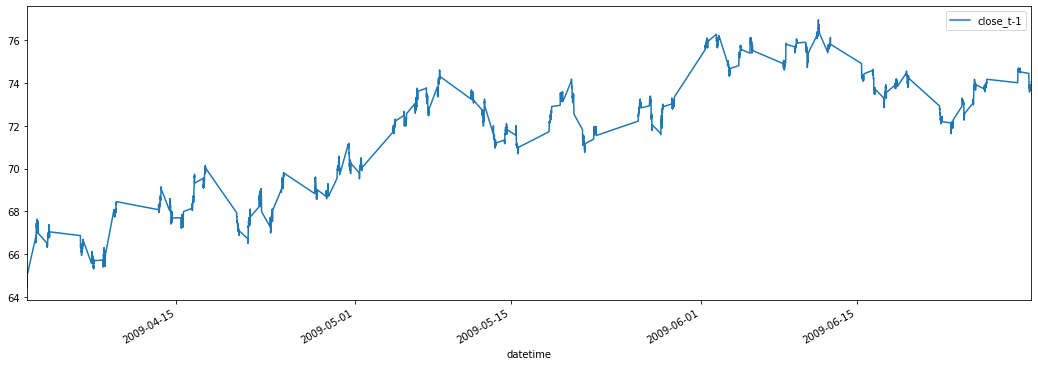

Number of instances: 2174
Class distribution: 
0 in 0.5022999080036799%
1 in 0.49770009199632015%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 09:45:00  62.9322  63.1885  62.8441  63.1885  13358709.0
1  2009-04-01 10:00:00  63.1805  63.6690  63.1805  63.6530  27023954.0
2  2009-04-01 10:15:00  63.6610  64.0935  63.5729  63.9013  27722990.0
3  2009-04-01 10:30:00  63.9013  64.3418  63.7491  64.2216  22349578.0
4  2009-04-01 10:45:00  64.2216  64.3978  64.1335  64.1816  25935541.0
             datetime     open     high      low    close      volume  \
0 2009-04-02 11:45:00  67.1848  67.3370  67.1368  67.2970  11640337.0   
1 2009-04-02 12:00:00  67.2970  67.3931  67.1688  67.3610   8691697.0   
2 2009-04-02 12:15:00  67.3690  67.7374  67.3690  67.6333  21319565.0   
3 2009-04-02 12:30:00  67.6333  67.7615  67.5853  67.6654  10603529.0   
4 2009-04-02 12:45:00  67.6573  67.6974  67.4091  67.4091  14465048.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

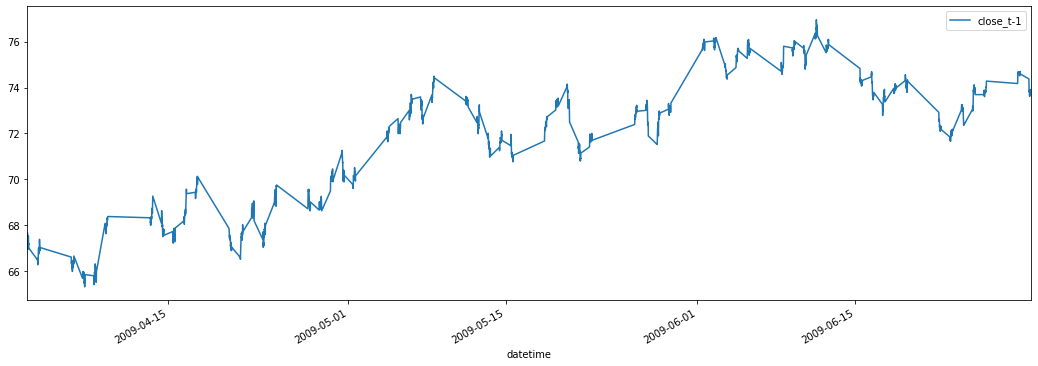

Number of instances: 1419
Class distribution: 
0 in 0.49119097956307256%
1 in 0.5088090204369274%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-04-01 10:00:00  63.1805  64.0935  63.1805  63.9013  54746944.0
1  2009-04-01 10:30:00  63.9013  64.3978  63.7491  64.1816  48285119.0
2  2009-04-01 11:00:00  64.1736  64.3498  63.9814  64.3017  28103720.0
3  2009-04-01 11:30:00  64.3017  64.5500  64.2296  64.4779  20026871.0
4  2009-04-01 12:00:00  64.4779  64.8063  64.4699  64.5980  23045517.0
             datetime     open     high      low    close      volume  \
0 2009-04-03 14:30:00  67.3770  67.4331  67.0887  67.2729  21140263.0   
1 2009-04-03 15:00:00  67.2649  67.2970  66.8325  66.8885  25640741.0   
2 2009-04-03 15:30:00  66.8965  67.4972  66.7283  67.4731  47516478.0   
3 2009-04-06 10:30:00  66.3359  66.5521  66.2718  66.4480  18305067.0   
4 2009-04-06 11:00:00  66.4480  66.4560  66.1517  66.3680  16053655.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

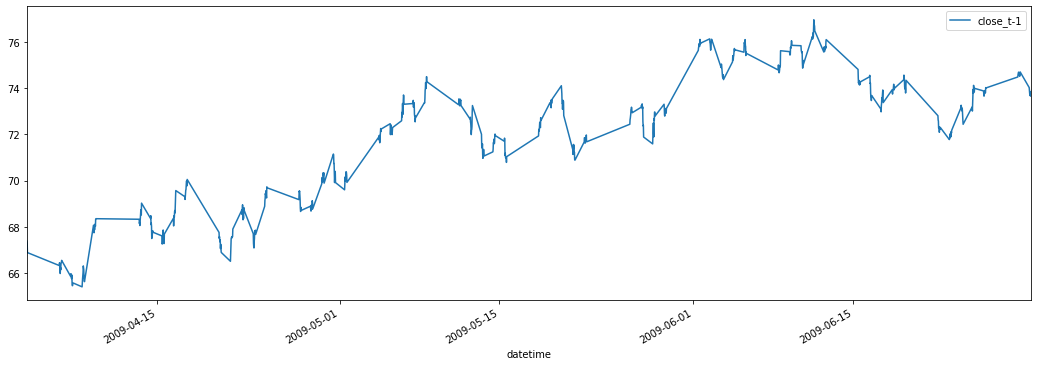

Number of instances: 662
Class distribution: 
0 in 0.4954682779456193%
1 in 0.5045317220543807%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close       volume
0  2009-04-01 10:00:00  63.1805  64.3978  63.1805  64.1816  103032063.0
1  2009-04-01 11:00:00  64.1736  64.5500  63.9814  64.4779   48130591.0
2  2009-04-01 12:00:00  64.4779  64.8063  64.3017  64.3658   35726423.0
3  2009-04-01 13:00:00  64.3658  64.8783  64.2136  64.8383   37909071.0
4  2009-04-01 14:00:00  64.8383  65.1026  64.7262  64.8863   46676520.0
             datetime     open     high      low    close      volume  \
0 2009-04-08 13:00:00  66.3199  66.3359  66.0796  66.1517  21076834.4   
1 2009-04-08 14:00:00  66.1517  66.1757  65.5431  65.6792  41711849.0   
2 2009-04-08 15:00:00  65.6712  66.1597  65.3508  66.1037  49713721.0   
3 2009-04-09 11:00:00  67.9136  68.0257  67.6173  67.8496  31722344.5   
4 2009-04-09 12:00:00  67.8496  67.9937  67.7054  67.8896  28668111.1   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sa

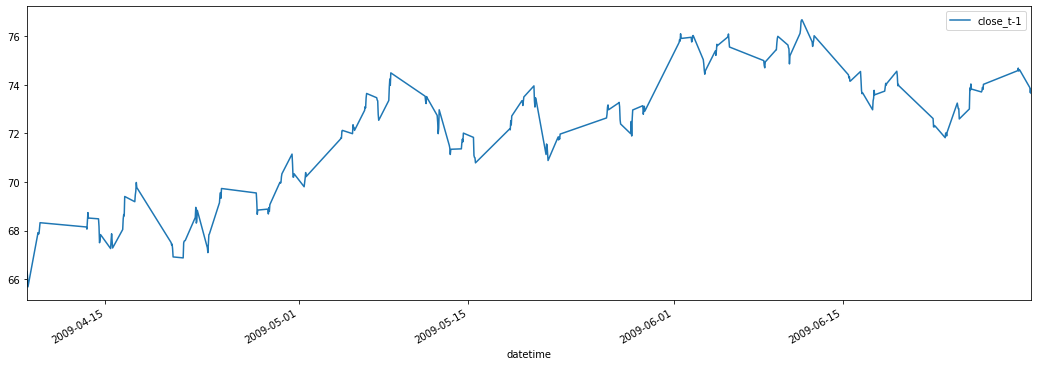

Number of instances: 287
Class distribution: 
0 in 0.4529616724738676%
1 in 0.5470383275261324%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-10-01 09:31:00  85.1632  85.2037  85.0904  85.0985  1099090.0
1  2009-10-01 09:32:00  85.0985  85.1470  85.0338  85.0661  1324020.0
2  2009-10-01 09:33:00  85.0661  85.0985  85.0338  85.0580   639264.0
3  2009-10-01 09:34:00  85.0661  85.1228  85.0257  85.0580  1541750.0
4  2009-10-01 09:35:00  85.0580  85.0661  84.7424  84.7748  3616010.0
             datetime     open     high      low    close     volume  \
0 2009-10-01 10:05:00  84.5725  84.6372  84.4026  84.4268  2207180.0   
1 2009-10-01 10:06:00  84.4187  84.4592  84.3216  84.4026  3072900.0   
2 2009-10-01 10:07:00  84.4026  84.4430  84.2812  84.3702  1644280.0   
3 2009-10-01 10:08:00  84.3702  84.4754  84.2812  84.4511  2309230.0   
4 2009-10-01 10:09:00  84.4592  84.4592  84.3378  84.3459  2092700.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

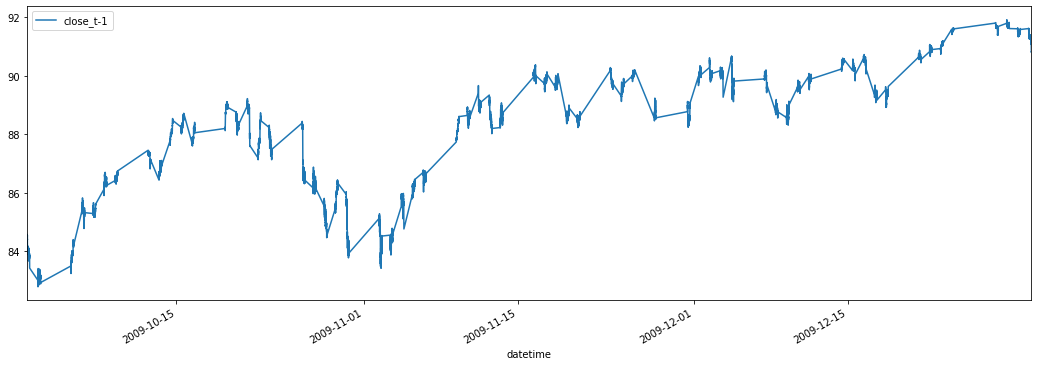

Number of instances: 22656
Class distribution: 
0 in 0.5801995056497176%
1 in 0.4198004943502825%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2009-10-01 09:35:00  85.0580  85.0661  84.7424  84.9124  7311712.0
1  2009-10-01 09:40:00  84.9124  84.9690  84.8315  84.9366  4910944.0
2  2009-10-01 09:45:00  84.9286  85.0499  84.8638  85.0338  4898785.0
3  2009-10-01 09:50:00  85.0418  85.0418  84.8072  84.8638  5507797.0
4  2009-10-01 09:55:00  84.8638  84.9609  84.8072  84.9528  4017781.0
             datetime     open     high      low    close     volume  \
0 2009-10-01 12:20:00  84.0708  84.1841  84.0627  84.1517  1671058.0   
1 2009-10-01 12:25:00  84.1517  84.1598  84.0870  84.1355  1562317.8   
2 2009-10-01 12:30:00  84.1274  84.1922  84.1193  84.1679  1219541.0   
3 2009-10-01 12:35:00  84.1598  84.1841  84.0789  84.0789   865999.1   
4 2009-10-01 12:40:00  84.0870  84.1112  84.0222  84.0384   867590.8   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

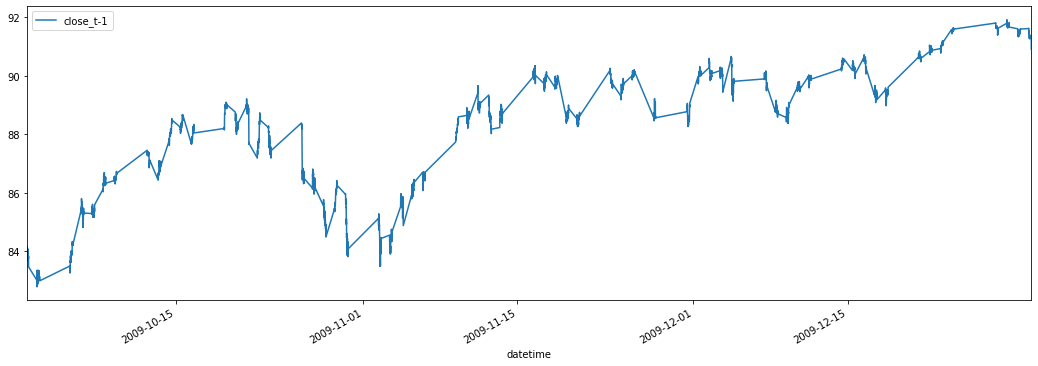

Number of instances: 4516
Class distribution: 
0 in 0.5338795394154119%
1 in 0.4661204605845881%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 09:40:00  84.9124  85.0499  84.8315  85.0338   9809729.0
1  2009-10-01 09:50:00  85.0418  85.0418  84.8072  84.9528   9525578.0
2  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.3459  31893620.0
3  2009-10-01 10:10:00  84.3459  84.4997  84.2812  84.4430  10193724.0
4  2009-10-01 10:20:00  84.4430  84.5482  84.3621  84.4026   6427022.0
             datetime     open     high      low    close      volume  \
0 2009-10-01 15:10:00  83.7633  83.8927  83.7309  83.8604   3815998.0   
1 2009-10-01 15:20:00  83.8604  83.8766  83.6985  83.7471   8477351.0   
2 2009-10-01 15:30:00  83.7390  83.9008  83.7228  83.8280   6694142.0   
3 2009-10-01 15:40:00  83.8199  83.9656  83.7471  83.8037   6930544.0   
4 2009-10-01 15:50:00  83.8037  83.8118  83.3101  83.3425  26594250.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

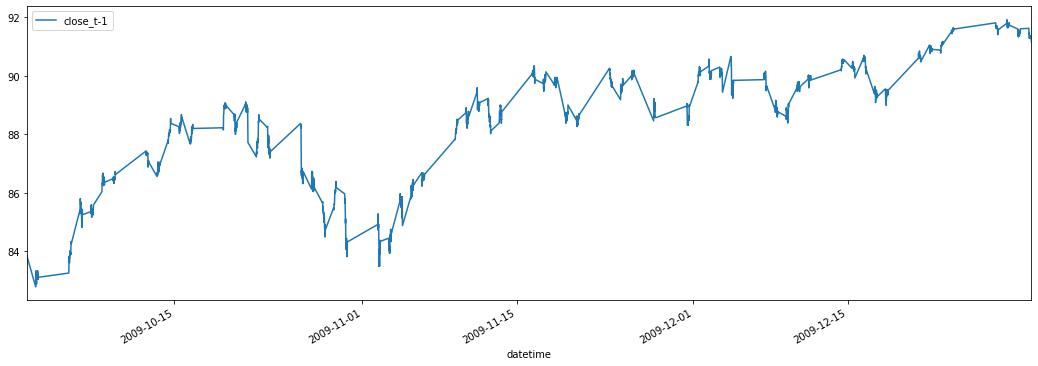

Number of instances: 2209
Class distribution: 
0 in 0.5151652331371661%
1 in 0.4848347668628339%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 09:45:00  84.9286  85.0499  84.8072  84.9528  14424363.0
1  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4511  37215495.0
2  2009-10-01 10:15:00  84.4430  84.5482  84.2974  84.4026  11298871.0
3  2009-10-01 10:30:00  84.4026  84.6130  84.3055  84.5320   7983153.0
4  2009-10-01 10:45:00  84.5320  84.5644  84.3540  84.4268   7035694.7
             datetime     open     high      low    close     volume  \
0 2009-10-02 11:45:00  82.9055  83.0269  82.8326  82.8893  5507598.0   
1 2009-10-02 12:00:00  82.8812  83.1563  82.8731  83.0107  5243705.0   
2 2009-10-02 12:15:00  83.0107  83.2130  83.0107  83.1806  3983801.0   
3 2009-10-02 12:30:00  83.1887  83.2858  83.0673  83.0997  5722013.8   
4 2009-10-02 12:45:00  83.0916  83.2130  83.0107  83.1725  4219989.5   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    p

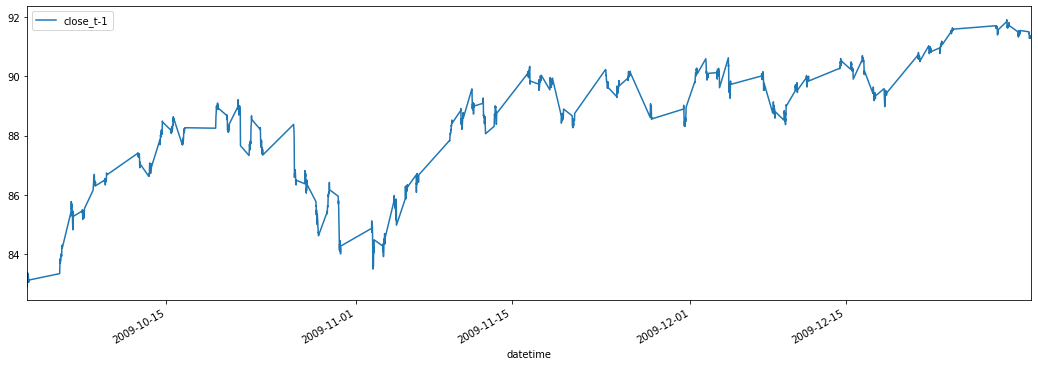

Number of instances: 1442
Class distribution: 
0 in 0.507628294036061%
1 in 0.492371705963939%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4026  48514366.0
1  2009-10-01 10:30:00  84.4026  84.6130  84.3055  84.4268  15018847.7
2  2009-10-01 11:00:00  84.4349  84.4430  83.8685  83.9413  26616278.0
3  2009-10-01 11:30:00  83.9413  84.0627  83.8604  84.0141  14046438.0
4  2009-10-01 12:00:00  84.0222  84.1841  83.8766  84.1355   9900379.8
             datetime     open     high      low    close      volume  \
0 2009-10-05 14:30:00  83.9494  84.4187  83.9494  84.2893  16012790.2   
1 2009-10-05 15:00:00  84.2893  84.3702  84.2326  84.2893  11291548.0   
2 2009-10-05 15:30:00  84.2893  84.3216  84.1274  84.1841  20860529.0   
3 2009-10-06 10:30:00  85.2846  85.5759  85.2684  85.5355  12296154.5   
4 2009-10-06 11:00:00  85.5274  85.8673  85.4869  85.6973  16922767.6   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_1

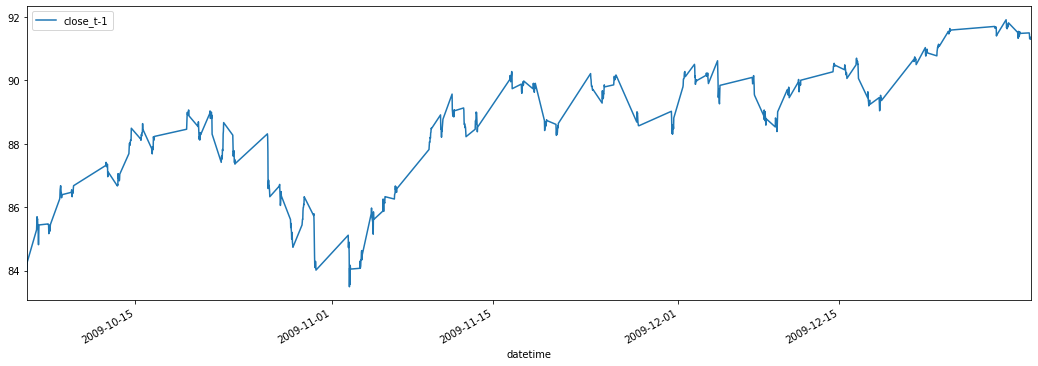

Number of instances: 673
Class distribution: 
0 in 0.5185735512630015%
1 in 0.4814264487369985%


<IPython.core.display.Javascript object>

Start spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2009-10-01 10:00:00  84.9043  85.1956  84.0060  84.4268  63533213.7
1  2009-10-01 11:00:00  84.4349  84.4430  83.8604  84.0141  40662716.0
2  2009-10-01 12:00:00  84.0222  84.1922  83.8766  84.0384  16832334.2
3  2009-10-01 13:00:00  84.0384  84.0546  83.6419  83.8927  30415849.6
4  2009-10-01 14:00:00  83.8847  84.1193  83.7794  83.8927  24283978.2
             datetime     open     high      low    close      volume  \
0 2009-10-08 13:00:00  86.6360  86.6441  86.2314  86.4580  23587932.6   
1 2009-10-08 14:00:00  86.4661  86.4823  86.1829  86.3609  17968975.4   
2 2009-10-08 15:00:00  86.3609  86.5713  86.1910  86.2719  42062571.0   
3 2009-10-09 11:00:00  86.4985  86.6117  86.4094  86.4337  22190212.3   
4 2009-10-09 12:00:00  86.4337  86.5066  86.2881  86.4580  13108695.8   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10  

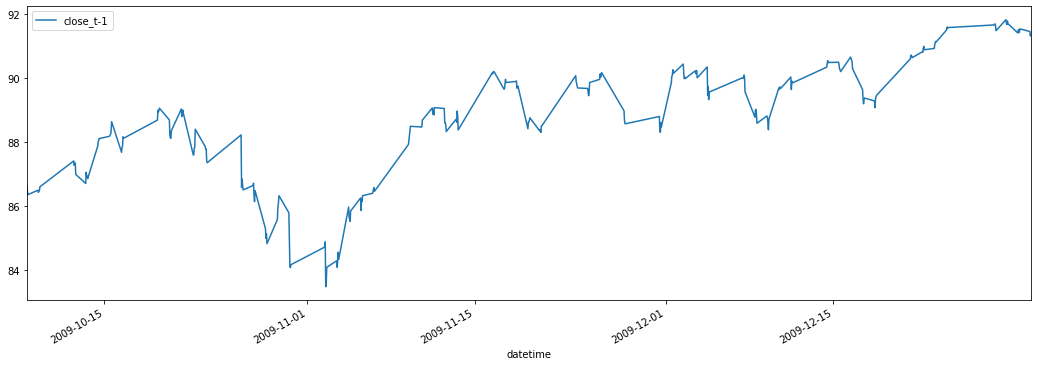

Number of instances: 292
Class distribution: 
0 in 0.4691780821917808%
1 in 0.5308219178082192%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:31:00  91.4633  91.5202  91.4470  91.4877  1575630.0
1  2010-01-04 09:32:00  91.4877  91.4958  91.4552  91.4877   910577.0
2  2010-01-04 09:33:00  91.4958  91.4958  91.4552  91.4552  1227660.0
3  2010-01-04 09:34:00  91.4552  91.4714  91.4470  91.4714   609509.0
4  2010-01-04 09:35:00  91.4633  91.6016  91.4633  91.5935  1925110.0
             datetime     open     high      low    close    volume  \
0 2010-01-04 10:05:00  91.7318  91.8294  91.7236  91.8213  858800.0   
1 2010-01-04 10:06:00  91.8294  91.8538  91.8131  91.8538  370892.0   
2 2010-01-04 10:07:00  91.8457  91.8782  91.8294  91.8294  385176.0   
3 2010-01-04 10:08:00  91.8294  91.8701  91.8131  91.8131  387669.0   
4 2010-01-04 10:09:00  91.8213  91.8782  91.8213  91.8782  284207.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    91.7318

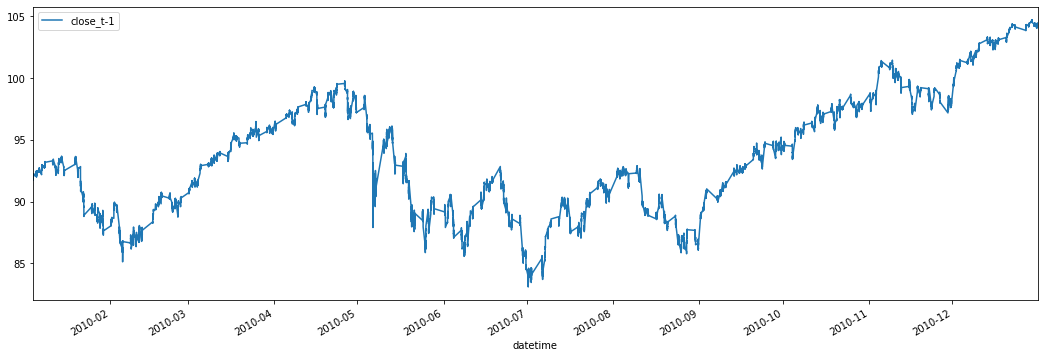

Number of instances: 89208
Class distribution: 
0 in 0.5606223657071114%
1 in 0.4393776342928885%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:35:00  91.4633  91.6830  91.4633  91.6423  5384792.0
1  2010-01-04 09:40:00  91.6504  91.7318  91.6423  91.7155  3536730.0
2  2010-01-04 09:45:00  91.7155  91.8864  91.6830  91.8864  5355208.0
3  2010-01-04 09:50:00  91.8782  91.8864  91.7480  91.7887  3617526.0
4  2010-01-04 09:55:00  91.7887  91.8213  91.7318  91.7969  2321085.0
             datetime     open     high      low    close     volume  \
0 2010-01-04 12:20:00  92.1467  92.1792  92.1386  92.1630   779264.6   
1 2010-01-04 12:25:00  92.1711  92.1874  92.1548  92.1792   604726.5   
2 2010-01-04 12:30:00  92.1792  92.1874  92.1711  92.1874   309085.8   
3 2010-01-04 12:35:00  92.1874  92.2199  92.1711  92.1792  1012131.0   
4 2010-01-04 12:40:00  92.1874  92.2118  92.1548  92.1955   643233.1   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    9

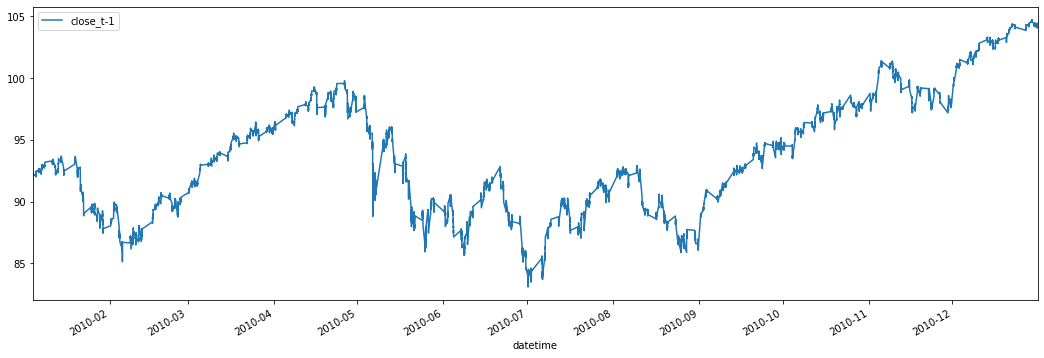

Number of instances: 17864
Class distribution: 
0 in 0.5184729064039408%
1 in 0.4815270935960591%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close     volume
0  2010-01-04 09:40:00  91.6504  91.8864  91.6423  91.8864  8891938.0
1  2010-01-04 09:50:00  91.8782  91.8864  91.7318  91.7969  5938611.0
2  2010-01-04 10:00:00  91.8050  91.9026  91.7155  91.8782  7878538.0
3  2010-01-04 10:10:00  91.8701  91.8782  91.7887  91.8213  3096548.0
4  2010-01-04 10:20:00  91.8213  92.0165  91.8050  92.0084  4446739.0
             datetime     open     high      low    close     volume  \
0 2010-01-04 15:10:00  92.2199  92.2281  92.1630  92.1792  1775145.9   
1 2010-01-04 15:20:00  92.1792  92.1874  92.1304  92.1467  1719545.3   
2 2010-01-04 15:30:00  92.1386  92.1711  92.0897  92.0897  3238517.9   
3 2010-01-04 15:40:00  92.0979  92.1955  92.0816  92.1955  4617691.0   
4 2010-01-04 15:50:00  92.1955  92.1955  92.1142  92.1955  9876571.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \
0    

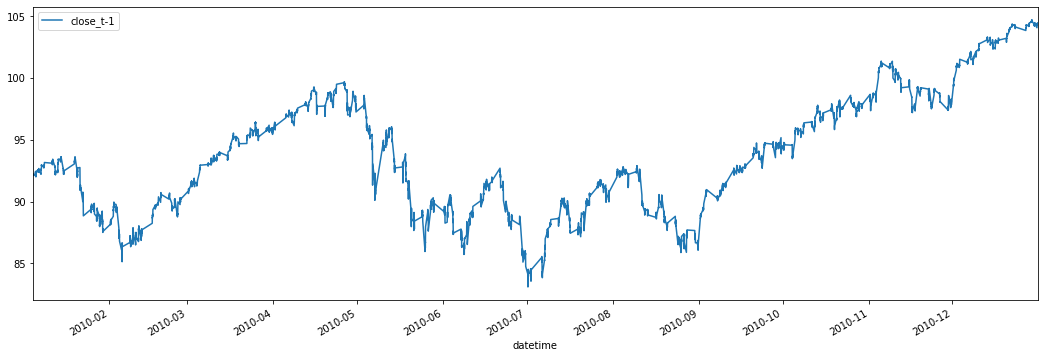

Number of instances: 8789
Class distribution: 
0 in 0.5046080327682331%
1 in 0.495391967231767%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 09:45:00  91.7155  91.8864  91.6830  91.7969  11293819.0
1  2010-01-04 10:00:00  91.8050  91.9026  91.7155  91.8538   9559761.0
2  2010-01-04 10:15:00  91.8619  92.0165  91.8050  92.0084   5862064.0
3  2010-01-04 10:30:00  92.0003  92.0816  91.9840  92.0816   6069863.7
4  2010-01-04 10:45:00  92.0816  92.1304  92.0084  92.0165   4322844.4
             datetime     open     high      low    close     volume  \
0 2010-01-05 11:45:00  92.1955  92.2362  92.1955  92.2199  3501877.5   
1 2010-01-05 12:00:00  92.2281  92.3420  92.2199  92.3420  2534880.7   
2 2010-01-05 12:15:00  92.3338  92.3420  92.2606  92.2606  2698641.4   
3 2010-01-05 12:30:00  92.2687  92.2769  92.2362  92.2525  2026552.7   
4 2010-01-05 12:45:00  92.2525  92.2606  92.1548  92.2199  2051990.5   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  \

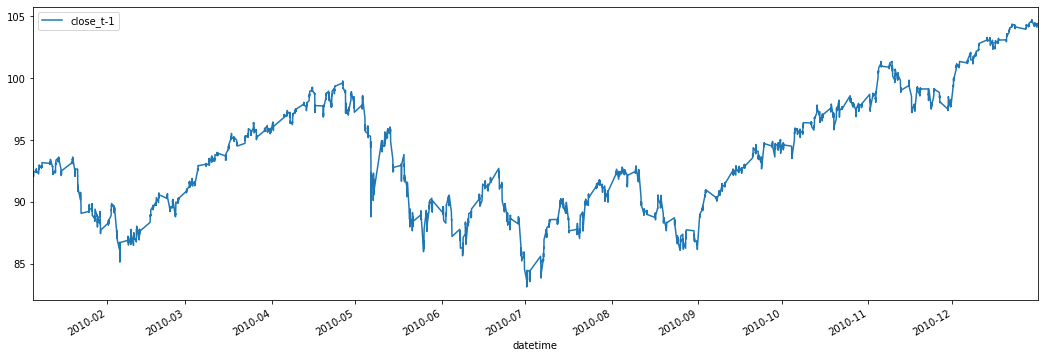

Number of instances: 5766
Class distribution: 
0 in 0.49791883454734653%
1 in 0.5020811654526535%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 10:00:00  91.8050  92.0165  91.7155  92.0084  15421825.0
1  2010-01-04 10:30:00  92.0003  92.1304  91.9840  92.0165  10392708.1
2  2010-01-04 11:00:00  92.0165  92.1711  92.0165  92.1223   6983607.0
3  2010-01-04 11:30:00  92.1142  92.2525  92.0979  92.1630   7472627.2
4  2010-01-04 12:00:00  92.1630  92.1874  92.1386  92.1792   4423029.0
             datetime     open     high      low    close      volume  \
0 2010-01-06 14:30:00  92.5860  92.7406  92.5779  92.6674   8677951.7   
1 2010-01-06 15:00:00  92.6674  92.6918  92.5291  92.6023   7703751.8   
2 2010-01-06 15:30:00  92.5942  92.6593  92.4314  92.5372  16328217.1   
3 2010-01-07 10:30:00  92.3176  92.6837  92.2769  92.5942  16685491.7   
4 2010-01-07 11:00:00  92.5942  92.6430  92.5616  92.5616   5953549.9   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo

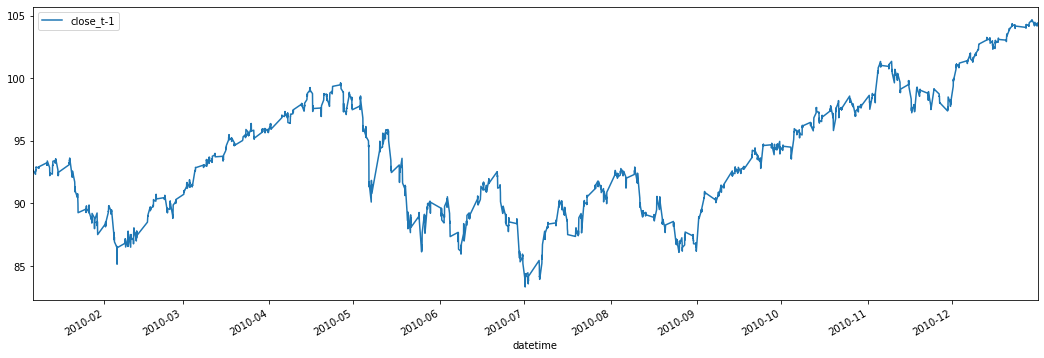

Number of instances: 2741
Class distribution: 
0 in 0.4848595403137541%
1 in 0.5151404596862459%


<IPython.core.display.Javascript object>

Start spy_devset_2010_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2010-01-04 10:00:00  91.8050  92.1304  91.7155  92.0165  25814533.1
1  2010-01-04 11:00:00  92.0165  92.2525  92.0165  92.1630  14456234.2
2  2010-01-04 12:00:00  92.1630  92.2281  92.1386  92.1792   8212385.3
3  2010-01-04 13:00:00  92.2037  92.2443  92.0735  92.0897   8767227.0
4  2010-01-04 14:00:00  92.0979  92.2443  92.0735  92.1630   8978854.5
             datetime     open     high      low    close      volume  \
0 2010-01-11 13:00:00  93.0416  93.1881  92.9928  93.1637   8874288.2   
1 2010-01-11 14:00:00  93.1637  93.2288  93.0823  93.1881  10974788.0   
2 2010-01-11 15:00:00  93.1718  93.4484  93.1718  93.3427  26081180.0   
3 2010-01-12 11:00:00  92.8464  92.8871  92.6430  92.6674  18842589.7   
4 2010-01-12 12:00:00  92.6593  92.6674  92.1711  92.2118  29525661.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10

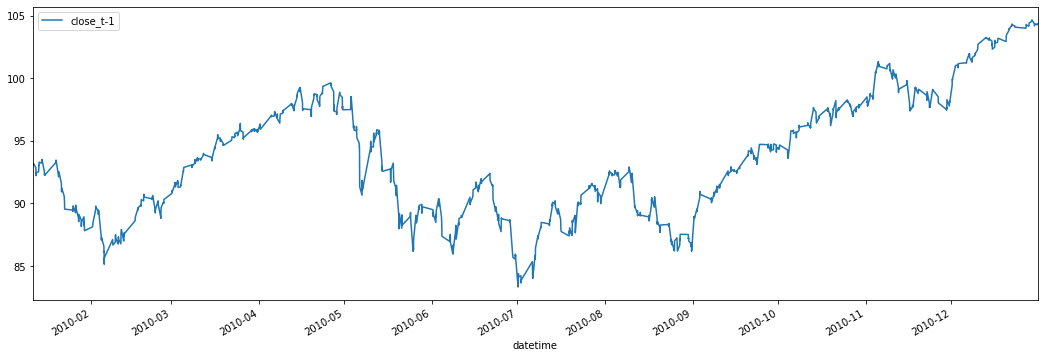

Number of instances: 1232
Class distribution: 
0 in 0.45616883116883117%
1 in 0.5438311688311688%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:31:00  105.122  105.180  105.097  105.180  1039570.0
1  2011-01-03 09:32:00  105.180  105.197  105.130  105.147   727576.0
2  2011-01-03 09:33:00  105.147  105.188  105.130  105.138   554285.0
3  2011-01-03 09:34:00  105.138  105.155  105.130  105.155   751152.0
4  2011-01-03 09:35:00  105.147  105.172  105.138  105.147   674601.0
             datetime     open     high      low    close    volume  \
0 2011-01-03 10:05:00  105.387  105.412  105.387  105.396  390012.0   
1 2011-01-03 10:06:00  105.396  105.412  105.379  105.387  366656.0   
2 2011-01-03 10:07:00  105.387  105.429  105.371  105.396  691340.0   
3 2011-01-03 10:08:00  105.387  105.396  105.371  105.371  274239.0   
4 2011-01-03 10:09:00  105.379  105.412  105.379  105.412  198760.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    ppo_10  \
0   

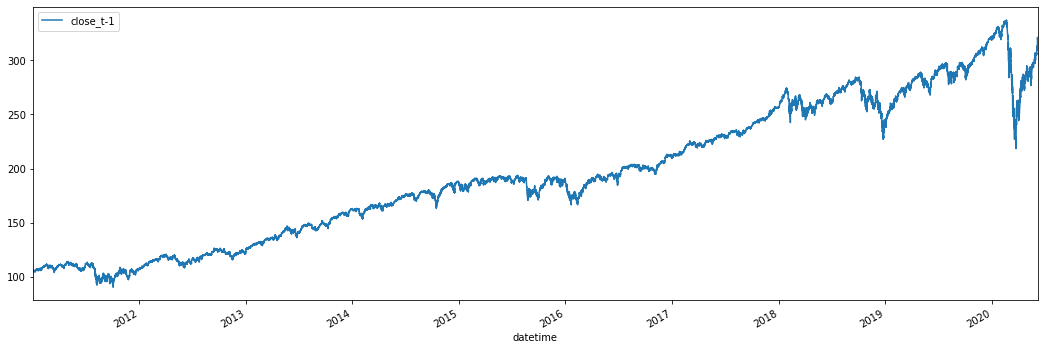

Number of instances: 839688
Class distribution: 
0 in 0.535205933632492%
1 in 0.4647940663675079%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:35:00  105.147  105.197  105.089  105.163  2843639.0
1  2011-01-03 09:40:00  105.172  105.338  105.147  105.313  4564929.0
2  2011-01-03 09:45:00  105.313  105.437  105.296  105.412  4152903.0
3  2011-01-03 09:50:00  105.412  105.421  105.271  105.404  2593241.0
4  2011-01-03 09:55:00  105.404  105.479  105.387  105.462  1841539.0
             datetime     open     high      low    close     volume  \
0 2011-01-03 12:20:00  105.794  105.810  105.785  105.810   638693.1   
1 2011-01-03 12:25:00  105.810  105.810  105.744  105.752  1092241.2   
2 2011-01-03 12:30:00  105.752  105.777  105.711  105.769   561775.8   
3 2011-01-03 12:35:00  105.761  105.769  105.744  105.744   551875.6   
4 2011-01-03 12:40:00  105.752  105.769  105.744  105.769   473521.9   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    ppo_10  

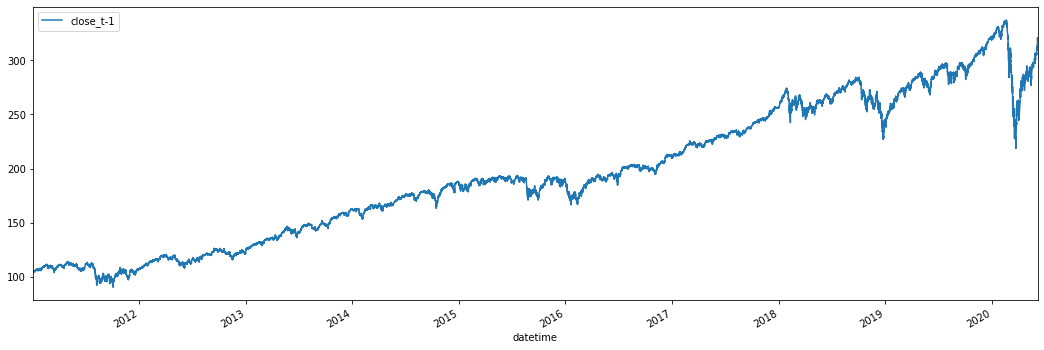

Number of instances: 168384
Class distribution: 
0 in 0.5063129513492969%
1 in 0.4936870486507032%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:40:00  105.172  105.437  105.147  105.412  8717832.0
1  2011-01-03 09:50:00  105.412  105.479  105.271  105.462  4434780.0
2  2011-01-03 10:00:00  105.470  105.487  105.329  105.412  5506092.0
3  2011-01-03 10:10:00  105.404  105.578  105.404  105.578  5355568.0
4  2011-01-03 10:20:00  105.578  105.595  105.504  105.520  2735913.6
             datetime     open     high      low    close      volume  \
0 2011-01-03 15:10:00  105.495  105.520  105.387  105.445   5947212.0   
1 2011-01-03 15:20:00  105.445  105.445  105.371  105.412   4161013.0   
2 2011-01-03 15:30:00  105.412  105.528  105.404  105.445   3818067.1   
3 2011-01-03 15:40:00  105.445  105.528  105.404  105.512   6668558.0   
4 2011-01-03 15:50:00  105.512  105.603  105.387  105.396  15872377.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10    p

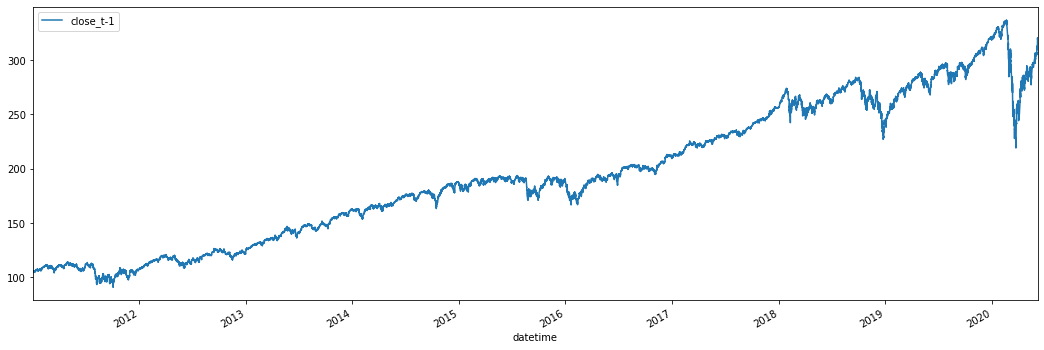

Number of instances: 82989
Class distribution: 
0 in 0.4956560508019135%
1 in 0.5043439491980864%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21.csv
              datetime     open     high      low    close     volume
0  2011-01-03 09:45:00  105.313  105.479  105.271  105.462  8587683.0
1  2011-01-03 10:00:00  105.470  105.487  105.329  105.437  7018108.0
2  2011-01-03 10:15:00  105.437  105.595  105.437  105.520  6579465.6
3  2011-01-03 10:30:00  105.520  105.595  105.470  105.570  4145338.0
4  2011-01-03 10:45:00  105.562  105.711  105.396  105.686  4506502.0
             datetime     open     high      low    close     volume  \
0 2011-01-04 11:45:00  105.155  105.172  104.997  104.997  3346220.4   
1 2011-01-04 12:00:00  105.006  105.039  104.890  104.964  5050975.6   
2 2011-01-04 12:15:00  104.964  104.973  104.749  104.798  4654192.6   
3 2011-01-04 12:30:00  104.790  104.815  104.690  104.707  4104832.0   
4 2011-01-04 12:45:00  104.707  104.790  104.682  104.790  3818314.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...     sar_10    ppo_10  

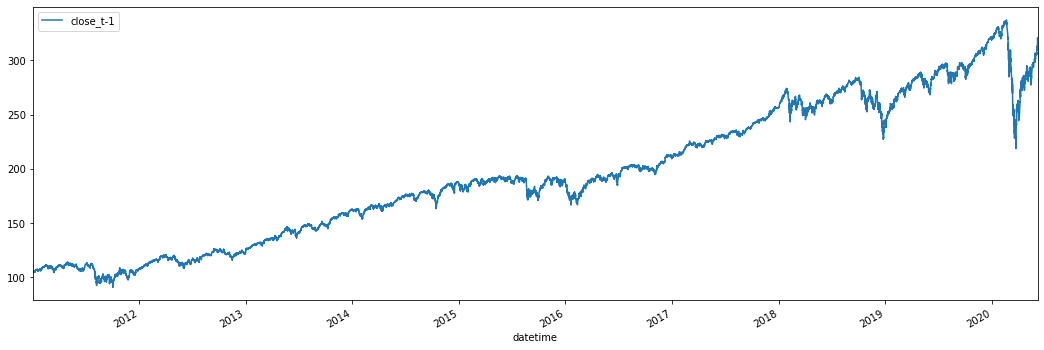

Number of instances: 54526
Class distribution: 
0 in 0.4904449253567106%
1 in 0.5095550746432894%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21.csv
              datetime     open     high      low    close      volume
0  2011-01-03 10:00:00  105.470  105.595  105.329  105.520  13597573.6
1  2011-01-03 10:30:00  105.520  105.711  105.396  105.686   8651840.0
2  2011-01-03 11:00:00  105.686  105.736  105.620  105.719   8542335.3
3  2011-01-03 11:30:00  105.711  105.852  105.661  105.752   8024646.6
4  2011-01-03 12:00:00  105.744  105.810  105.736  105.752   4823074.8
             datetime     open     high      low    close      volume  \
0 2011-01-05 14:30:00  105.769  105.835  105.702  105.835   6109368.0   
1 2011-01-05 15:00:00  105.835  105.960  105.769  105.827   8988097.9   
2 2011-01-05 15:30:00  105.827  105.910  105.769  105.877  14091098.0   
3 2011-01-06 10:30:00  105.926  106.043  105.702  105.769  12779084.0   
4 2011-01-06 11:00:00  105.769  105.785  105.362  105.603  14766294.0   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_1

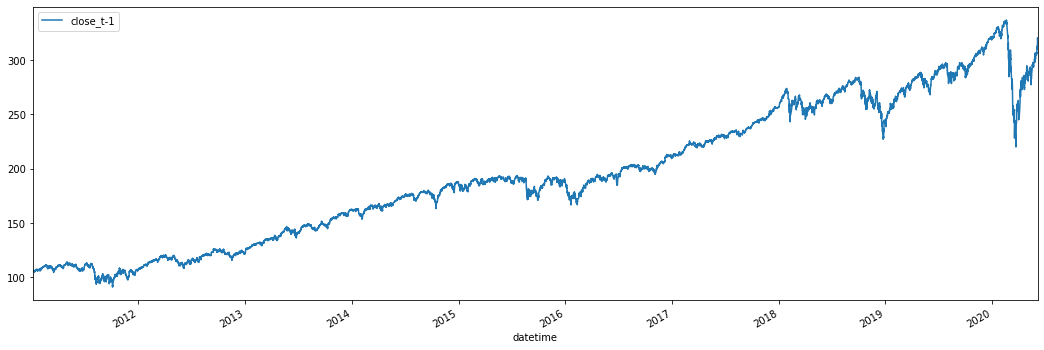

Number of instances: 26061
Class distribution: 
0 in 0.4793369402555543%
1 in 0.5206630597444457%


<IPython.core.display.Javascript object>

Start spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21.csv
              datetime     open     high      low    close      volume
0  2011-01-03 10:00:00  105.470  105.711  105.329  105.686  22249413.6
1  2011-01-03 11:00:00  105.686  105.852  105.620  105.752  16566981.9
2  2011-01-03 12:00:00  105.744  105.810  105.645  105.702  10762185.3
3  2011-01-03 13:00:00  105.702  105.736  105.645  105.727   9742360.1
4  2011-01-03 14:00:00  105.727  105.752  105.520  105.595  14863480.4
             datetime     open     high      low    close      volume  \
0 2011-01-10 13:00:00  105.180  105.354  105.172  105.280  10718294.4   
1 2011-01-10 14:00:00  105.280  105.396  105.130  105.371  11840359.7   
2 2011-01-10 15:00:00  105.371  105.487  105.288  105.338  20932347.9   
3 2011-01-11 11:00:00  105.802  105.968  105.785  105.860  16947118.9   
4 2011-01-11 12:00:00  105.860  105.943  105.794  105.926   7329844.2   

   close_t-1  close_t-2  close_t-3  close_t-4  ...      sar_10  

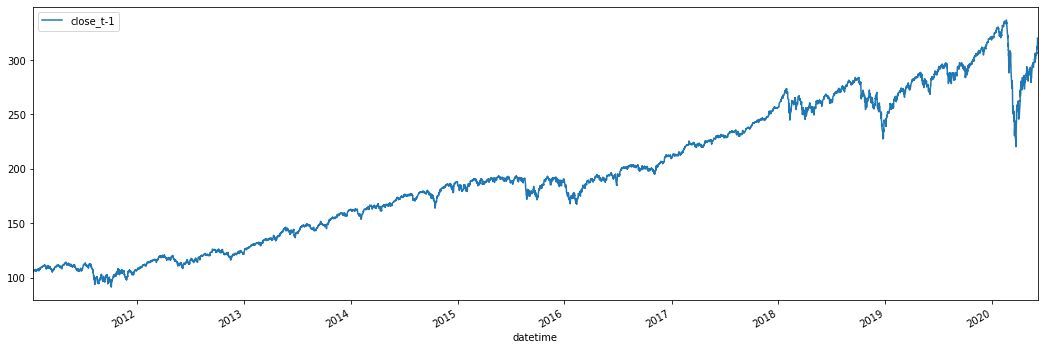

Number of instances: 11832
Class distribution: 
0 in 0.47439148073022314%
1 in 0.5256085192697769%


<IPython.core.display.Javascript object>

In [15]:
# BATCH

# Paths for symbols
# DATA_PATH=os.sep.join(['C:','Users','suare','PycharmProjects','RegimeSwitchingSeriesGenerator','data'])
# SOURCE_PATH=DATA_PATH 
RESULT_PATH=os.sep.join(['C:','Users','suare','PycharmProjects','RegimeSwitchingSeriesGenerator','output']) 
devsets_path = 'C:\\Users\\suare\\Workspace\\phd_cetrulin\\moa-2017.06-sources\\data\\real\\spy_final_2021_staging_area\\'

modes = ['indicators_best', 'indicators_best_and_times', 'indicators_fullset']
# sets = ['mahalanobis', 'dev', 'train'] #'mahalanobis', 'dev'] #, 'train']  # dates hardcoded later.

for mode in modes:
    for file in files_for_indicators:
#         for level in levels:
#         for dataset in sets:
#           filename = file.replace(SOURCE_PATH+os.sep,'')
            filename = file.split(os.sep)[-1]
            FIELD = 'close' # price->'ts' returns->'ret_ts' ts_with_added_noise-> 'ts_n2_post'
            print(f'Start {filename}')

#             file = os.sep.join([SOURCE_PATH, filename])
    #         RESULT_FILEPATH_PROCESSED = os.sep.join([RESULT_PATH, filename.split(os.sep)[-1].replace('.csv','')+'_'+level+f'_indicators_best_no_filling_gaps_{dataset}_05062020.csv'])
#             RESULT_FILEPATH_PROCESSED = os.sep.join([RESULT_PATH, filename.split(os.sep)[-1].replace('.csv','')+'_'+level+f'{dataset}_{mode}_23062020.csv'])
#             RESULT_FILEPATH_PROCESSED = os.sep.join([RESULT_PATH, filename.split(os.sep)[-1].replace('.csv','')+'_'+level+f'{dataset}_{mode}_recession_2001.csv'])
#             RESULT_FILEPATH_PROCESSED = os.sep.join([RESULT_PATH, filename.split(os.sep)[-1].replace('.csv','')+'_'+level+f'{dataset}_{mode}_great_recession.csv'])
            RESULT_FILEPATH_PROCESSED = os.sep.join([RESULT_PATH, filename.split(os.sep)[-1].replace('.csv','')+f'{mode}.csv'])

            # Open file
            df=pd.read_csv(file, sep=';')

#             # Get date range for the current set (TODO: add to adict so if else conditions are not required and can be soecufued at the start)
#             if dataset == 'mahalanobis':
#                 # 1998
#                 # df = df[df.datetime.astype('str') <= '1998-12-31 16:00:00']  # Mahalanobis Set
#                 # 2000
# #                 df = df[(df.datetime.astype('str') > '1999-12-31 16:00:00') & (df.datetime.astype('str') <= '2000-12-31 16:00:00')]
#                 # 2007
#                 df = df[(df.datetime.astype('str') > '2006-12-31 16:00:00') & (df.datetime.astype('str') <= '2007-12-31 16:00:00')]
#             elif dataset == 'dev':
#                 # 1999
#                 # df = df[(df.datetime.astype('str') > '1998-12-31 16:00:00') & (df.datetime.astype('str') <= '1999-12-31 16:00:00')]
#                 # 2001
# #                 df = df[(df.datetime.astype('str') > '2000-12-31 16:00:00') & (df.datetime.astype('str') <= '2001-12-31 16:00:00')]
#                 # 2008
#                 df = df[(df.datetime.astype('str') > '2007-12-31 16:00:00') & (df.datetime.astype('str') <= '2008-12-31 16:00:00')]
#             elif dataset == 'train': 
#                 # 2000-2020/05
# #               df = df[df.datetime.astype('str') > '1999-12-31 16:00:00']
#                 # 2002-2020/05
# #                 df = df[df.datetime.astype('str') > '2001-12-31 16:00:00']
#                 # 2009-2020/05
#                 df = df[df.datetime.astype('str') > '2008-12-31 16:00:00']
#             else:
#                 assert False, 'please, add a proper set name. either Mahalanobis, dev or train.'


            print(df.head())
    #         assert False
            df=df.drop_duplicates(['datetime','open','high','low','close','volume']) 

            #Add parameters to transform in TS
            timeseries=['close', 'open', 'high', 'low']
            #Length of the TS. How many values do we keep per serie. 
            # e.g. 1 -> t / 2 -> t,t-1 / 3 -> t,t-1,t-2 / 4 -> t,t-1,t-2,t-3
            length = 5

            # Add lagged times
            for column in timeseries:
                for i in range(1,length):
                    df[column+'_t-'+str(i)]=df[column].shift(i) #it could also be sorted and group by if needed


            # all the numbers here and below assume a default time period for ta params of 10 mins averages
            # change the other numbers (params of 5min and 20min and theremoval of 20 first mins of the day below) if the mins number is changed.
            # in that case change as well the time tag '_10' with the corresponding one.
            default_timerange=10
            # Set extra timeranges for moving averages
            extra_timeranges=[default_timerange//2, default_timerange, default_timerange*2, default_timerange*3]

            # ###########################################
            # Iterate and run list of indicators selected
            # All of them produced for 25 prior mins of data 
            # ###########################################    
            for ind in list(indicators):
#                 print(ind)
                if ind not in ['adosc', 'obv', 'mfi']:  # avoiding indicators that need volume
                    # For indicators that only return one column (this will need to be modified depending on the selection of indicators)
                    if ind in ['ema','sma','trima']:
                        for timerange in extra_timeranges:
#                             print(ind+'_'+str(int(timerange)))
                            df[ind+'_'+str(int(timerange))] = get_indicator(ind)(df, timeperiod=timerange) 
                    elif ind not in ['bbands','aroon','stoch','macd','macdfix','stochf']:
                        df[ind+'_'+str(int(default_timerange))] = get_indicator(ind)(df, timeperiod=(default_timerange))
                    # Otherwise check the list of columns and return all
                    else: 
                        key_output=get_indicator(ind)(df, timeperiod=(default_timerange)) #, price='close')
                        for j in range(0,len(list(key_output.columns))):
                            df[ind+'_'+key_output.columns[int(j)]] = key_output[key_output.columns[j]]
        #     for key in list(indicator.keys()):
        #         # For indicators that only return one column (this will need to be modified depending on the selection of indicators)
        #         if key in ['ema','sma','trima']:
        #             df[key+'_'+str(default_timerange//2)]=indicator[key](df, timeperiod=(default_timerange/2)) 
        #             df[key+'_'+str(default_timerange)]=indicator[key](df, timeperiod=(default_timerange)) 
        #             df[key+'_'+str(default_timerange*2)]=indicator[key](df, timeperiod=(default_timerange*2))     
        #         elif key not in ['bbands','aroon','stoch','macd','macdfix','stochf']:
        #             df[key+'_'+str(default_timerange)]=indicator[key](df, timeperiod=(default_timerange))
        #         # Otherwise check the list of columns and return all
        #         else: 
        #             key_output=indicator[key](df, timeperiod=(default_timerange)) #, price='close')
        #             for j in range(0,len(list(key_output.columns))):
        #                 df[key+'_'+key_output.columns[j]] = key_output[key_output.columns[j]]

            def set_label(row):
                if row['close_t+1'] > row['close']: return 1
                else: return 0

            # One minute ahead closing price
            df['close_t+1']=df['close'].shift(-1)
        #     df['close_t+1']=df['close'].shift(-1)

        #     def func(row):
        #         if row['close_t+1'] > row['close']:
        #             return 1
        #         else:
        #             return 0

            # Creating label/y to be predicted / independent (predicted) feature 'y' 
            df['label'] = df.apply(set_label, axis=1)
        #     df['label'] = df.apply(func, axis=1)

            df.dropna(inplace=True)

            # Encoding cyclical continuous features for the trading day (6.5h a day except for shortened sessions)
            start_market = 34200.0 # 9:30am
            end_market = 57600.0 # 04:00pm
            df['seconds'] = (pd.to_datetime(df.datetime) - pd.to_datetime(df.datetime.str[:10])).dt.total_seconds() - start_market
            seconds_trading_day = end_market - start_market  # specific to US EFTs, and not considering shortened trading sessions (2 per year).
            df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_trading_day)
            df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_trading_day)
        #     df.cos_time.plot(figsize=(15,6))
        #     df.sample(50).plot.scatter('sin_time','cos_time').set_aspect('equal');

            # Day of the week (cyclical also, for weeks of 5 days)
            df['dow'] = pd.to_datetime(df.datetime).dt.dayofweek
            df['sin_dow'] = np.sin(2*np.pi*df.dow/5)
            df['cos_dow'] = np.cos(2*np.pi*df.dow/5)
        #     df.cos_dow.plot(figsize=(15,6))
        #     df.sample(50).plot.scatter('sin_dow','cos_dow').set_aspect('equal');

            # Select columns for output
            if mode == 'indicators_best':
                # best pool found through indicators grid search script
                columns_selected = ['rsi_10','willr_10','macd_macd','cci_10','mom_10','stoch_slowk','stoch_slowd',
                                    'sma_5','sma_10', 'wma_10','ema_10','trima_10','adx_10',
                                    'bbands_upperband','bbands_lowerband','roc_10', 'aroon_aroondown','aroon_aroonup', 
                                    'label']
            elif mode == 'indicators_best_and_times':
                columns_selected = ['rsi_10','willr_10','macd_macd','cci_10','mom_10','stoch_slowk','stoch_slowd',
                                    'sma_5','sma_10', 'wma_10','ema_10','trima_10','adx_10',
                                    'bbands_upperband','bbands_lowerband','roc_10', 'aroon_aroondown','aroon_aroonup', 
                                    'cos_time', 'cos_dow', 'label']
    #         columns_selected = ['rsi_10','willr_10','macd_macd','cci_10','mom_10','stoch_slowk','stoch_slowd','sma_5','sma_10',
    #                             'wma_10','ema_10','trima_10','adx_10','bbands_upperband','bbands_lowerband','roc_10',
    #                             'aroon_aroondown','aroon_aroonup', 'cos_time', 'cos_dow', 'dividends', 'label']
            elif mode == 'indicators_fullset':
                columns_selected=[# 'datetime',
                                 'rsi_10','willr_10','macd_macd' ,'cci_10','mom_10',
                                 'stoch_slowk','stoch_slowd',
                                 'sma_5','sma_10','sma_20','sma_30',
                                 'wma_5','wma_10','wma_20','wma_30',
                                 'ema_5','ema_10','ema_20','ema_30',
                                 'trima_5','trima_10','trima_20','trima_30',
                                 'adx_10','bbands_upperband','bbands_middleband','bbands_lowerband',
                                 'roc_10','rocr_10','stochf_fastd','stochf_fastk',
                                 'aroon_aroondown','aroon_aroonup','medprice_10','typprice_10','wclprice_10',
                                 'atr_10','macdfix_macd','sar_10',
                                 'adosc_10', 'obv_10', 'mfi_10', 'ppo_10', ########## commented out previosly
                                 'volume','volume_t-1','volume_t-2','volume_t-3','volume_t-4',
                                 'close','close_t-1','close_t-2','close_t-3','close_t-4',
                                 'high','high_t-1','high_t-2','high_t-3','high_t-4',
                                 'open','open_t-1','open_t-2','open_t-3','open_t-4',
                                 'low','low_t-1','low_t-2','low_t-3','low_t-4',
                                 'cos_time', 'sin_time', 'cos_dow', 'sin_dow',
        #                          # 'binary_label',
                                 'label'] #,'gap_t+1','close_t+1'] # + ['adosc_10', 'obv_10', 'mfi_10', 'ppo_10']
        #     columns_selected = ['datetime', 'sma_5','ema_5','sma_20','ema_20','adosc_10','macd_macd','willr_10','stoch_slowk','stoch_slowd','cci_10','ema_10','rsi_10','sma_10','mom_10', 'label']

            # indicators have dependendies up to 45 mins before. removing records that may look at pre-market or at the previous date
            df.datetime = pd.to_datetime(df.datetime)
            df.set_index('datetime', drop=True, inplace=True)
            df = df.between_time('10:05','15:58').reset_index()

            # Export processed data
            print(df.head())
            print(len(df))
            print(RESULT_FILEPATH_PROCESSED)
            print('===========================')
            print('===========================')
            output = pd.DataFrame(df, columns=columns_selected) # [df['datetime'] >= '2017-09-25 14:07:00']
            output.to_csv(RESULT_FILEPATH_PROCESSED, sep=',', encoding='utf-8', index = False)
        #     create_arff_file(RESULT_FILEPATH_PROCESSED) # export in ARFF
            create_arff_file(RESULT_FILEPATH_PROCESSED, output=devsets_path+RESULT_FILEPATH_PROCESSED.split(os.sep)[-1]) # export in ARFF
            
            # Now plot close price and volume overtime.
            df.set_index('datetime',drop=True).plot(y=["close_t-1"], figsize=(18,6))
            plt.show()    

            print(f'Number of instances: {len(df)}')
            # Printing classes distributions
            print("Class distribution: ")
            label_zero=len(df[df['label'] == 0])
            label_one=len(df[df['label'] == 1])
            #print(label_zero)
            #print(label_one)
            print("0 in "+str(float(label_zero)/(label_one+label_zero))+"%")
            print("1 in "+str(float(label_one)/(label_one+label_zero))+"%")

            %notify -m "Parsing is finished"

In [17]:


# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_1min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_1min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_5min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_5min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_15min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_15min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_30min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_30min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_1h-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_1h-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21indicators_best.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21indicators_best.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_1min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_1min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_5min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_5min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_15min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_15min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_30min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_30min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_1h-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_1h-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21indicators_best_and_times.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21indicators_best_and_times.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_1min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_5min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_10min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_15min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_30min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_1_filling_gaps_market_hours_1h-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_1min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_5min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_10min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_15min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_30min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_2_filling_gaps_market_hours_1h-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_1min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_5min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_10min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_15min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_30min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_mahab_08-09_state_3_filling_gaps_market_hours_1h-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_1min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_1min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_5min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_5min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_15min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_15min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_30min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_30min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_devset_2010_filling_gaps_market_hours_1h-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_devset_2010_filling_gaps_market_hours_1h-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_1min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_5min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_10min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_15min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_30min-level_21indicators_fullset.arff

# java -Xmx3074m -classpath C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\lib\weka-dev-3.7.12.jar weka.core.converters.CSVLoader C:\Users\suare\PycharmProjects\RegimeSwitchingSeriesGenerator\output\spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21indicators_fullset.csv > C:\Users\suare\Workspace\phd_cetrulin\moa-2017.06-sources\data\real\spy_final_2021_staging_area\spy_trainset_2011-2020_filling_gaps_market_hours_1h-level_21indicators_fullset.arff


In [29]:
# Print a List of commands to be outputed by the terminal to replace the labels to categorical
files = list()
for file in os.listdir(devsets_path):
#     if '.' not in file:
        seed_folder = os.sep.join([devsets_path, file])
#         seed_files = os.listdir(seed_folder)
#         for sf in seed_files:
        if '.arff' in file: # sf:
#                 full_path = os.sep.join([devsets_path, file, sf])
            full_path = os.sep.join([devsets_path, file]).replace('C:\\Users\\suare\\Workspace\\phd_cetrulin\\', 
                                                                  '/mnt/c/Users/suare/Workspace/phd_cetrulin/').replace('\\','/')
#                 print(full_path)
            print("sed -i 's/^.*@attribute label numeric.*$/@attribute label {0, 1}/' " + full_path)

sed -i 's/^.*@attribute label numeric.*$/@attribute label {0, 1}/' /mnt/c/Users/suare/Workspace/phd_cetrulin/moa-2017.06-sources/data/real/spy_final_2021_staging_area//spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_best.arff
sed -i 's/^.*@attribute label numeric.*$/@attribute label {0, 1}/' /mnt/c/Users/suare/Workspace/phd_cetrulin/moa-2017.06-sources/data/real/spy_final_2021_staging_area//spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_best_and_times.arff
sed -i 's/^.*@attribute label numeric.*$/@attribute label {0, 1}/' /mnt/c/Users/suare/Workspace/phd_cetrulin/moa-2017.06-sources/data/real/spy_final_2021_staging_area//spy_devset_2010_filling_gaps_market_hours_10min-level_21indicators_fullset.arff
sed -i 's/^.*@attribute label numeric.*$/@attribute label {0, 1}/' /mnt/c/Users/suare/Workspace/phd_cetrulin/moa-2017.06-sources/data/real/spy_final_2021_staging_area//spy_devset_2010_filling_gaps_market_hours_15min-level_21indicators_best.arff
sed -i 